In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

In [2]:
#Loading the data 

In [3]:
df=pd.read_csv("D://Major Project//datas//testSortedFile1.csv")
df[:5]

s.no                                               Body     Category  \
0     0  काठमाडौंमा पहिलो पटक स्ट्रबेरीको व्यवसायिक खेत...  Agriculture   
1     1  जिल्लाका किसानले लगाएको अदुवामा गानो कुहिने, ग...  Agriculture   
2     2  काभ्रेपलाञ्चोकमा कृषकले एसआरआई प्रविधिमा गरेको...  Agriculture   
3     3  एक शक्तिशाली मुद्दा यो भूमि सुधार को हो। 1 9 5...  Agriculture   
4     4  अन्तर्राष्ट्रिय श्रमिक संगठनको अनुसार कृषिले स...  Agriculture   

  file_name  
0     1.txt  
1    10.txt  
2   100.txt  
3   101.txt  
4   102.txt

<Axes: xlabel='Category'>

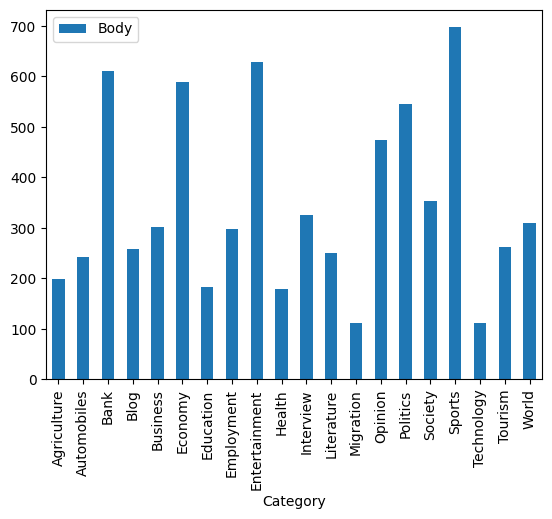

In [4]:
df[["Body","Category"]].groupby("Category").count().plot(kind="bar")

In [5]:
df.shape

(6932, 4)

<Axes: >

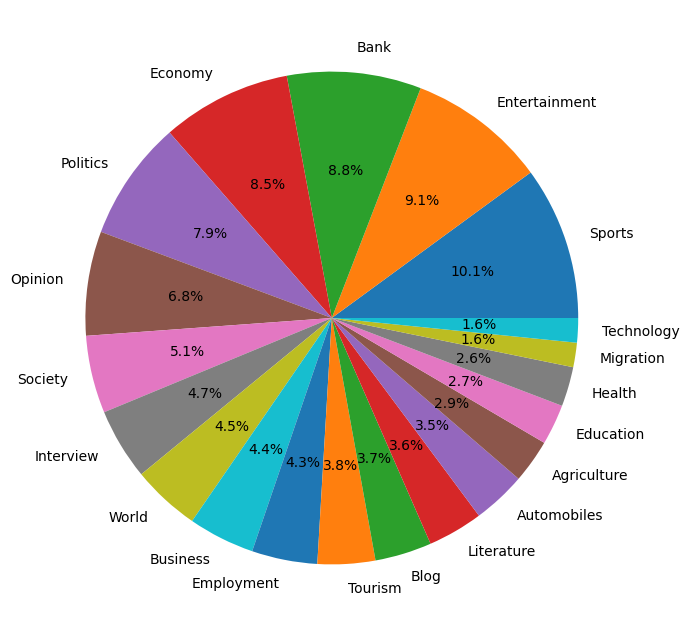

In [6]:
df.Category.value_counts().plot(kind='pie',figsize=(8,8),autopct='%1.1f%%',ylabel='')

In [7]:
df.Category.value_counts()

Category
Sports           697
Entertainment    629
Bank             610
Economy          590
Politics         546
Opinion          474
Society          353
Interview        325
World            310
Business         302
Employment       298
Tourism          262
Blog             258
Literature       251
Automobiles      243
Agriculture      198
Education        184
Health           180
Migration        111
Technology       111
Name: count, dtype: int64

In [7]:
df["Body"].shape

(6932,)

In [8]:
#Sampling the unbalanced data

In [9]:
from sklearn.utils import resample
import pandas as pd


# Specify the desired number of samples per category
desired_samples = 500

# Create an empty DataFrame to store upsampled data
upsampled_data = pd.DataFrame()

# Iterate over unique categories
for category in df['Category'].unique():
    # Subset data for the current category
    category_data = df[df['Category'] == category]
    
    # Check if the category has fewer samples than the desired number
    if len(category_data) < desired_samples:
        # Upsample to the desired number
        upsampled_category = resample(category_data, replace=True, n_samples=desired_samples, random_state=1)
        
        # Append the upsampled category to the new DataFrame
        upsampled_data = pd.concat([upsampled_data, upsampled_category])

    else:
        # If the category has equal or more samples than the desired number, just append it
        upsampled_data = pd.concat([upsampled_data, category_data])

# Display the upsampled data
print(upsampled_data.shape)
upsampled_data.Category.value_counts()


(10572, 4)


Category
Sports           697
Entertainment    629
Bank             610
Economy          590
Politics         546
Agriculture      500
Migration        500
Tourism          500
Technology       500
Society          500
Opinion          500
Interview        500
Literature       500
Automobiles      500
Health           500
Employment       500
Education        500
Business         500
Blog             500
World            500
Name: count, dtype: int64

<Axes: xlabel='Category'>

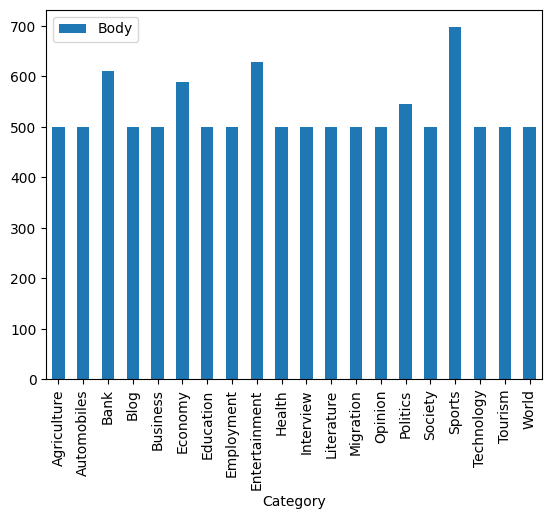

In [10]:
upsampled_data[["Body","Category"]].groupby("Category").count().plot(kind="bar")

<Axes: >

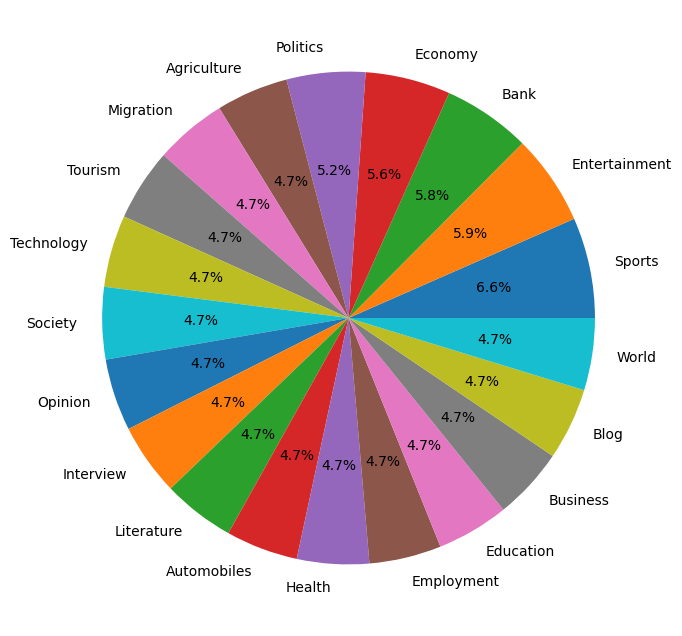

In [11]:
upsampled_data.Category.value_counts().plot(kind='pie',figsize=(8,8),autopct='%1.1f%%',ylabel='')

In [12]:
#Loading punctuations

In [13]:
# Specify the path to your text file
file_path = "D://Major Project//datas//nepali_punctuation.txt"

# Open the file and read its content
with open(file_path, "r", encoding="utf-8") as file:
    # Use readlines to read the file line by line and store each line in a list
    punctuation_words = file.readlines()

# Optionally, you may want to remove newline characters from each line
punctuation_words = [line.strip() for line in punctuation_words]

# Print or use the resulting list
print(punctuation_words)


[':', '?', '|', '।', '!', '.', ',', '" "', "''", '( )', '—', '-', "?'", '\\n']


In [14]:
#Loading stop words

In [15]:
# Specify the path to your text file
file_path = "D://Major Project//datas//nepali_stopwords.txt"

# Open the file and read its content
with open(file_path, "r", encoding="utf-8") as file:
    # Use readlines to read the file line by line and store each line in a list
    stop_words = file.readlines()

# Optionally, you may want to remove newline characters from each line
stop_words = [line.strip() for line in stop_words]

# Print or use the resulting list
print(stop_words)

['|', 'अक्सर', 'अगाडि', 'अझै', 'अनुसार', 'अन्तर्गत', 'अन्य', 'अन्यत्र', 'अन्यथा', 'अब', 'अरू', 'अरूलाई', 'अर्को', 'अर्थात', 'अर्थात्', 'अलग', 'आए', 'आजको', 'आठ', 'आत्म', 'आदि', 'आफू', 'आफूलाई', 'आफैलाई', 'आफ्नै', 'आफ्नो', 'आयो', 'उदाहरण', 'उन', 'उनको', 'उनले', 'उप', 'उहाँलाई', 'एउटै', 'एक', 'एकदम', 'औं', 'कतै', 'कम से कम', 'कसरी', 'कसै', 'कसैले', 'कहाँबाट', 'कहिलेकाहीं', 'कहिल्यै', 'कहीं', 'का', 'कि', 'किन', 'किनभने', 'कुनै', 'कुरा', 'कृपया', 'के', 'केहि', 'केही', 'को', 'कोही', 'क्रमशः', 'गए', 'गरि', 'गरी', 'गरेका', 'गरेको', 'गरेर', 'गरौं', 'गर्छ', 'गर्छु', 'गर्दै', 'गर्न', 'गर्नु', 'गर्नुपर्छ', 'गर्ने', 'गर्यौं', 'गैर', 'चाँडै', 'चार', 'चाले', 'चाहनुहुन्छ', 'चाहन्छु', 'चाहिए', 'छ', 'छन्', 'छु', 'छैन', 'छौँ', 'छौं', 'जताततै', 'जब', 'जबकि', 'जसको', 'जसबाट', 'जसमा', 'जसलाई', 'जसले', 'जस्तै', 'जस्तो', 'जस्तोसुकै', 'जहाँ', 'जान', 'जाहिर', 'जुन', 'जे', 'जो', 'ठीक', 'त', 'तत्काल', 'तथा', 'तदनुसार', 'तपाइँको', 'तपाईं', 'तर', 'तल', 'तापनि', 'तिनी', 'तिनीहरू', 'तिनीहरूको', 'तिनीहरूलाई', 'तिनीहर

In [16]:
#Defining pre processing function

In [46]:
!pip install indic-nlp-library


     ---------------------------------------- 0.0/121.1 kB ? eta -:--:--
     ------------------- ------------------- 61.4/121.1 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 121.1/121.1 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/120.6 kB ? eta -:--:--
     -------------------------------------- 120.6/120.6 kB 6.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/84.7 kB ? eta -:--:--
     ---------------------------------------- 84.7/84.7 kB ? eta 0:00:00
     ---------------------------------------- 0.0/99.8 kB ? eta -:--:--
     ---------------------------------------- 99.8/99.8 kB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/94.0 kB ? eta -:--:--
     ---------------------------------------- 94.0/94.0 kB ? eta 0:00:00
     ---------------------------------------- 0.0/90.6 kB ? eta -:--:--
     ---------------------------------------- 90.6/90.6 kB ? eta 0:00:00
   ------------------------

In [17]:
from snowballstemmer import NepaliStemmer
from indicnlp.tokenize import indic_tokenize

import re

def preprocess_text(cat_data, stop_words, punctuation_words):
    stemmer = NepaliStemmer() # initialize the Nepali stemmer

    new_cat = []
    noise = "1,2,3,4,5,6,7,8,9,0,०,१,२,३,४,५,६,७,८,९".split(",")
    
    # Tokenize Nepali text
    
    
    

    for row in cat_data:
        for punc in punctuation_words:
            row=row.replace(punc,"")
        tokens = indic_tokenize.trivial_tokenize(row)
       
    
        nwords = ""

        for word in tokens:
            # apply Nepali stemming to the word
            if word not in punctuation_words and word not in stop_words:
                
                word = stemmer.stemWord(word)

                is_noise = False
                for n in noise:
                    if n in word:
                        is_noise = True
                        break
                if not is_noise and len(word) > 1:
                    word = word.replace("(","")
                    word = word.replace(")","")
                    nwords += word + " "


        new_cat.append(nwords.strip())
        
        

    return new_cat

    print(f'Before Tokenization : {before_preprocess} \n ')
    print(f'After Tokenization : {words} \n' )


In [18]:
before_preprocess="काठमाडौं इन्जिनियरिङ कलेज कालीमाटी मा छ । काठमाडौं इन्जिनियरिङ कलेजमा ५ वटा विभाग छन् । यो कलेज धेरै राम्रो छ ।"
title_clean = preprocess_text([before_preprocess], stop_words, punctuation_words)



print(f'Before preprocessing : {before_preprocess} \n')
print(f'After preprocessing : {title_clean} \n ')


Before preprocessing : काठमाडौं इन्जिनियरिङ कलेज कालीमाटी मा छ । काठमाडौं इन्जिनियरिङ कलेजमा ५ वटा विभाग छन् । यो कलेज धेरै राम्रो छ । 

After preprocessing : ['काठमाडौं इन्जिनियरिङ कलेज कालीमाटी काठमाडौं इन्जिनियरिङ कलेज वटा विभाग कलेज'] 
 


In [19]:
#Counting stop words in each data

In [20]:
df['stopwords'] = df['Body'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
df[['Body','stopwords']].head()

Body  stopwords
0  काठमाडौंमा पहिलो पटक स्ट्रबेरीको व्यवसायिक खेत...         71
1  जिल्लाका किसानले लगाएको अदुवामा गानो कुहिने, ग...         81
2  काभ्रेपलाञ्चोकमा कृषकले एसआरआई प्रविधिमा गरेको...         37
3  एक शक्तिशाली मुद्दा यो भूमि सुधार को हो। 1 9 5...         14
4  अन्तर्राष्ट्रिय श्रमिक संगठनको अनुसार कृषिले स...          8

In [21]:
#Making copy of upsampled data, now we work with the copied version of dataframe

In [22]:
ndf = upsampled_data.copy()

In [23]:
unique_categories = ndf['Category'].unique()
unique_categories

array(['Agriculture', 'Automobiles', 'Bank', 'Blog', 'Business',
       'Economy', 'Education', 'Employment', 'Entertainment', 'Health',
       'Interview', 'Literature', 'Migration', 'Opinion', 'Politics',
       'Society', 'Sports', 'Technology', 'Tourism', 'World'],
      dtype=object)

In [24]:
#Label ENCODING the different categories into numerical labels

In [25]:
data = pd.DataFrame()

data["text"]=ndf.Body
# Preprocess the text data
data["text"] = preprocess_text(data["text"], stop_words, punctuation_words)


# data["category"]=ndf.category

data["label"]=ndf.Category

#Changing the categories to integer form (Label ENCODING)
data["target"] = pd.factorize(ndf.Category)[0]

classes=['Agriculture', 'Automobiles', 'Bank', 'Blog', 'Business',
       'Economy', 'Education', 'Employment', 'Entertainment', 'Health',
       'Interview', 'Literature', 'Migration', 'Opinion', 'Politics',
       'Society', 'Sports', 'Technology', 'Tourism', 'World']



category = data[['label', 'target']].drop_duplicates().sort_values('target')
print(category)


              label  target
37      Agriculture       0
235     Automobiles       1
441            Bank       2
1088           Blog       3
1346       Business       4
1611        Economy       5
2238      Education       6
2422     Employment       7
2683  Entertainment       8
3349         Health       9
3529      Interview      10
3854     Literature      11
4105      Migration      12
4216        Opinion      13
4653       Politics      14
5236        Society      15
5552         Sports      16
6286     Technology      17
6397        Tourism      18
6659          World      19


In [62]:
data.text[0]

'काठमाडौं स्ट्रबेरी व्यवसायिक खेती सुरु दशकसम्म इजरायली कृषि फार्म बसेर काम श्रीकृष्ण अधिकारी तारकेश्वर नगरपालि गोलढुंगा उत्पादन सुरु यसअघि स्ट्रबेरी नुवाकोट गरिँ अधिकारी रोपनी क्षेत्रफल हजार बिरुवा लगा हजार मध्ये प्रतिशत बिरुवा काम नलाग अधिकारी बताए अहिलेसम्म नुवाकोट मात्र उत्पादन भनिए आफू सुरु चुनौति मोलेर खेती सुरु बताए बीस–पच्चीस वर्षअघि ककनी जाइटी संस्था स्ट्रबेरी खेती सुरु गरे नुवाकोट थालनी किसान प्रविधि प्रयोग खेती सुरु अधिकारी स्थापना सलोम एग्रीकल्चर नामक कम्पनी कृषि आधुनिकीकरण विभिन्न खाल सेवा उपलब्ध गराउँ ‘मै नुवाकोट ग्रीन हाउस बनाउ थोपा सिँचाइ काम थिएँ’ ‘नुवाकोट आधार मै काठमाडौं स्ट्रबेरी लगा हो’ अधिकारी फर्म अहि स्ट्रबेरी फल्न सुरु भदौ लगा स्ट्रबेरी कात्तिक तेश्रो साता फलदिन सुरु मंसिर फागुनसम्म उत्पादन राम्रो डिग्री तापक्रम स्ट्रबेरी लगाउन सक जापान कोरिया थाइल्याण्ड इजरायल लगायत देश उत्पादन देश स्ट्रबेरी निर्यात समेत बालक बृद्धसम्म प्रयोग उपयोगी मान विभिन्न शुभ कार्य समेत स्ट्रबेरी प्याक उपहार रुप दि जुनसु उमेर समुह व्यक्ति फाइदाजनक ति देश उत्पादन बढ् अधिकारी बताए ‘नेपाल स

In [63]:
#Data visualization part

In [64]:
#Using WORDCLOUD

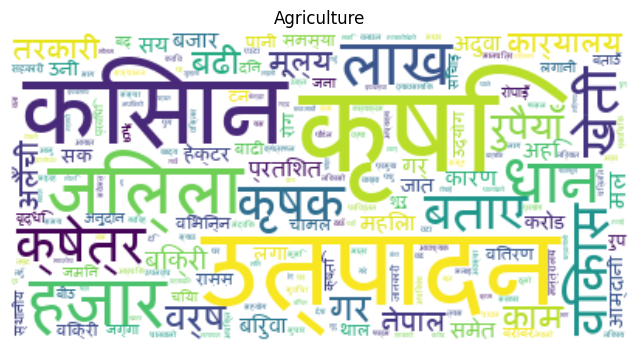

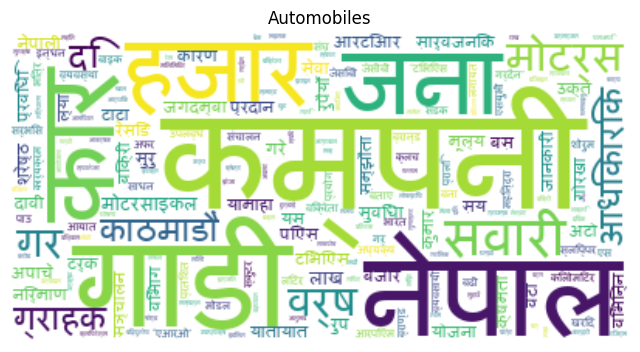

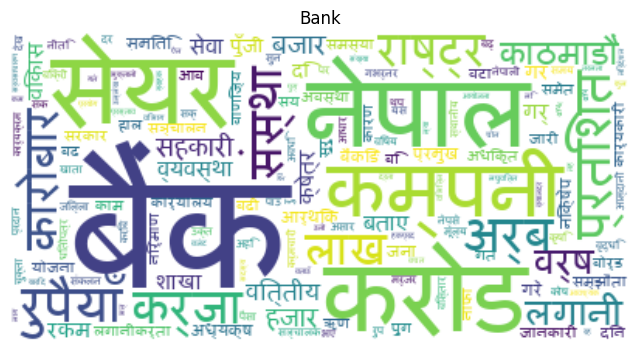

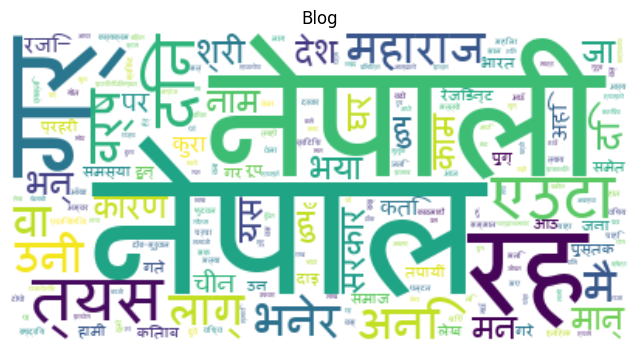

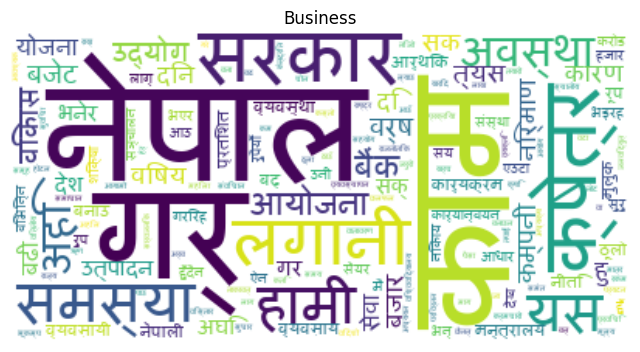

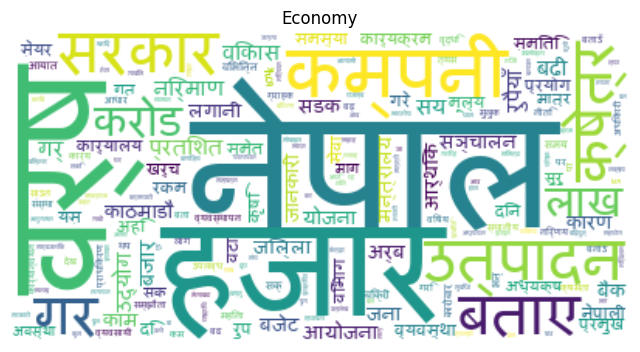

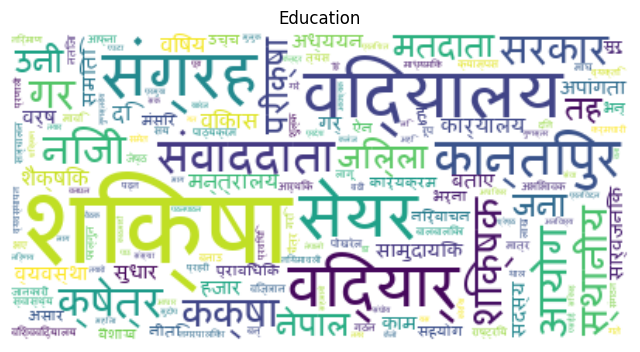

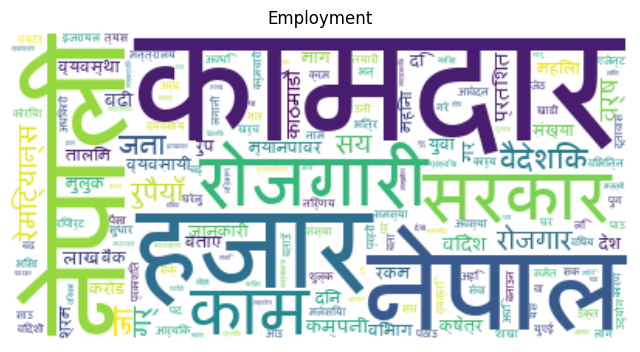

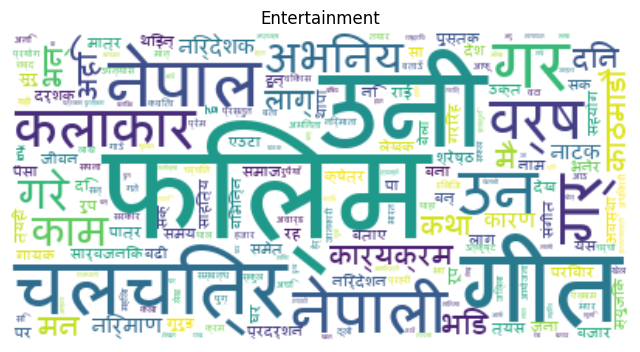

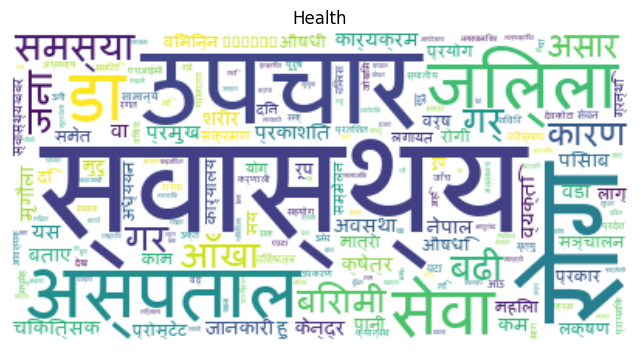

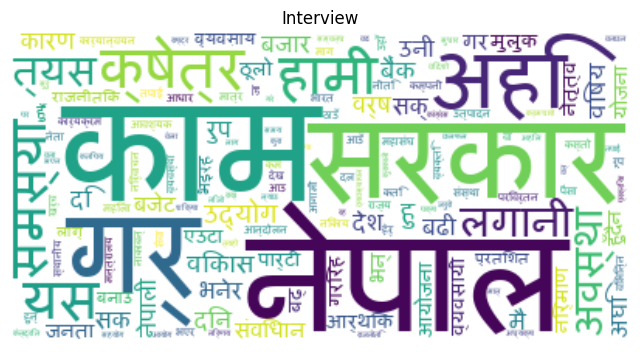

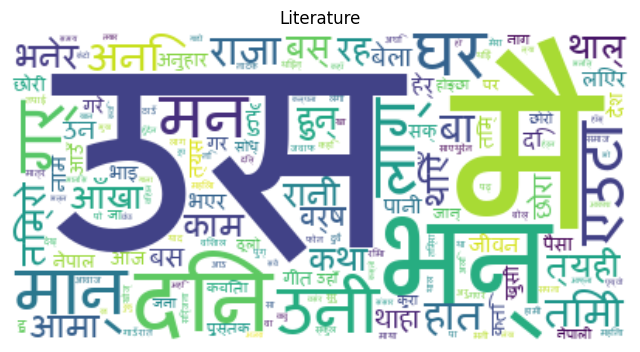

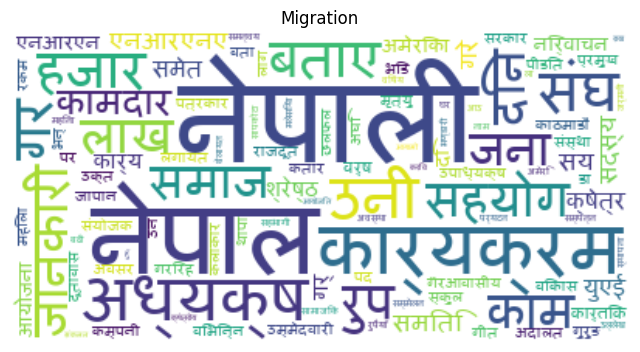

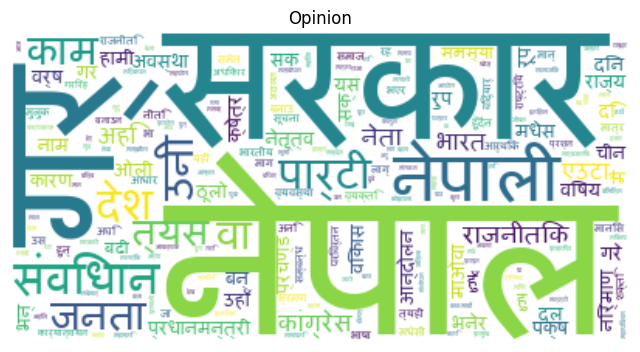

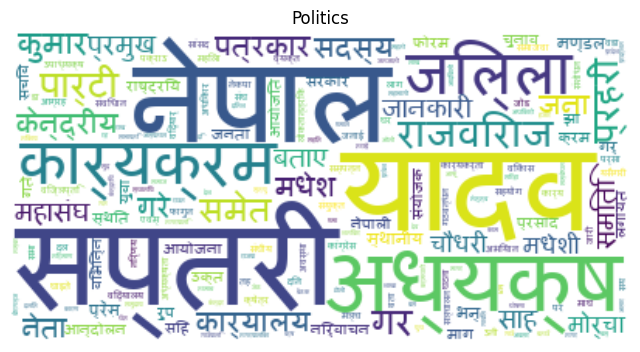

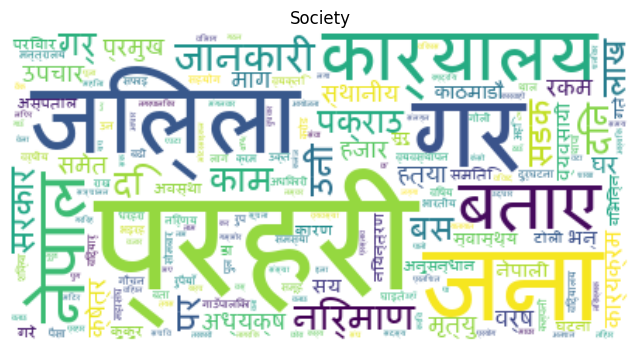

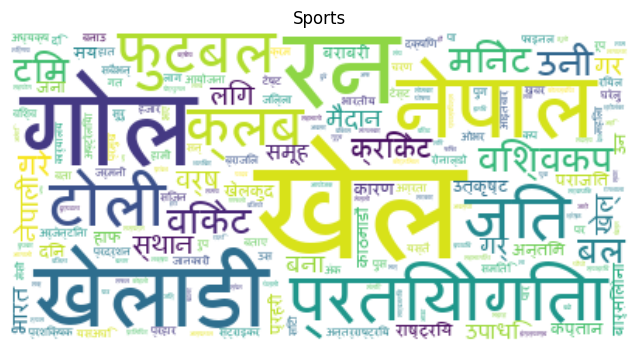

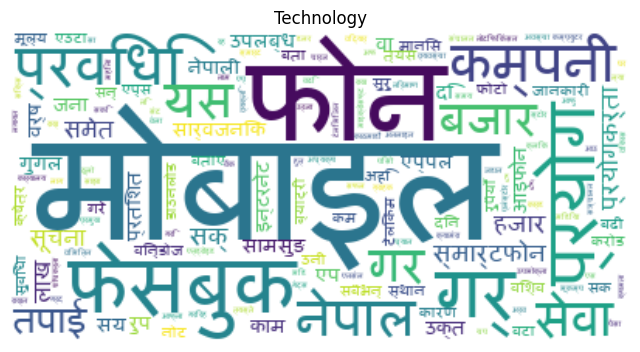

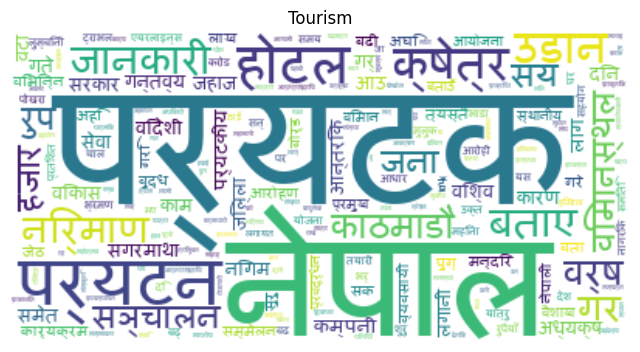

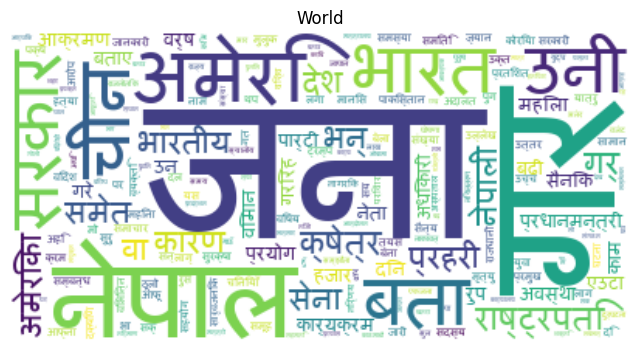

In [65]:
from collections import Counter
font_path='D:\Brave downloads\mangal-regular\Mangal Regular\Mangal Regular.otf'
font_prop=FontProperties(fname=font_path,size=25)
categories = data.label.unique()
for cat in categories:
  #print(cat)
  tdf = data[data.label==cat]

  cat_content = " ".join(tdf["text"])
  words = cat_content.split()
  
  nwords = dict(Counter(words))


  word_cloud = WordCloud(collocations = False,font_path= font_path, background_color = 'white').generate_from_frequencies(nwords)

  fig = plt.figure(figsize=(8,10))
  plt.imshow(word_cloud, interpolation="bilinear")
  # remove plot axes
  plt.axis("off")
  plt.title(cat)
  plt.show()
  # break

In [66]:
def plot_nepali(pdict, figsize=(40, 15),fontsize=20, title="Bar Plot", xlabel="Author", ylabel="Frequency", top=5):
  # pdict = {k:v for k,v in pdict.items() if v>mw}
  pdict = {k: v for k, v in sorted(pdict.items(), key=lambda item: item[1], reverse=True)}
  npdict = {}
  cnt = 1

  for k, v in pdict.items():
    if cnt>top:
      break
    npdict[k]=v
    cnt+=1
  pdict=npdict

  plt.rcParams["figure.figsize"] = figsize
  ax = plt.subplot()

  val_val = pdict.values()
  key_val = pdict.keys()
  br = plt.bar(list(key_val), val_val)


  for label in (ax.get_xticklabels() + ax.get_yticklabels()):
      label.set_fontproperties(font_prop)
      label.set_fontsize(fontsize)  # Size here overrides font_prop


  plt.title(title,
            size=30, verticalalignment='bottom')  # Size here overrides font_prop
  plt.xlabel(xlabel, fontsize=fontsize)
  plt.ylabel(ylabel, fontsize=fontsize)


  plt.show()

C:\Users\koshi\anaconda3\envs\tf-w-gpu\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\koshi\anaconda3\envs\tf-w-gpu\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


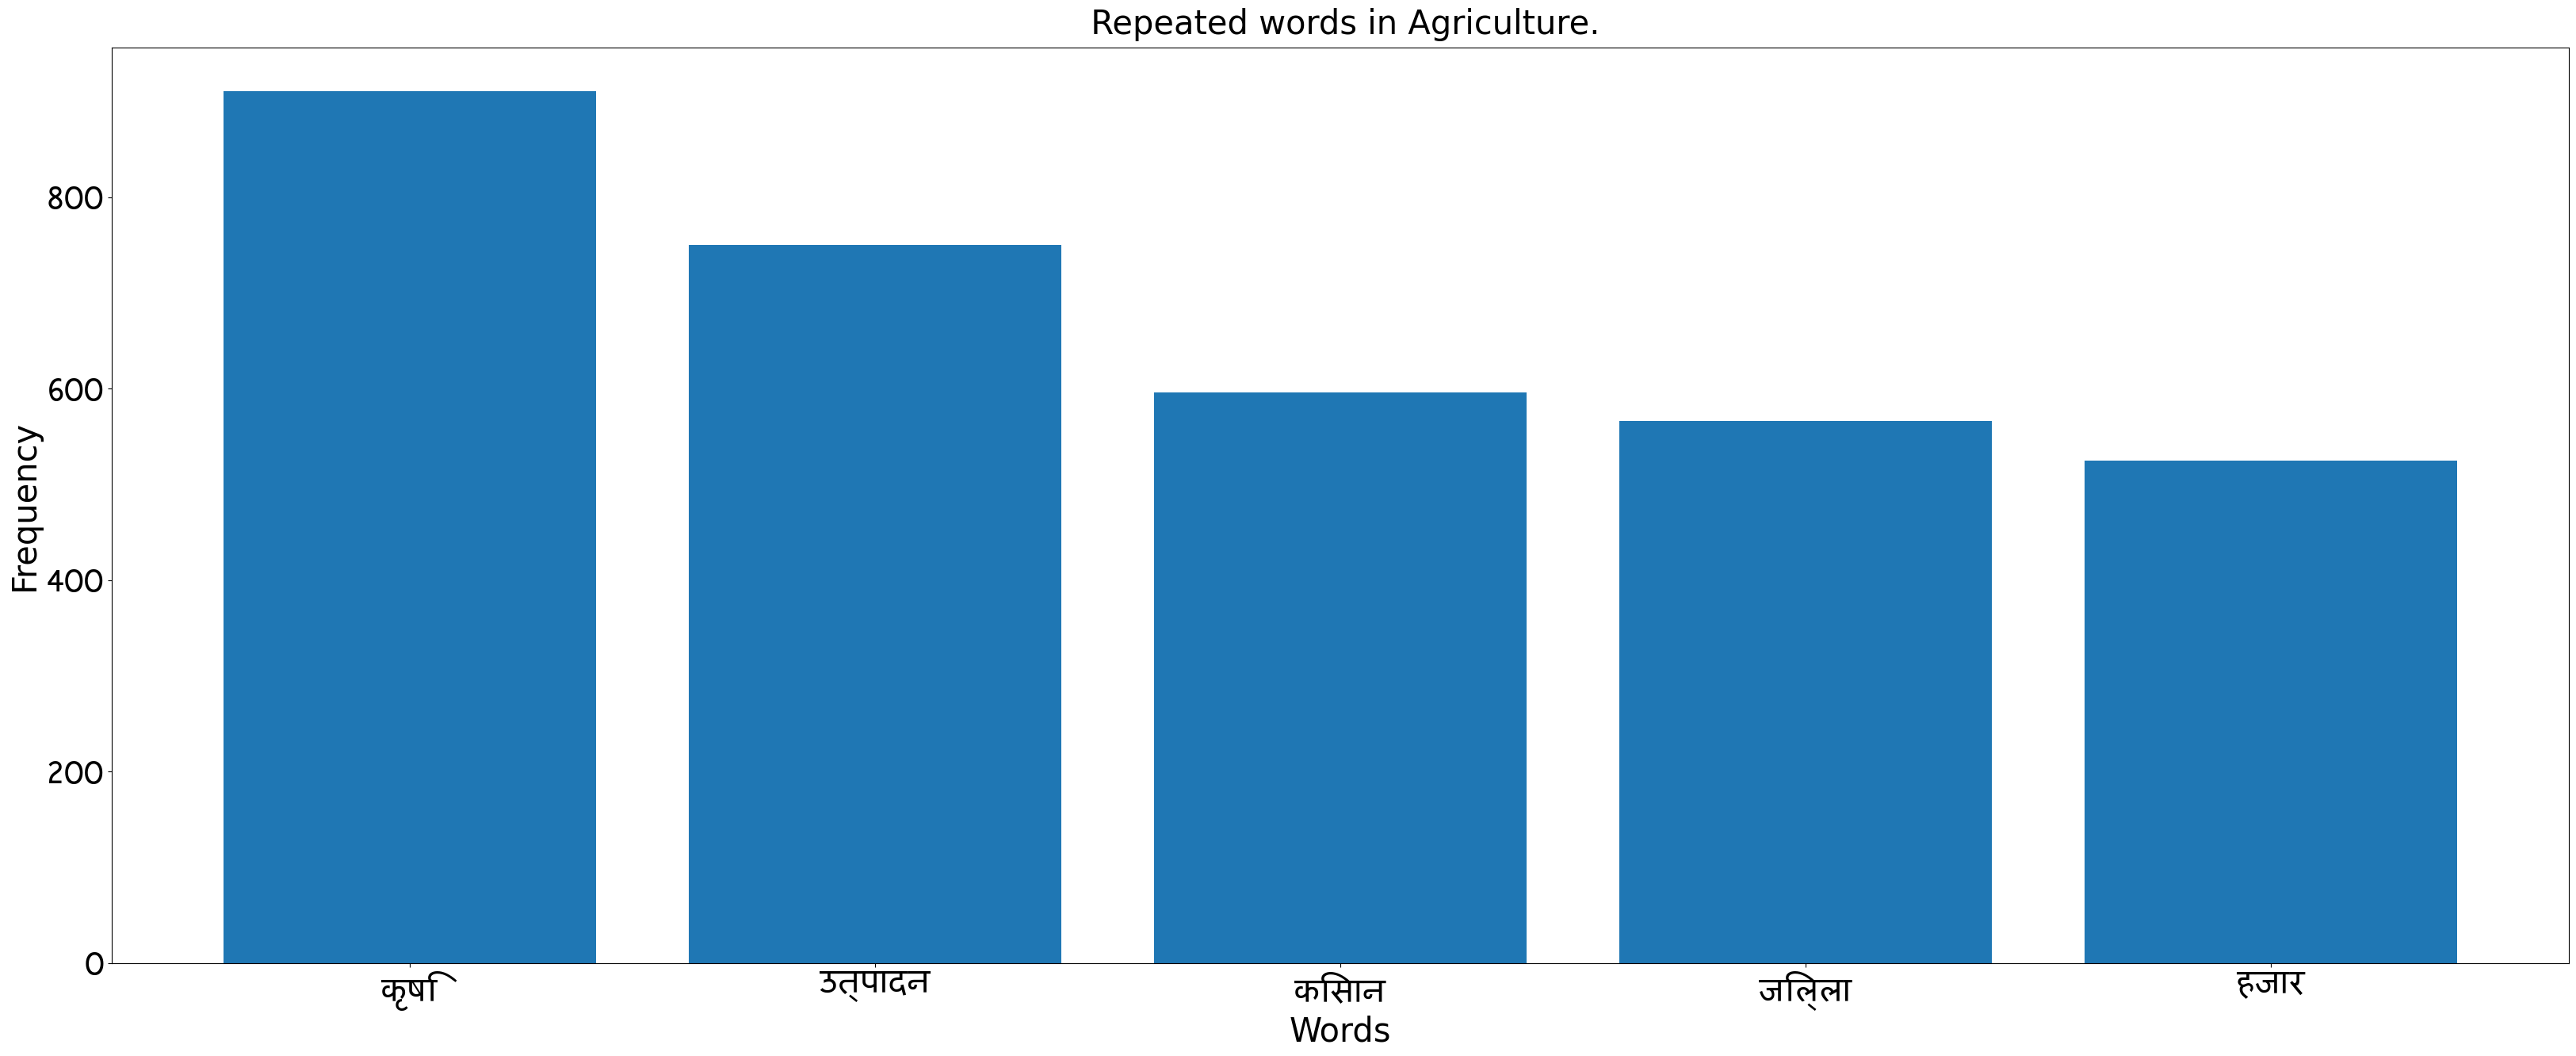

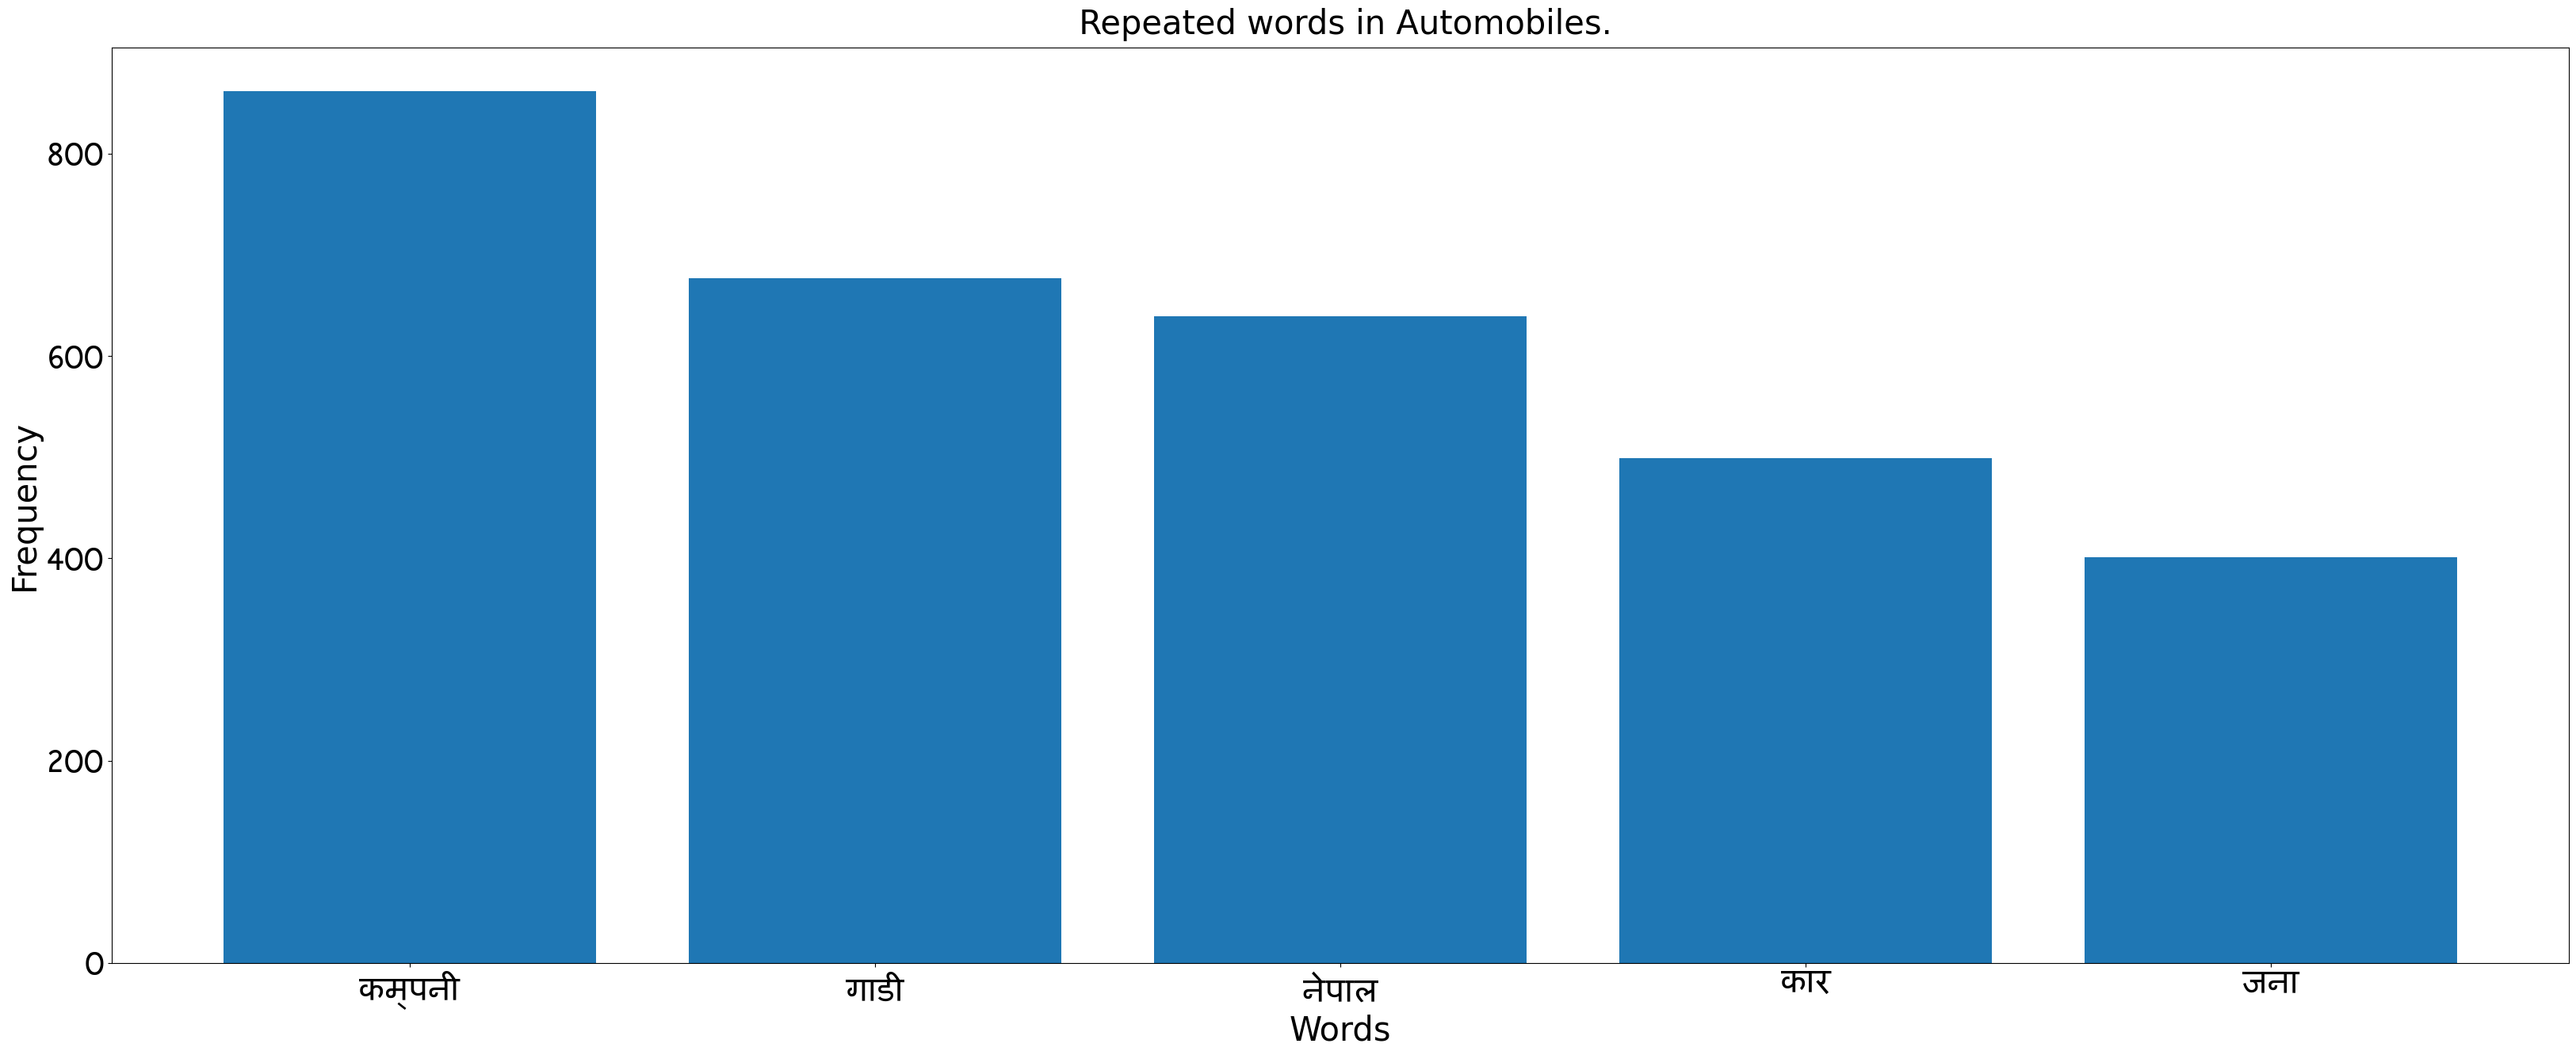

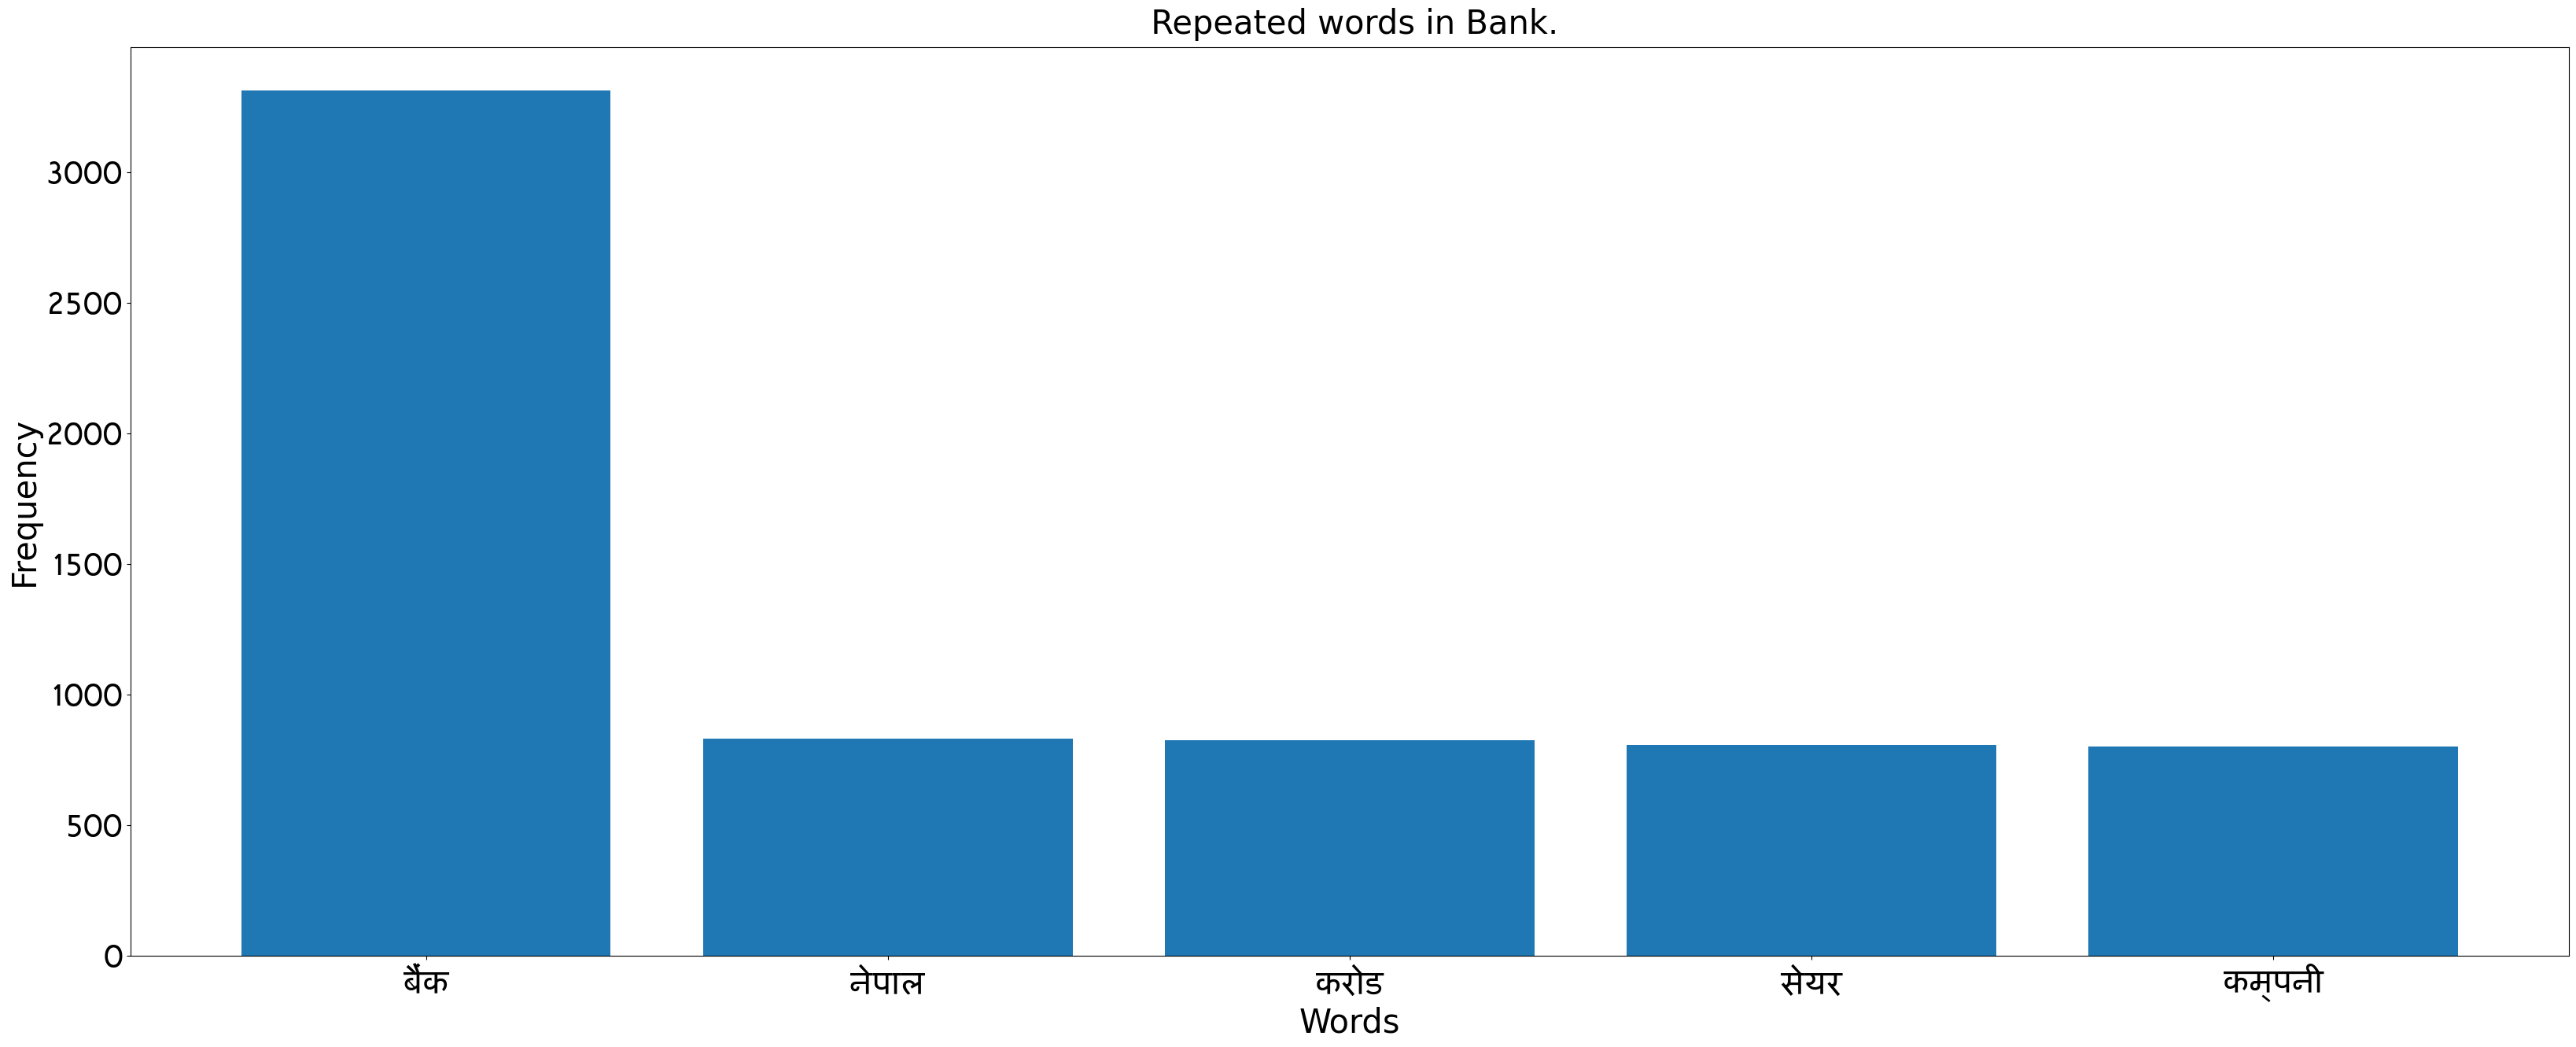

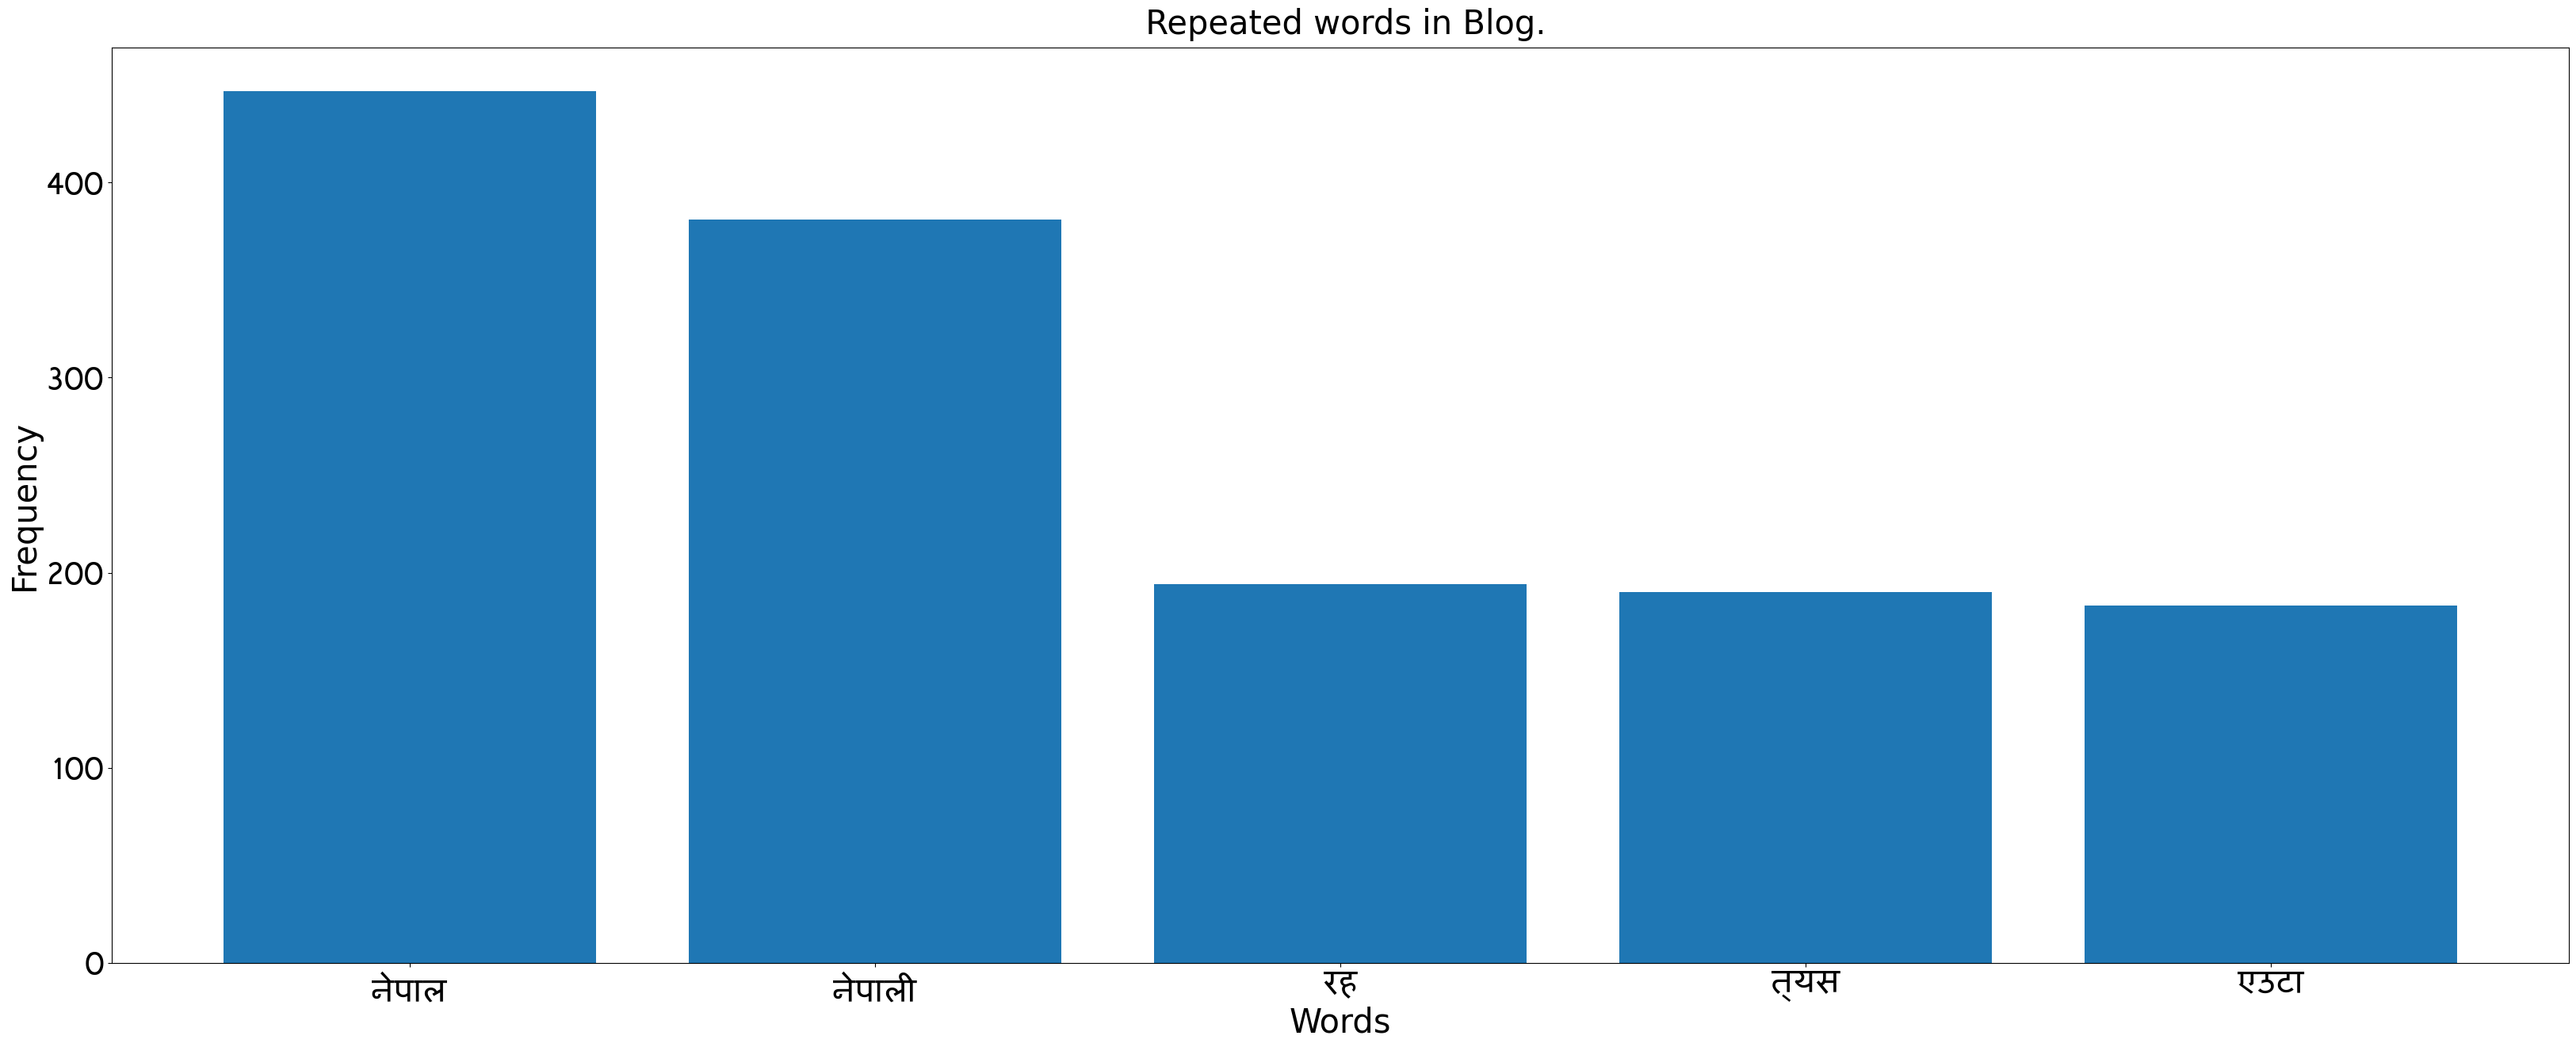

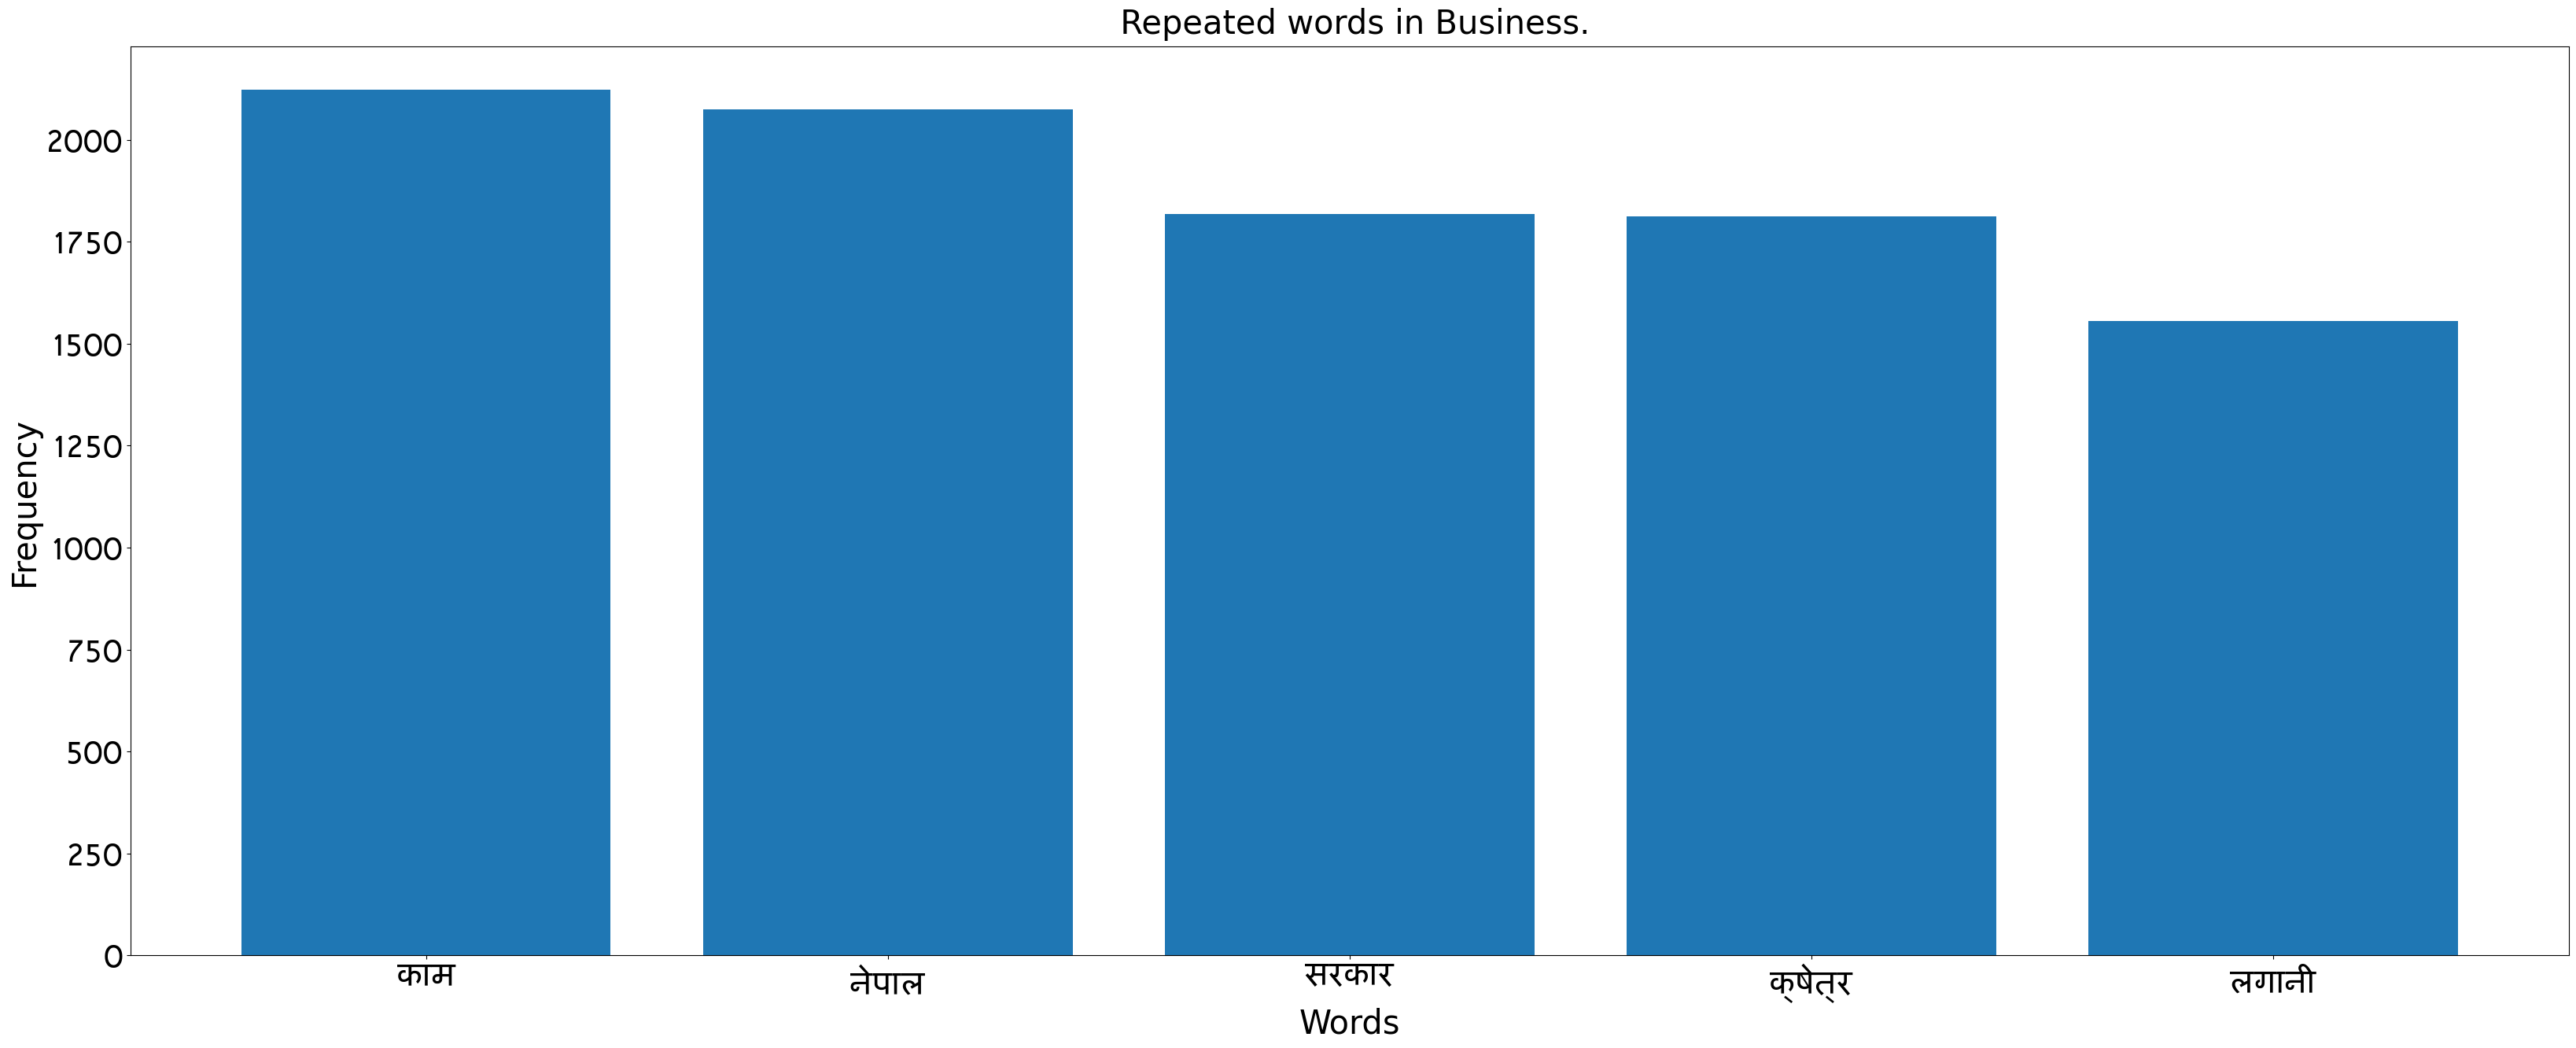

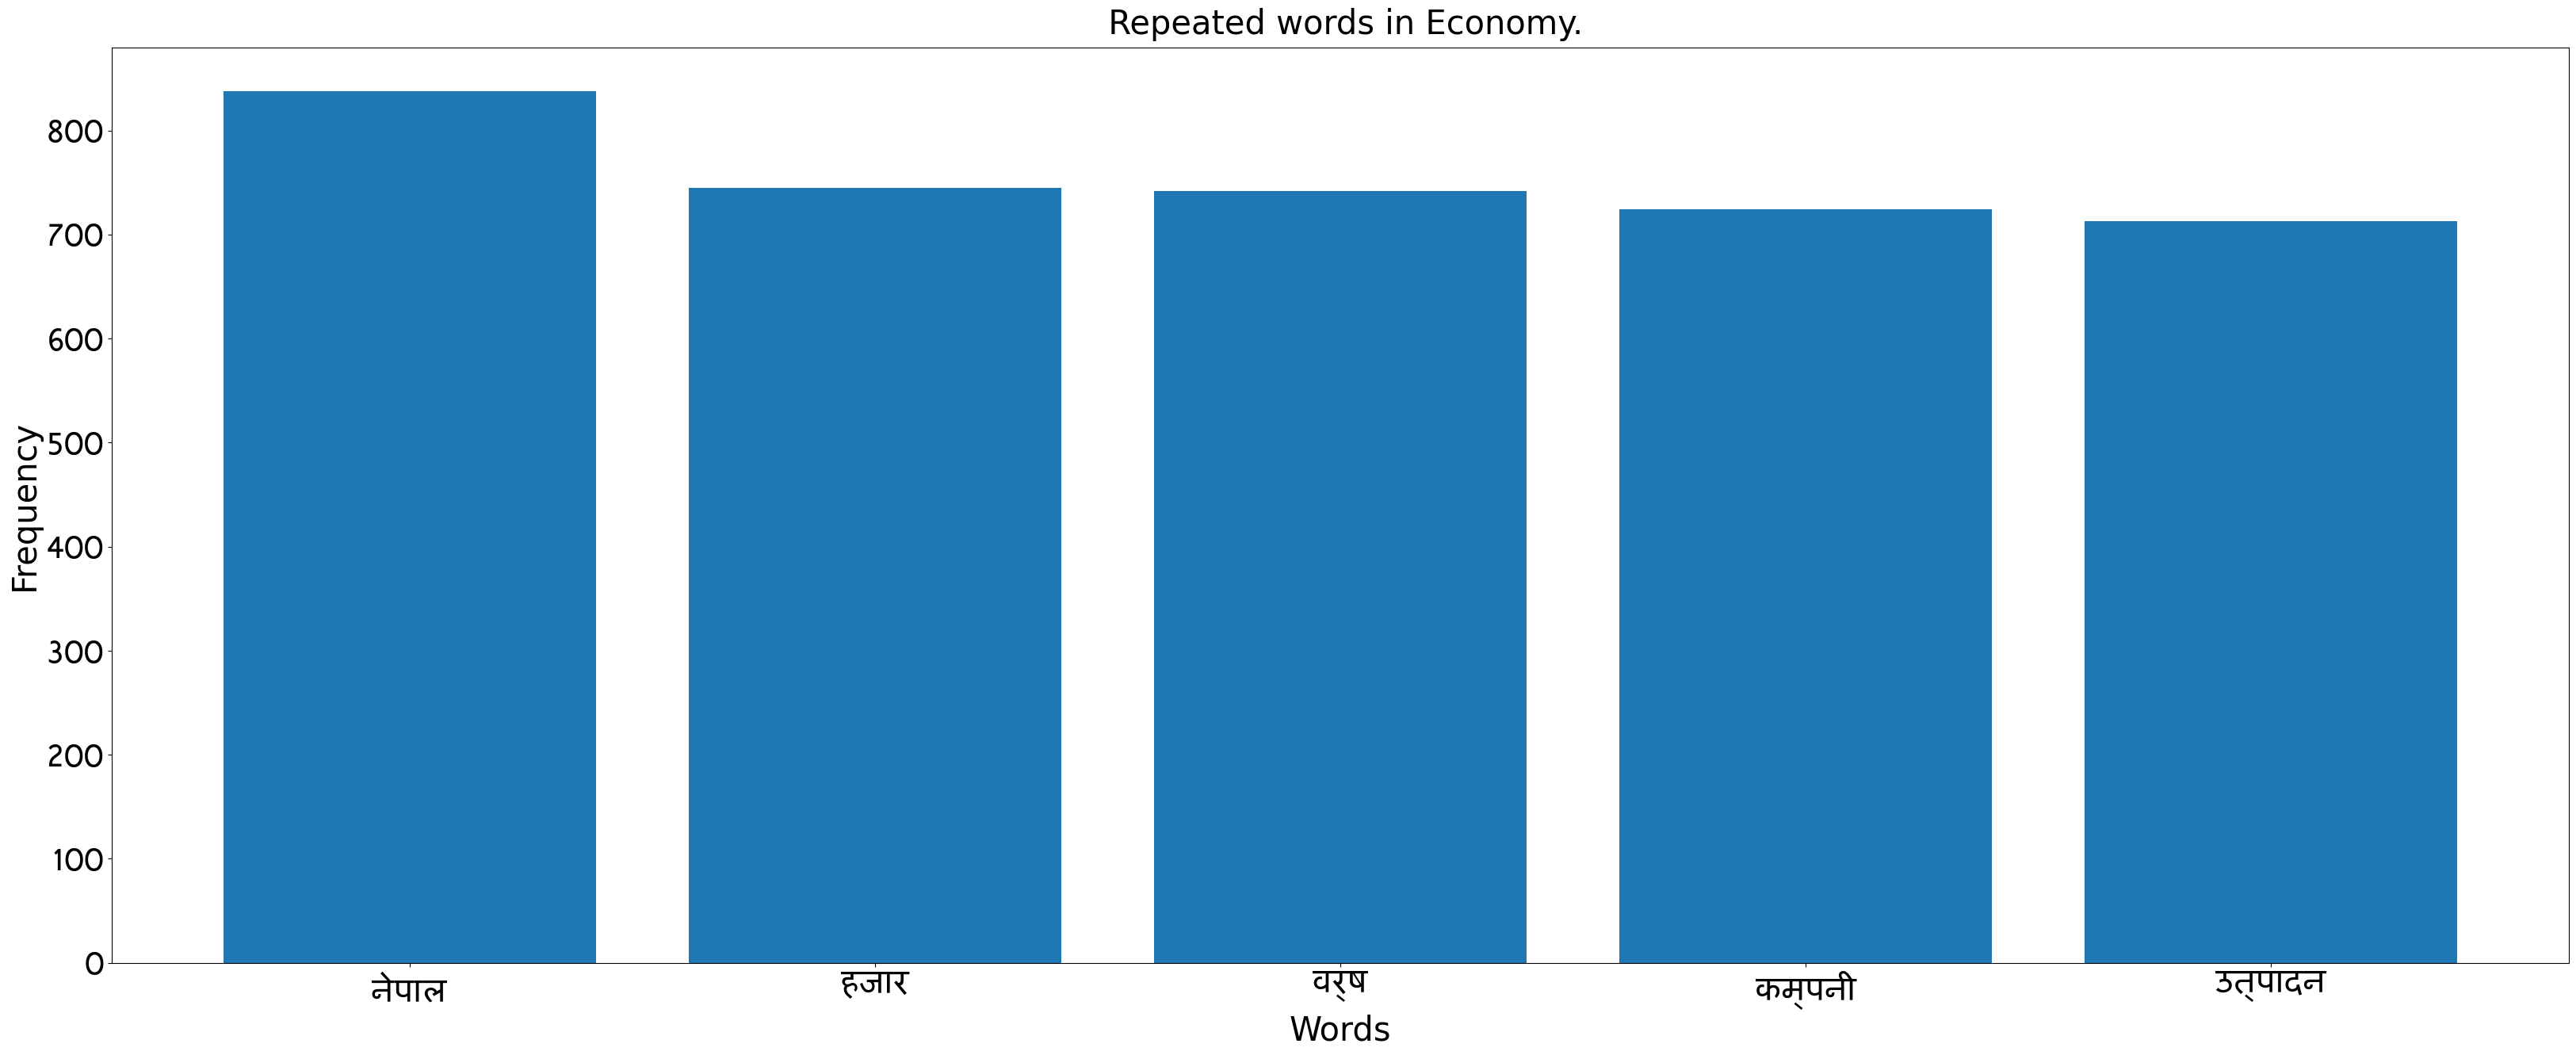

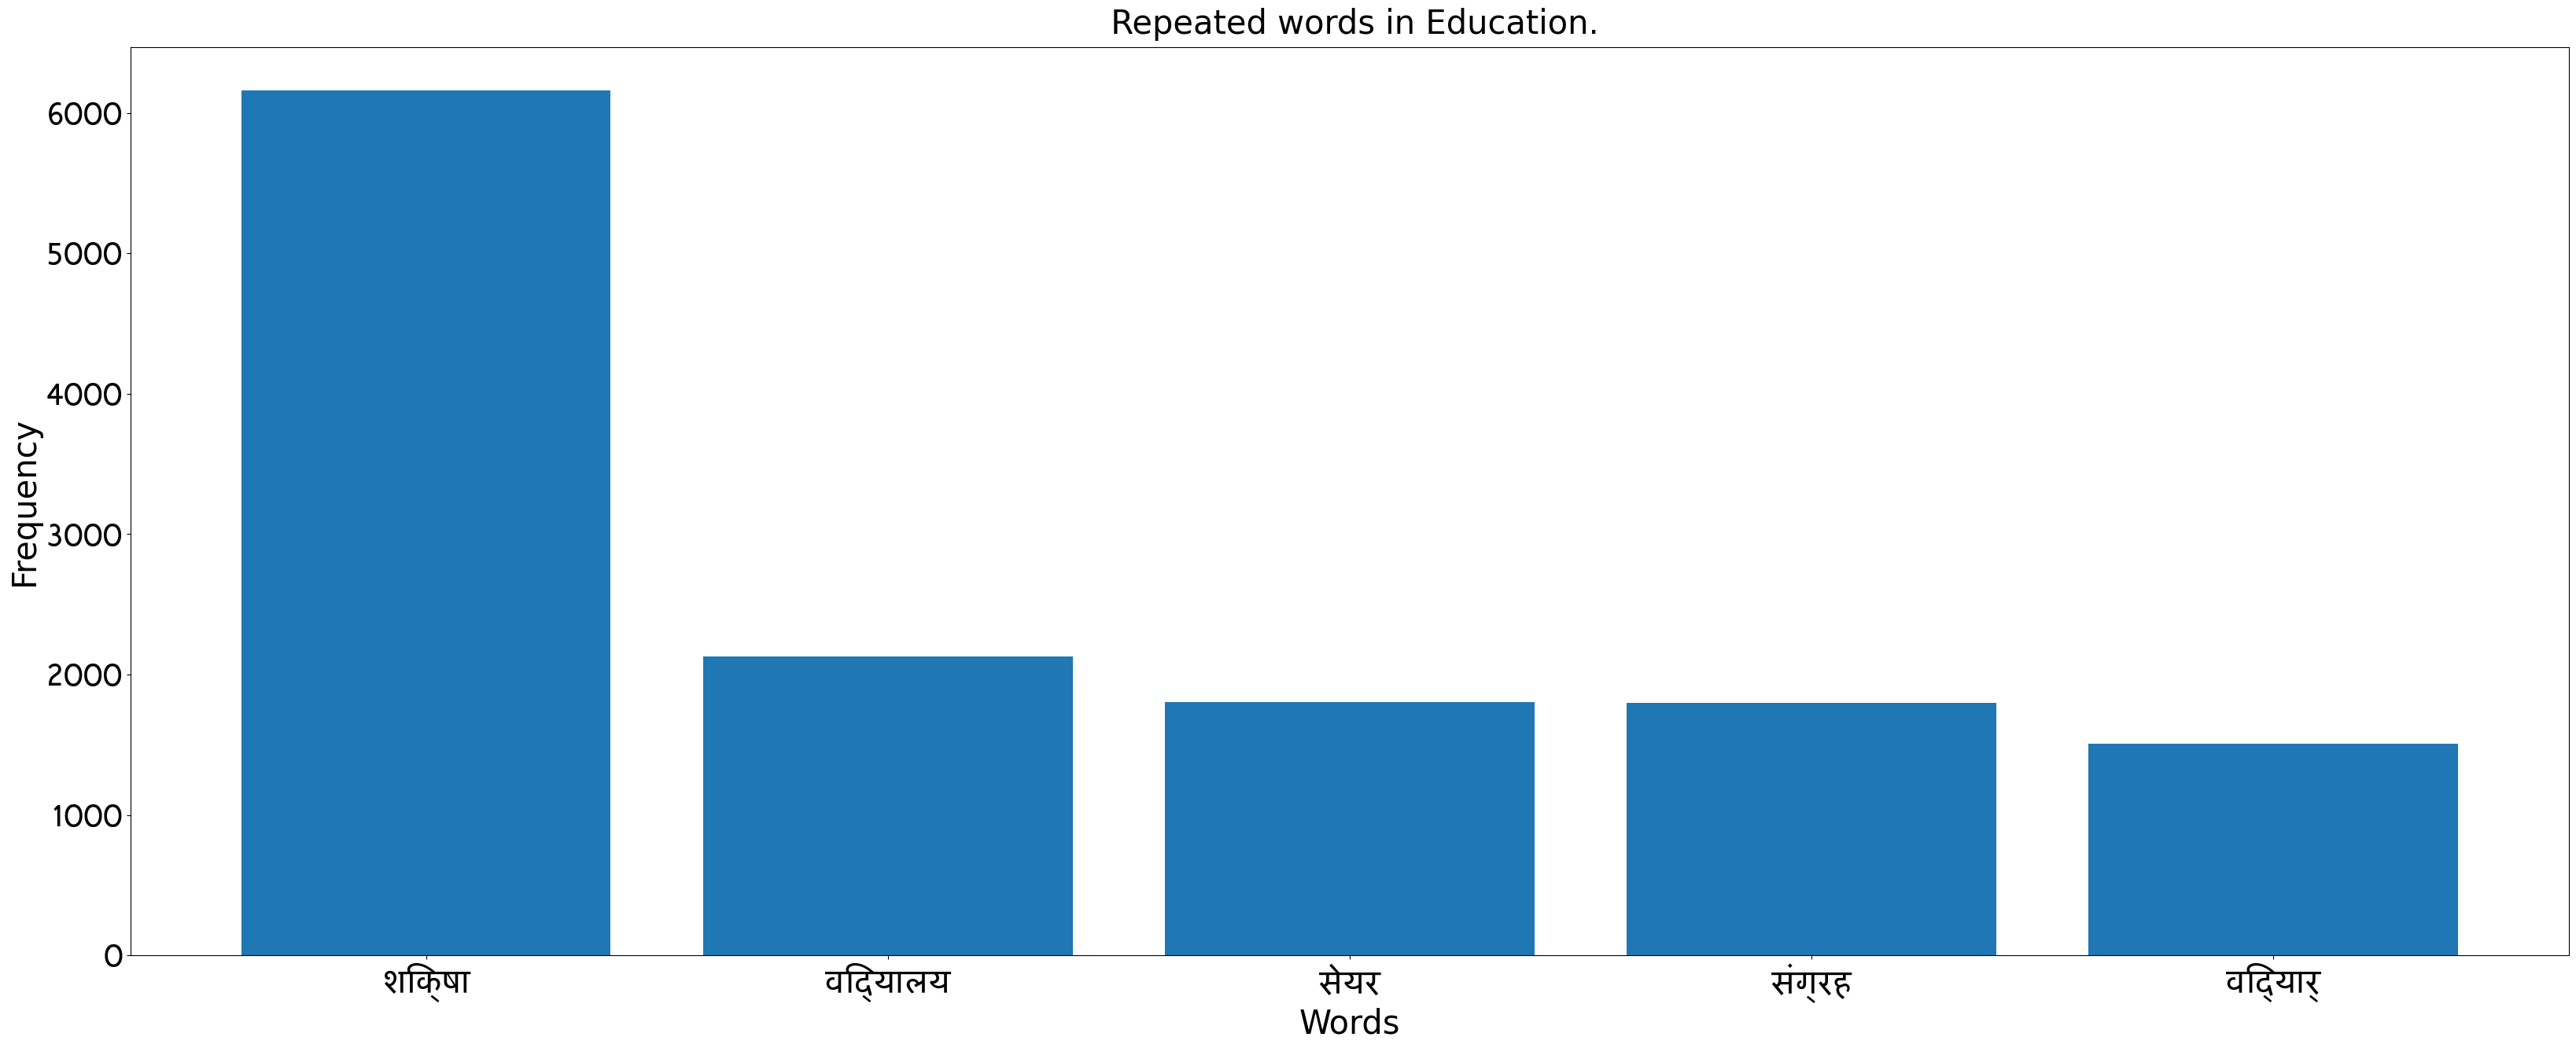

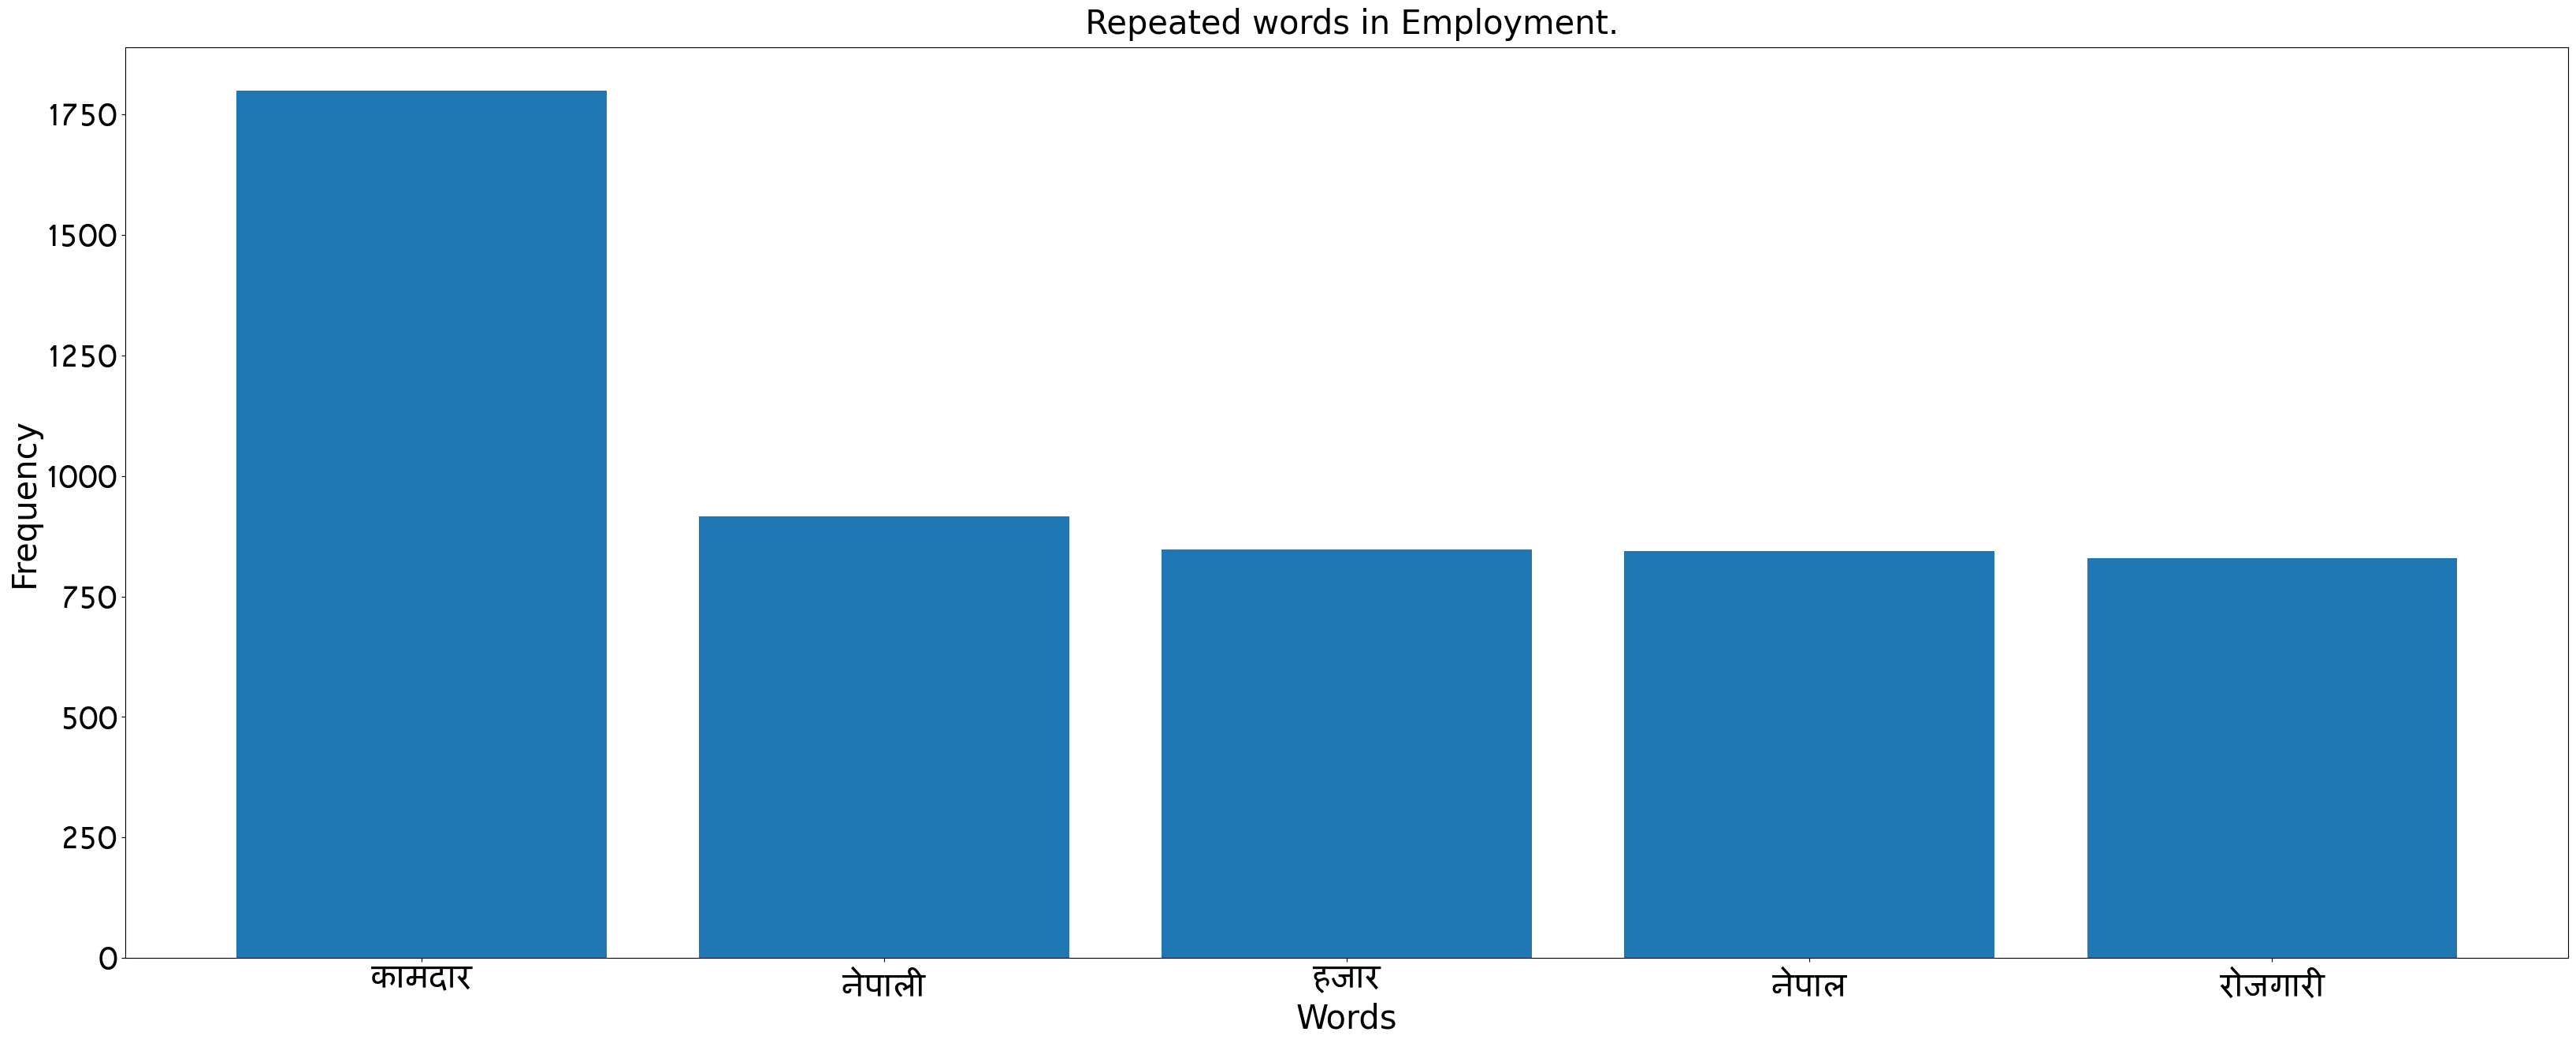

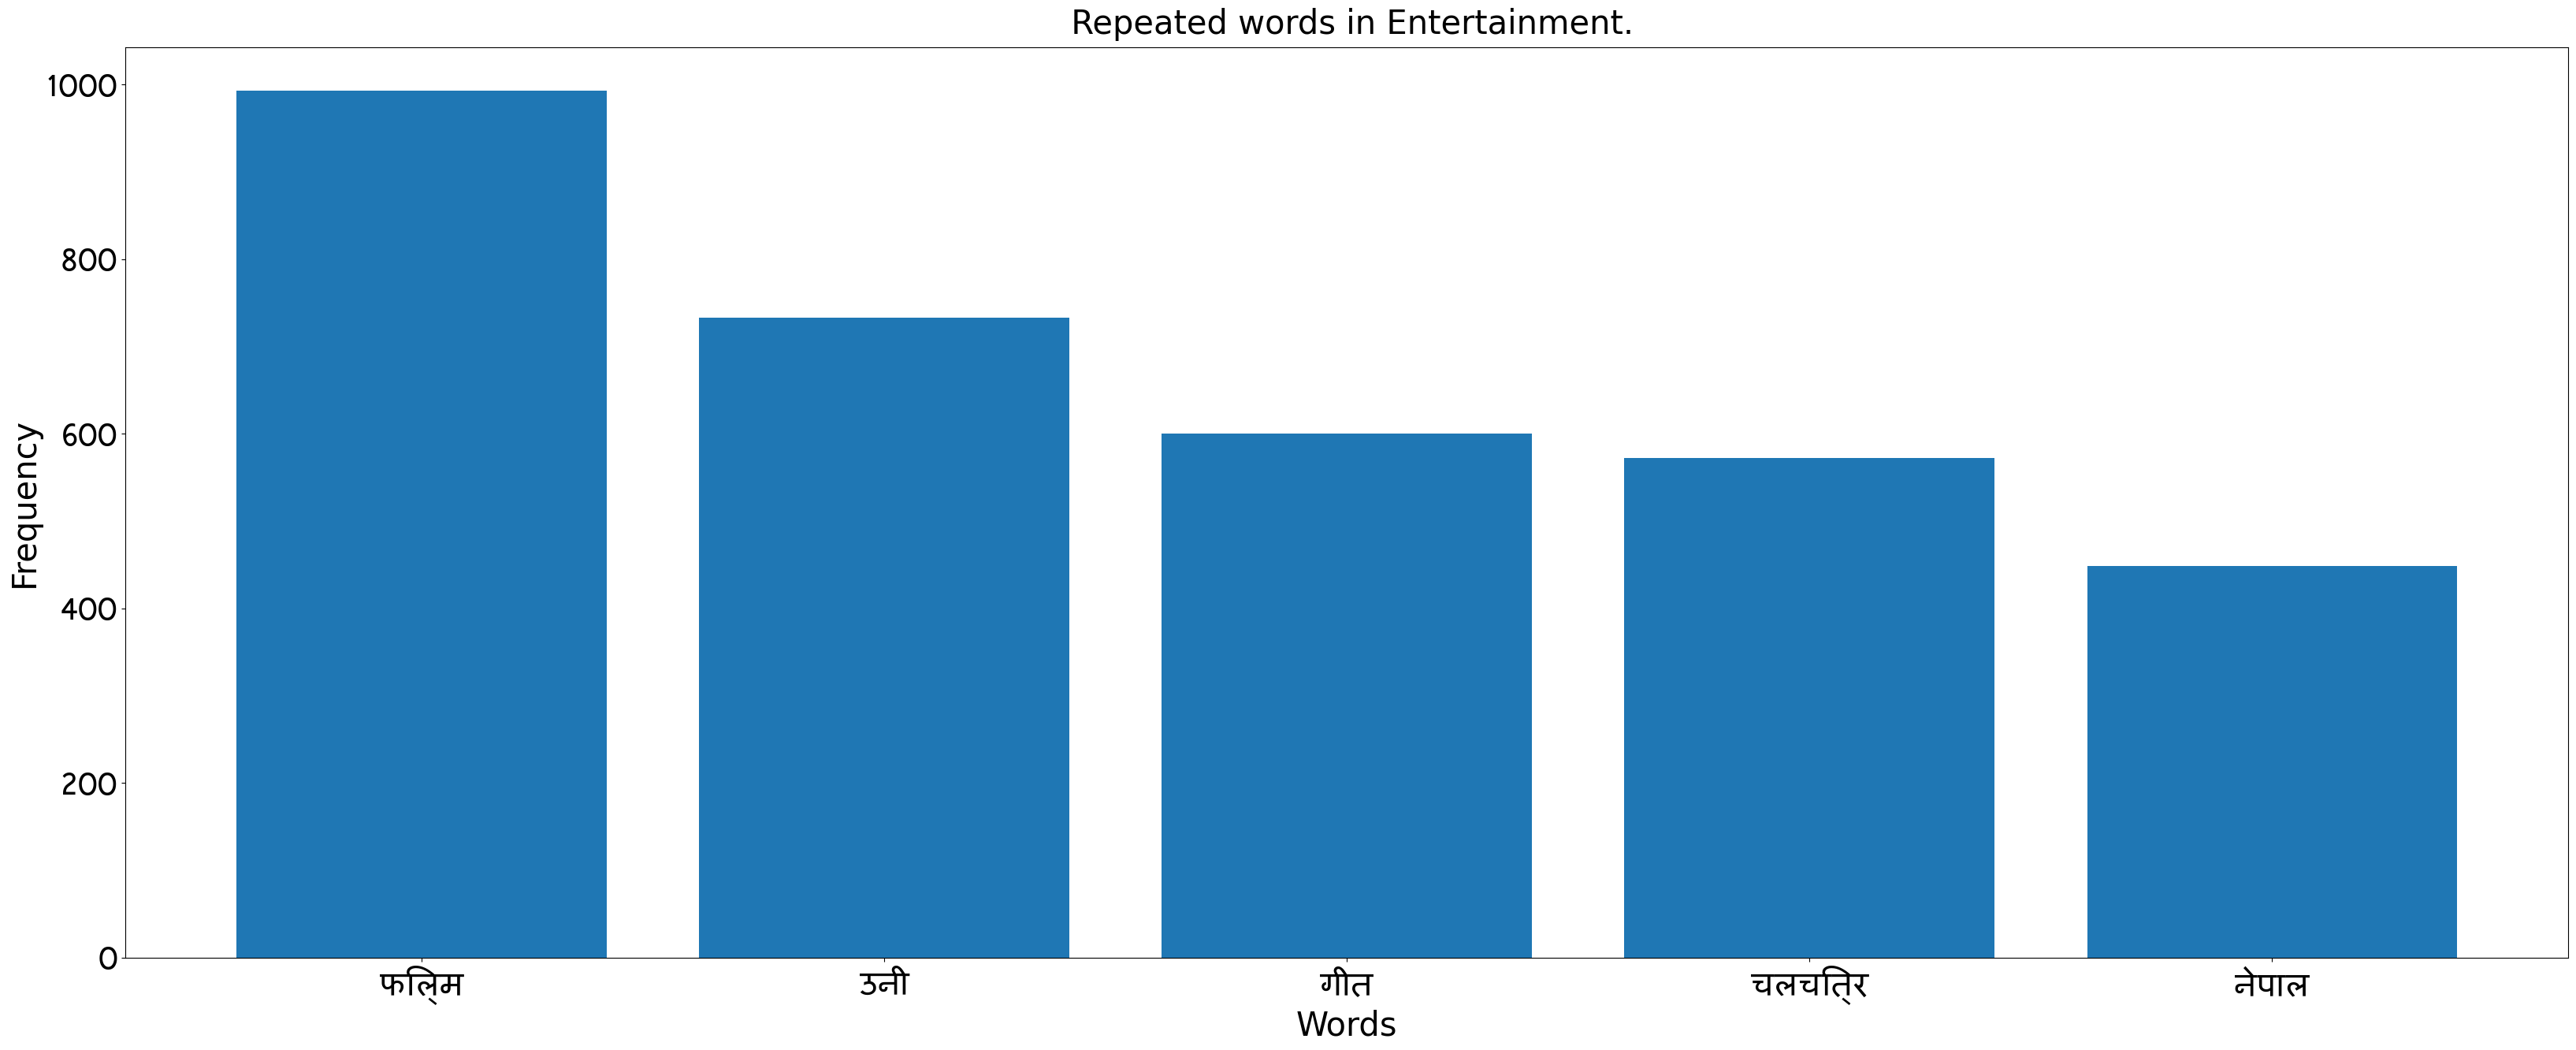

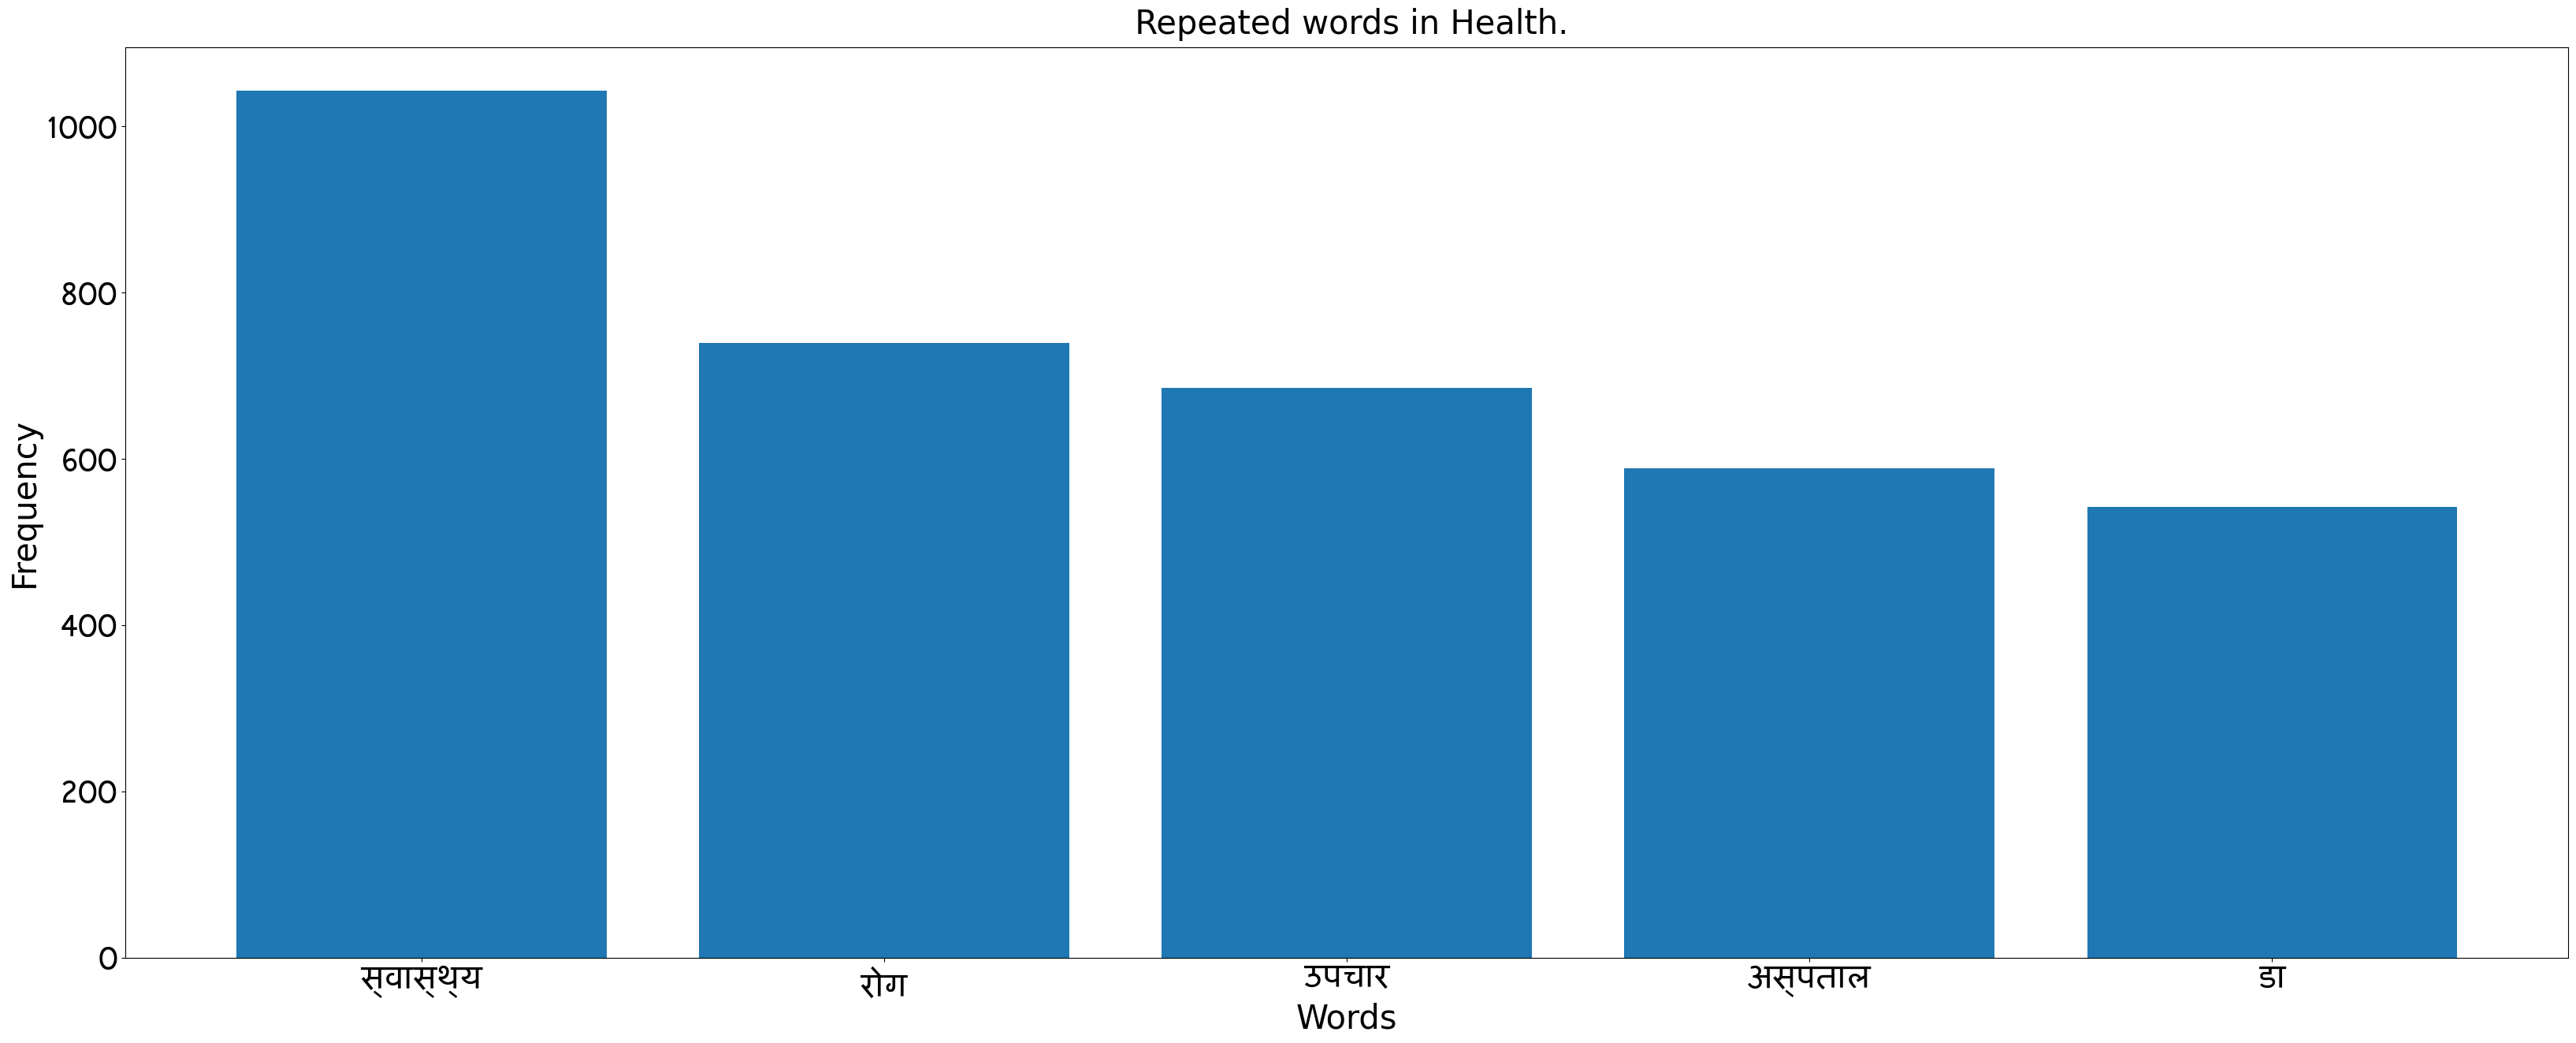

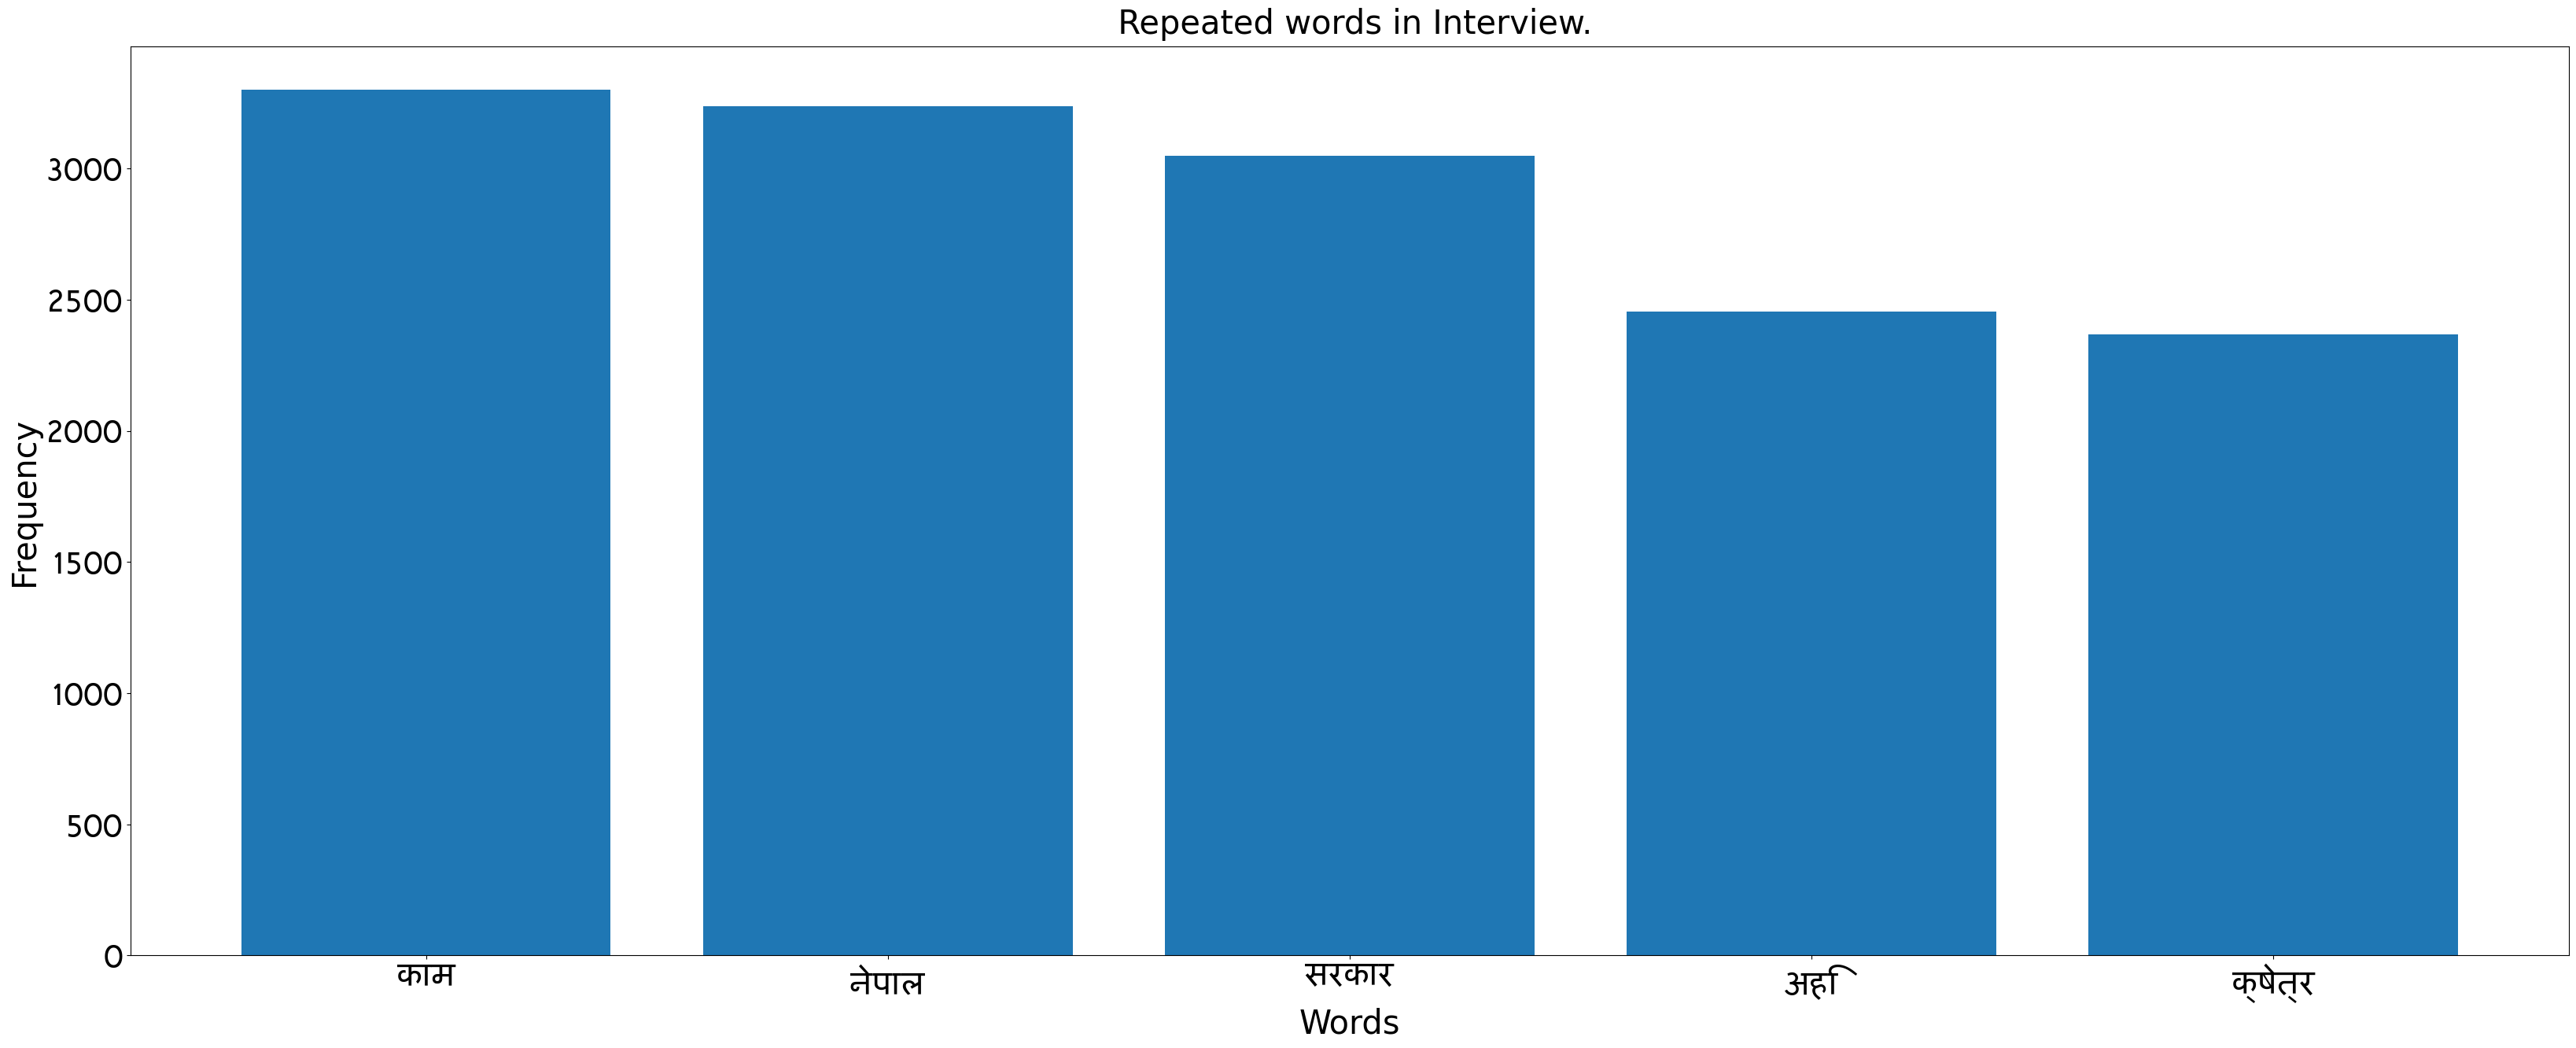

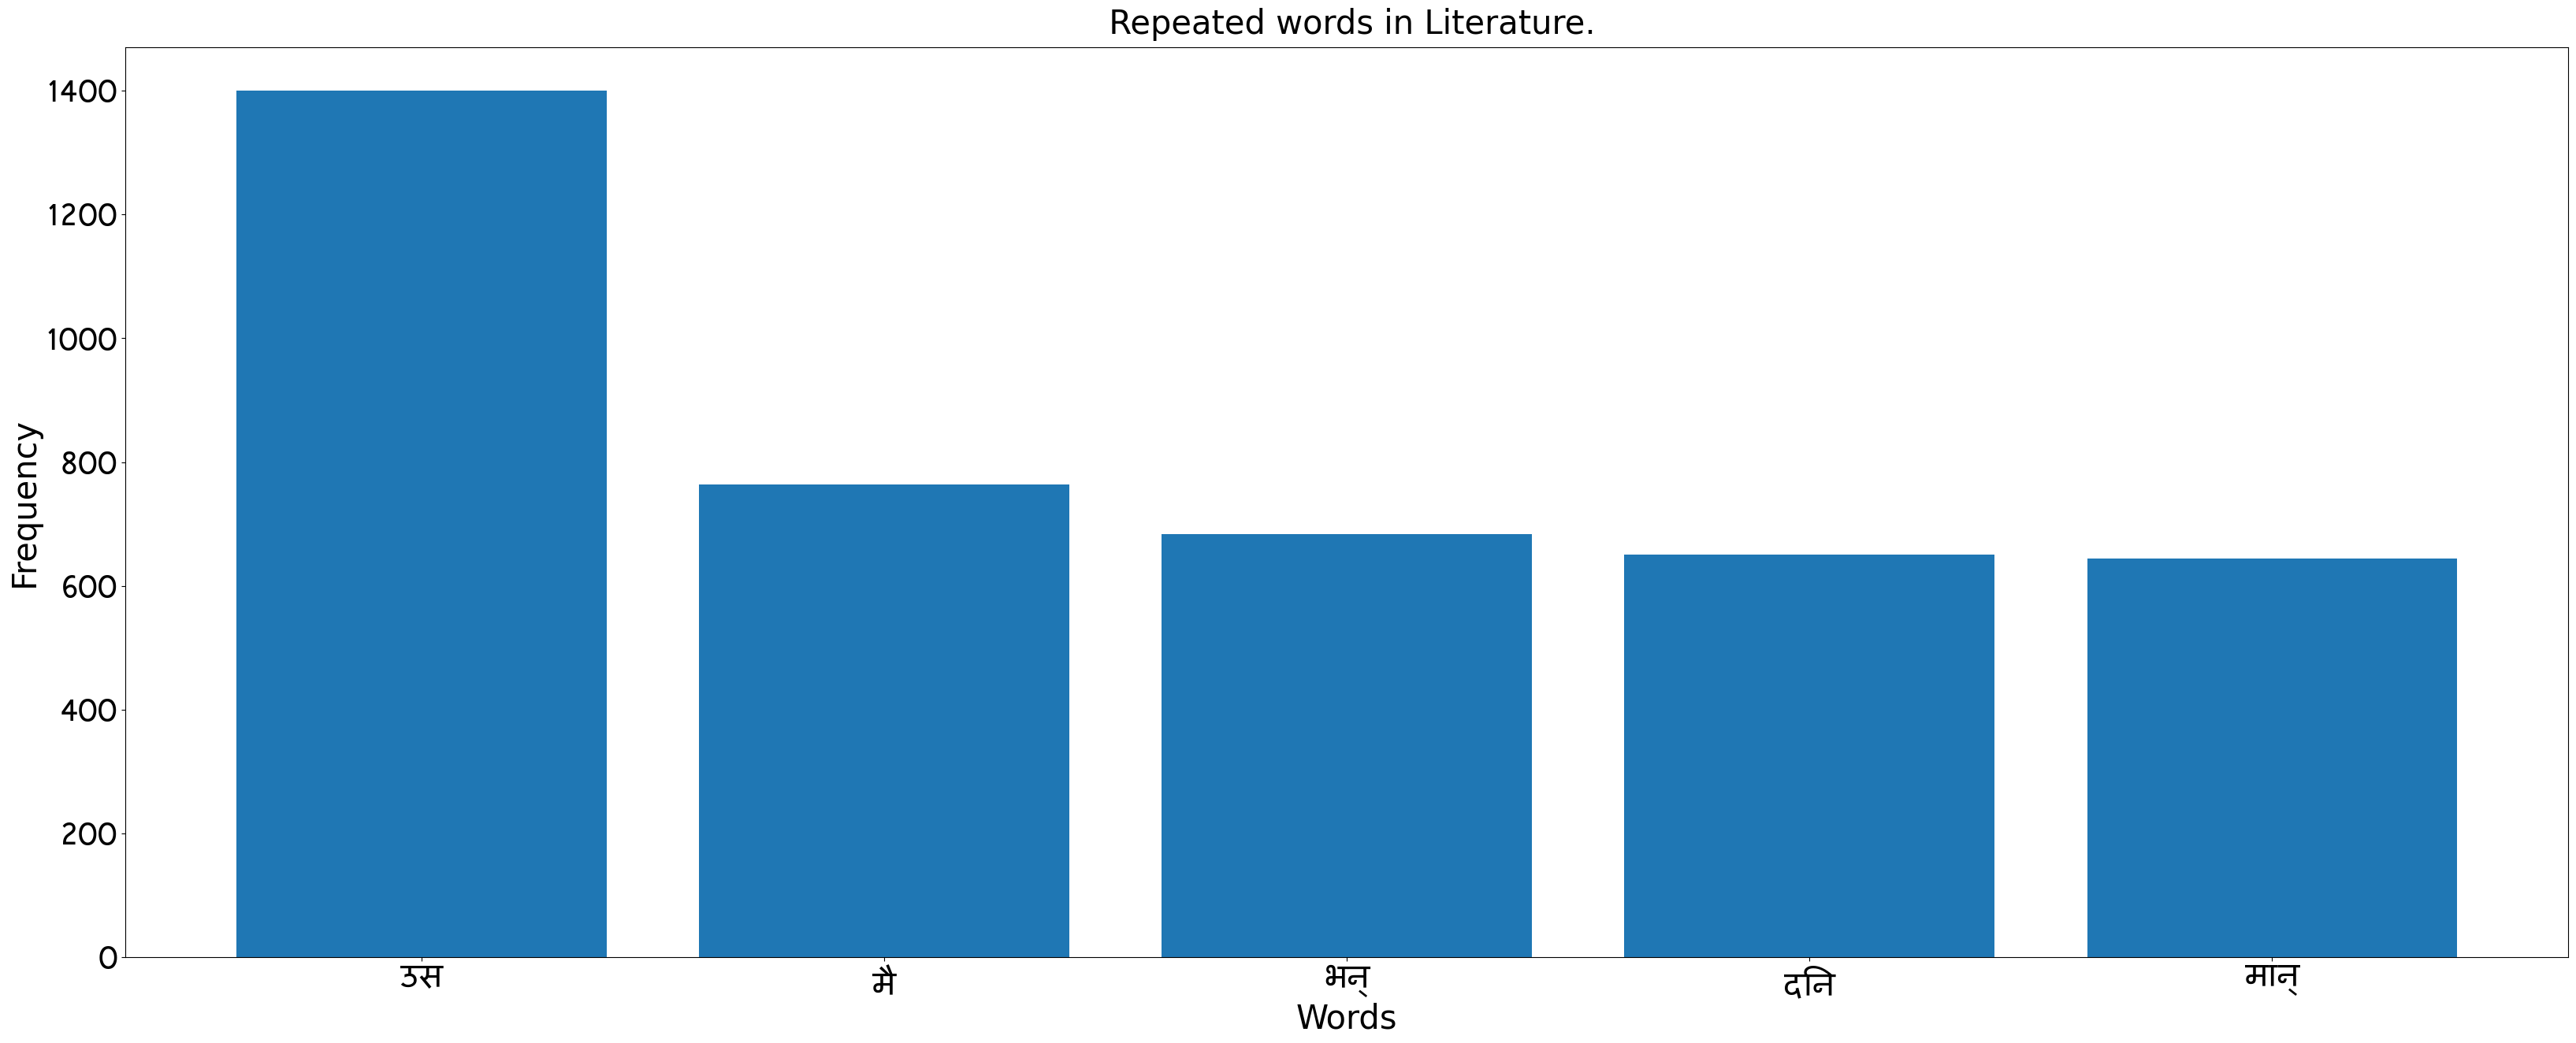

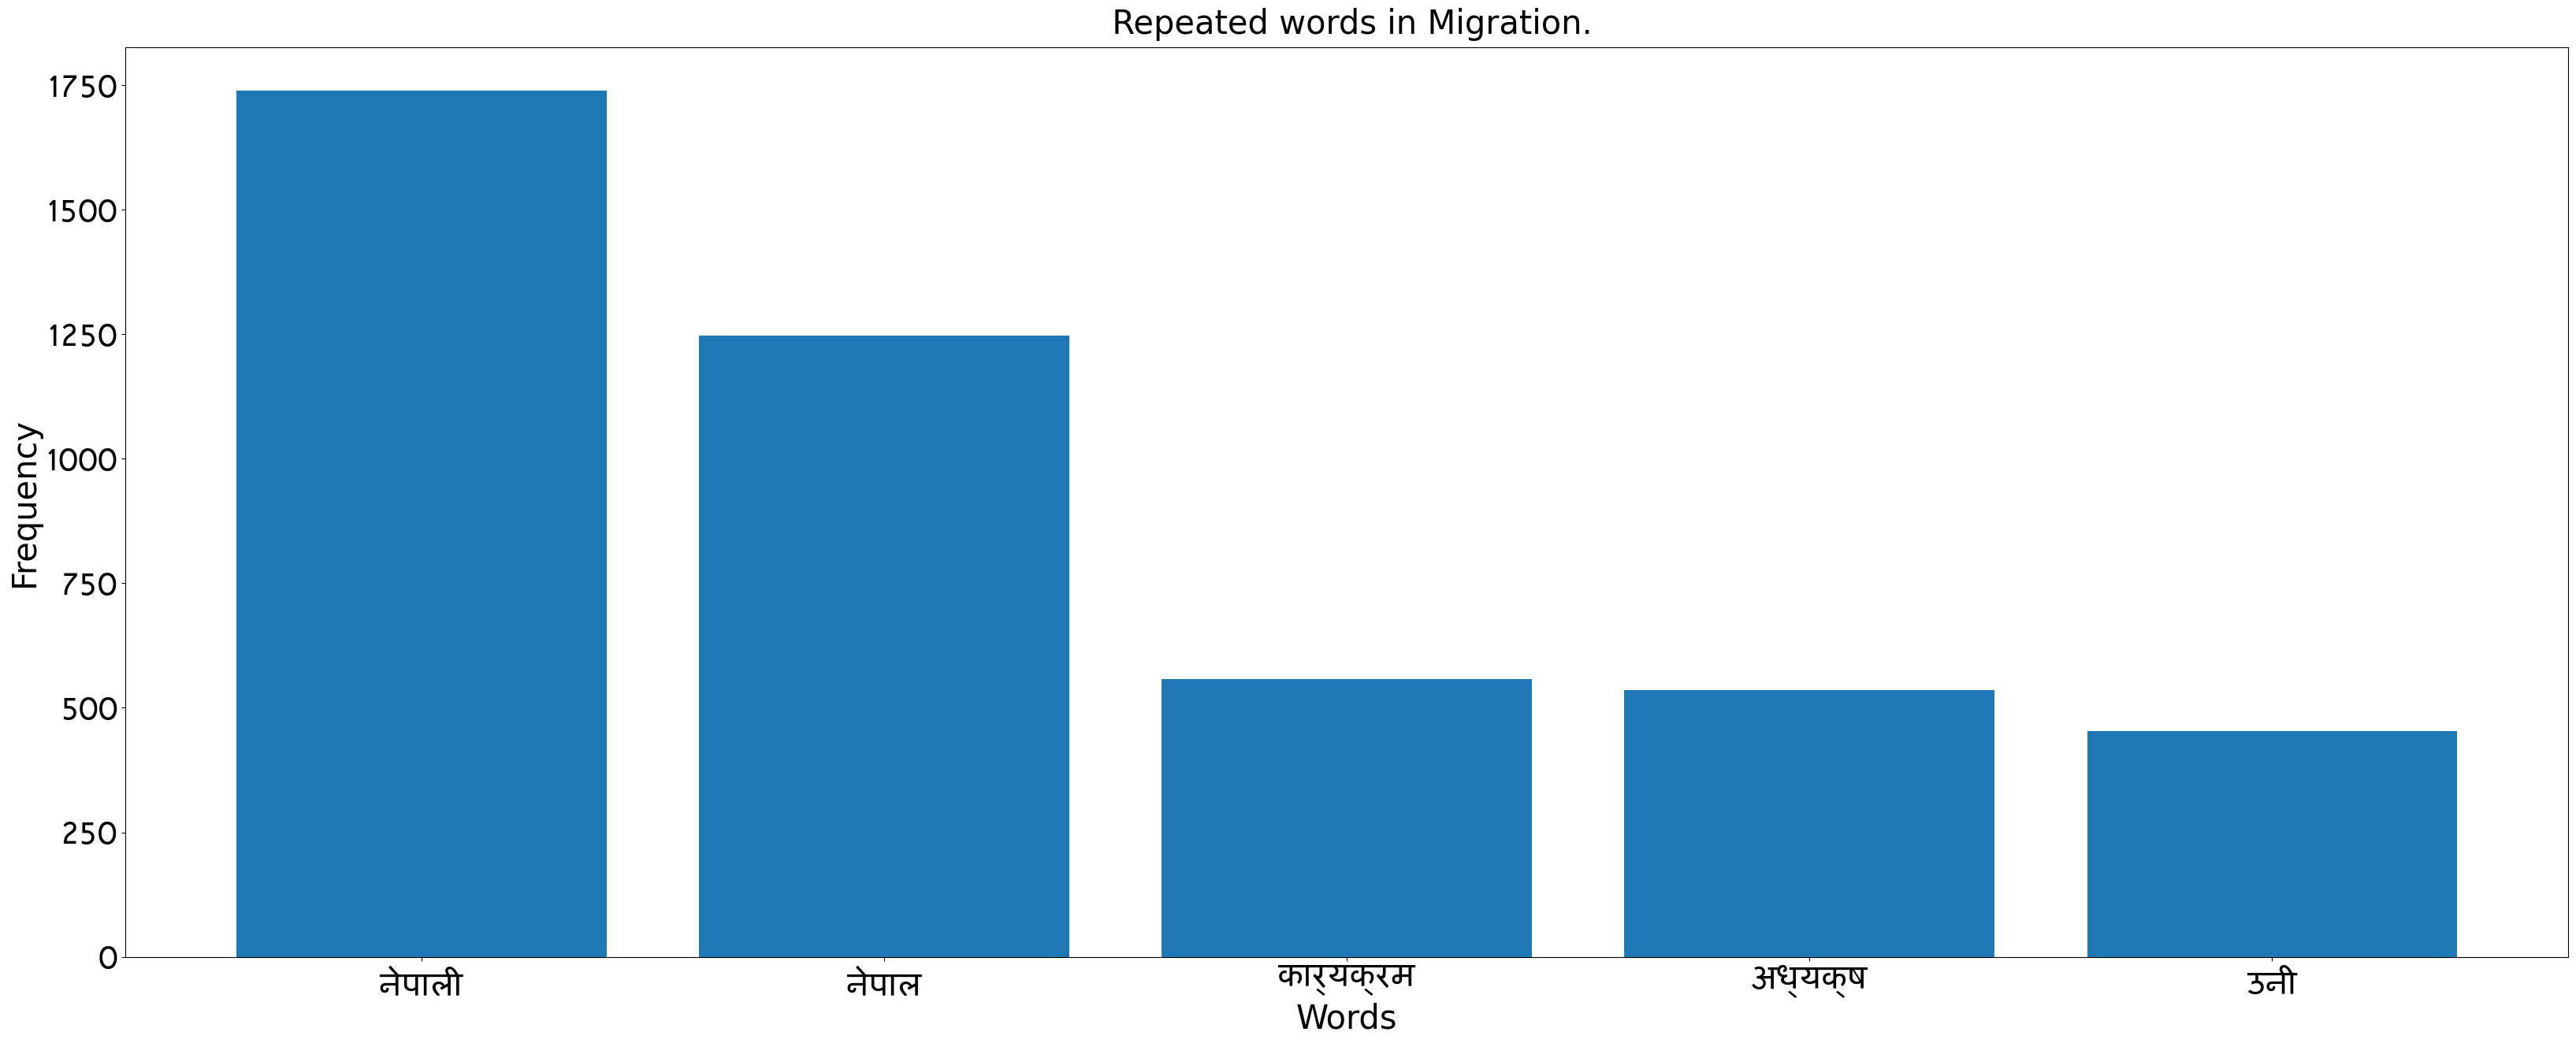

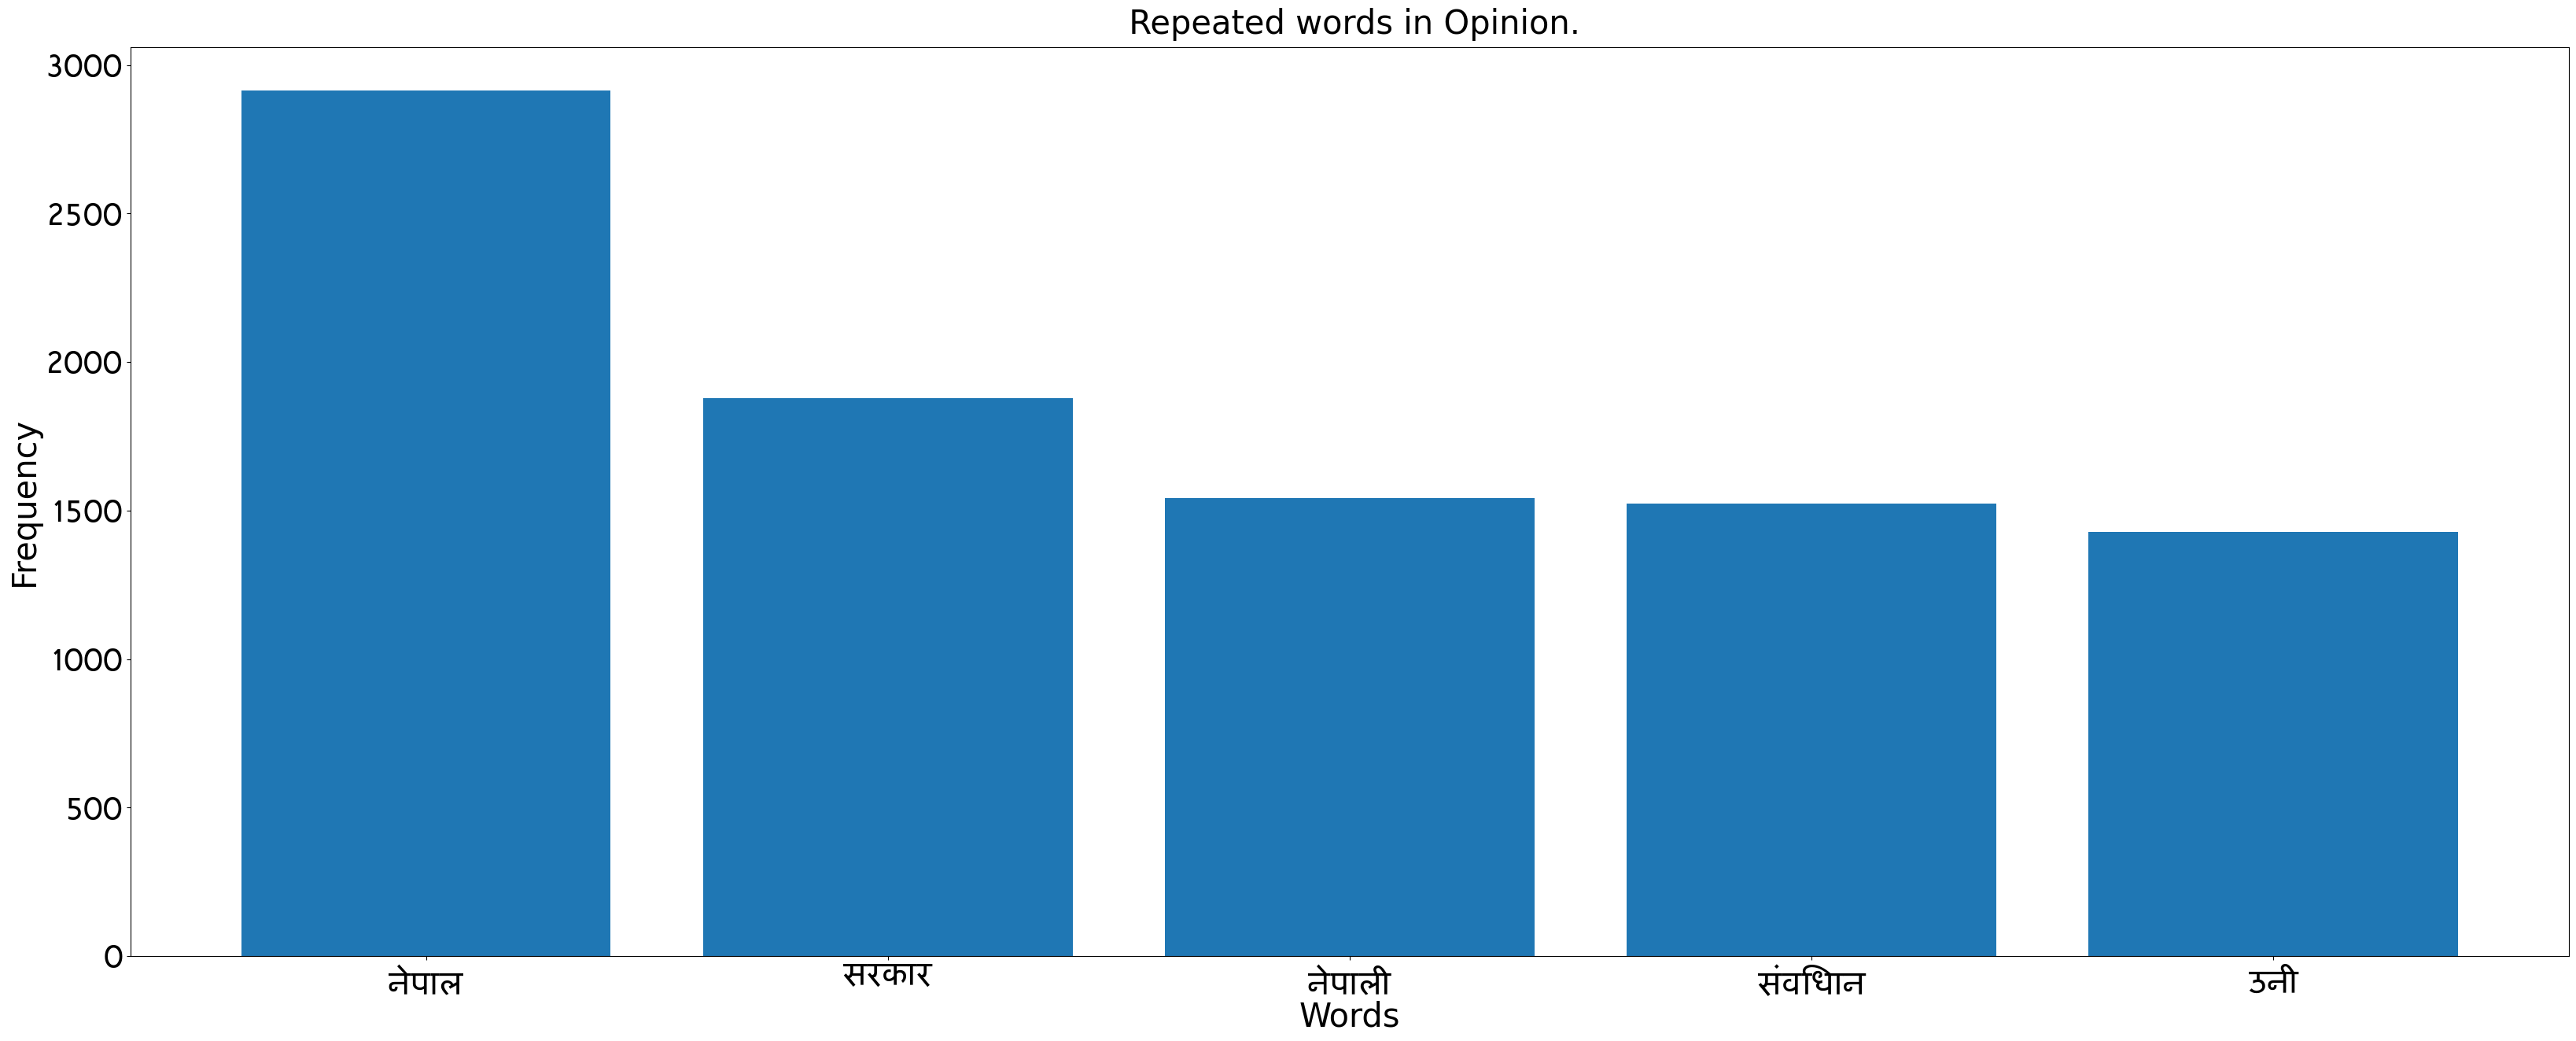

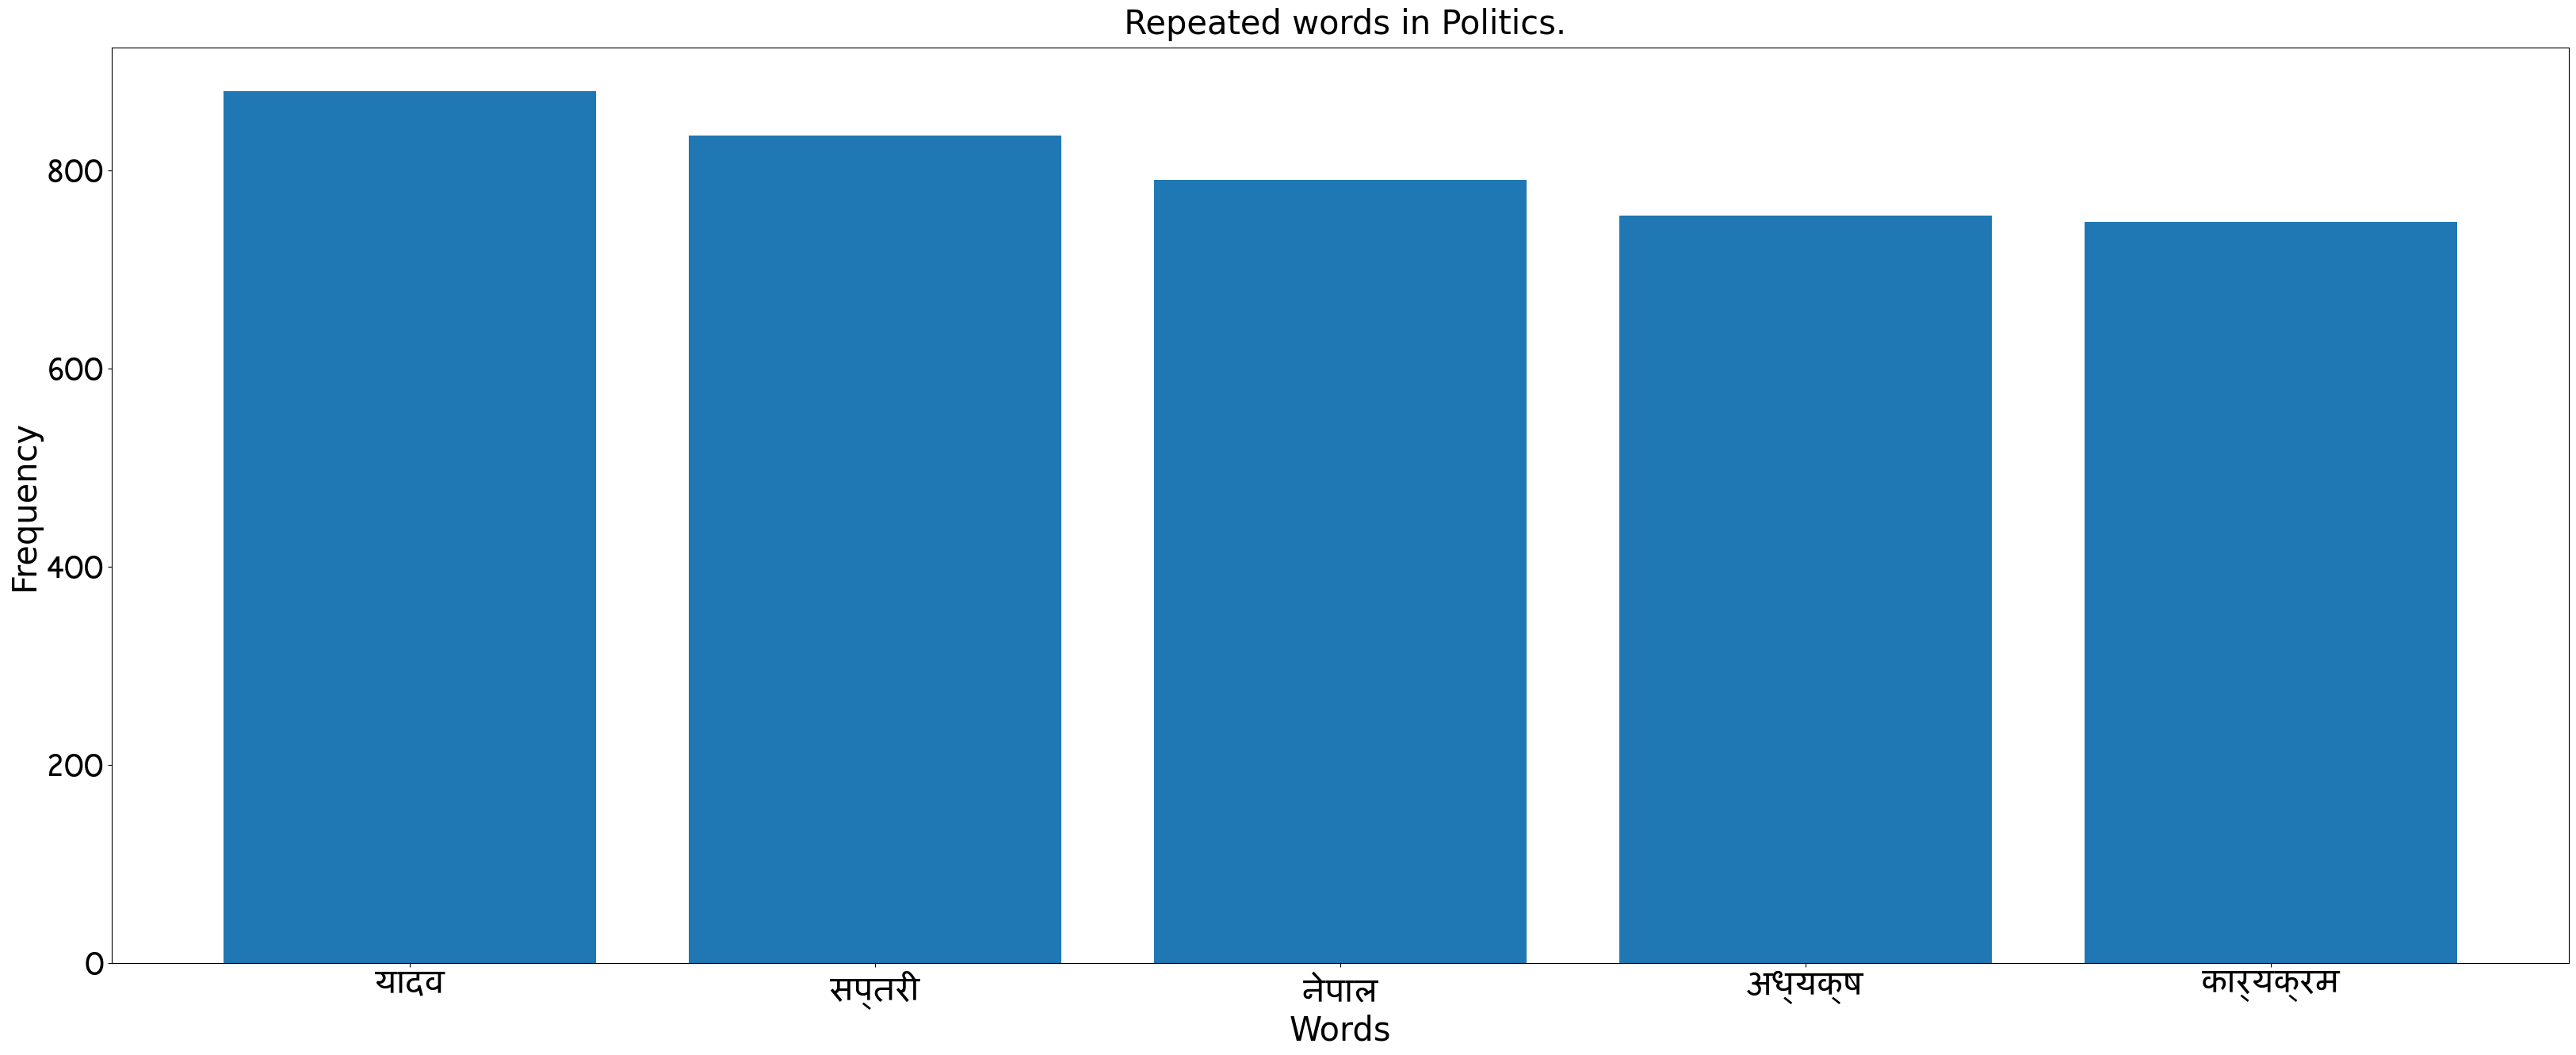

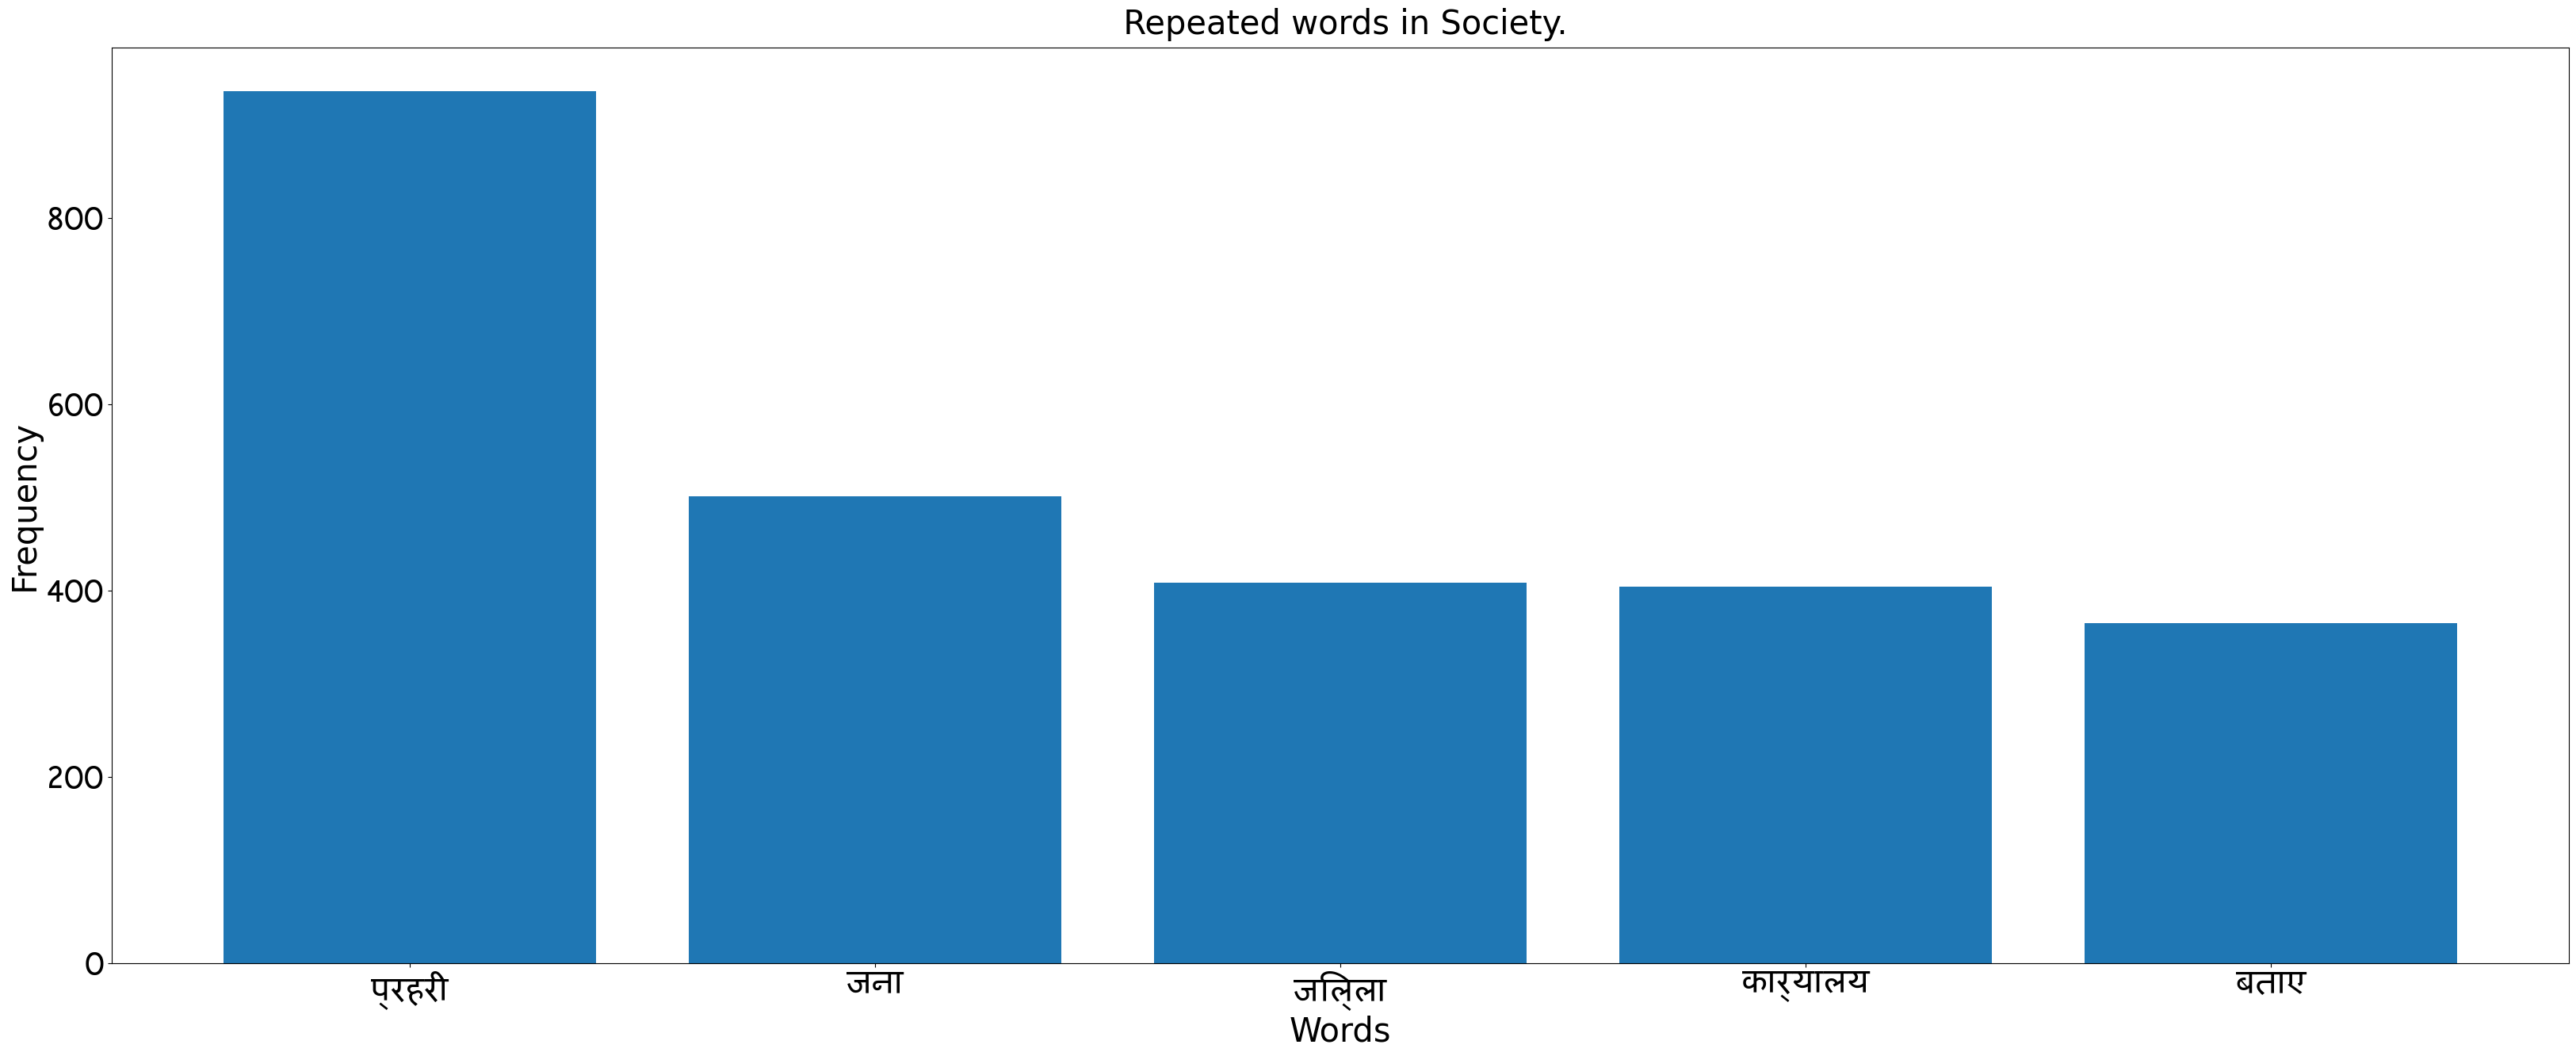

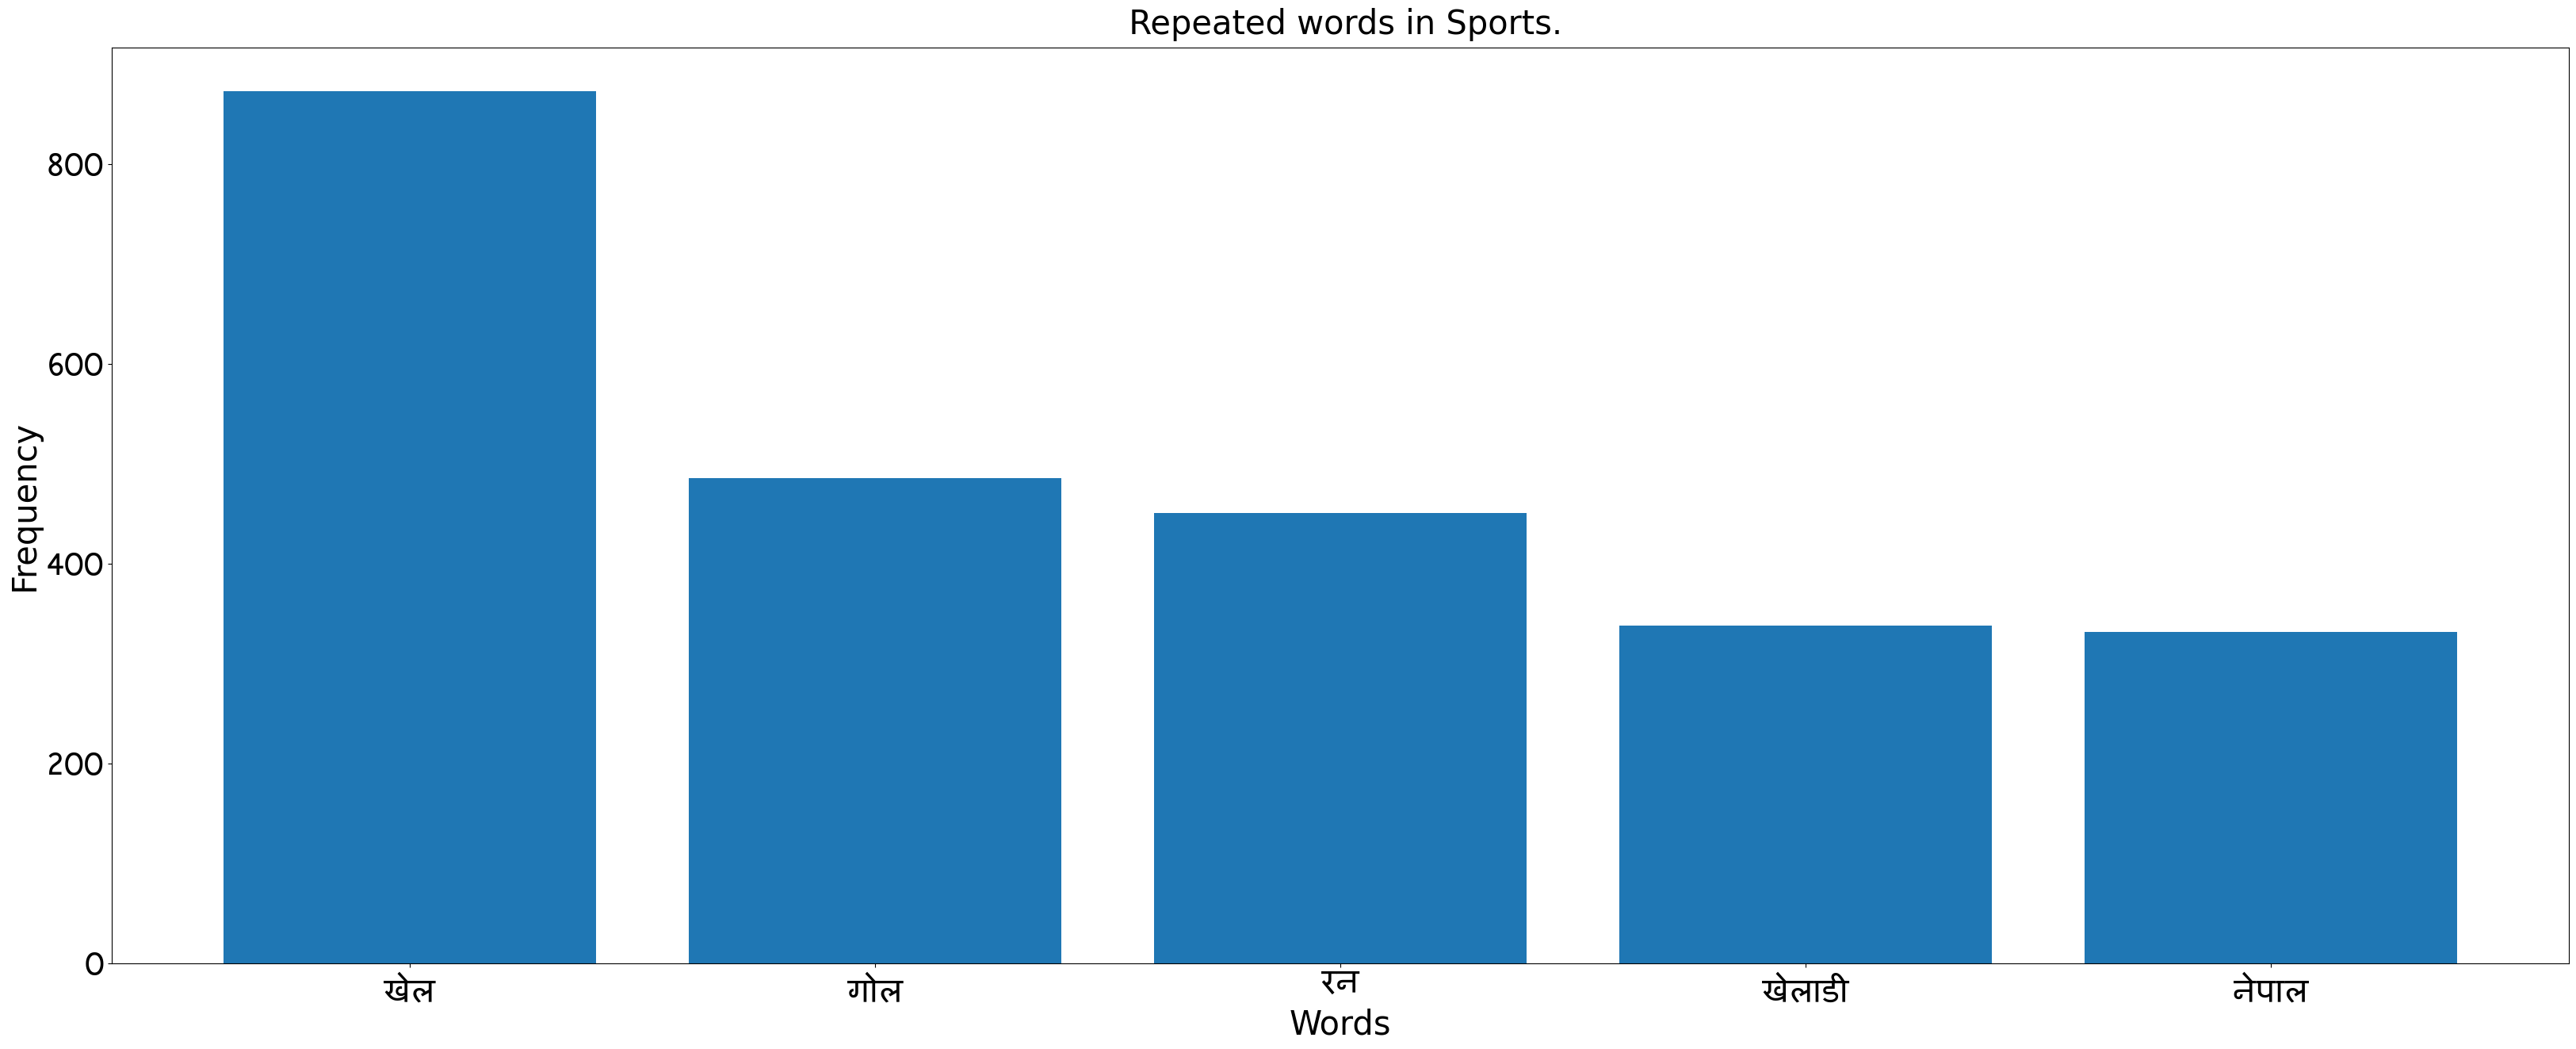

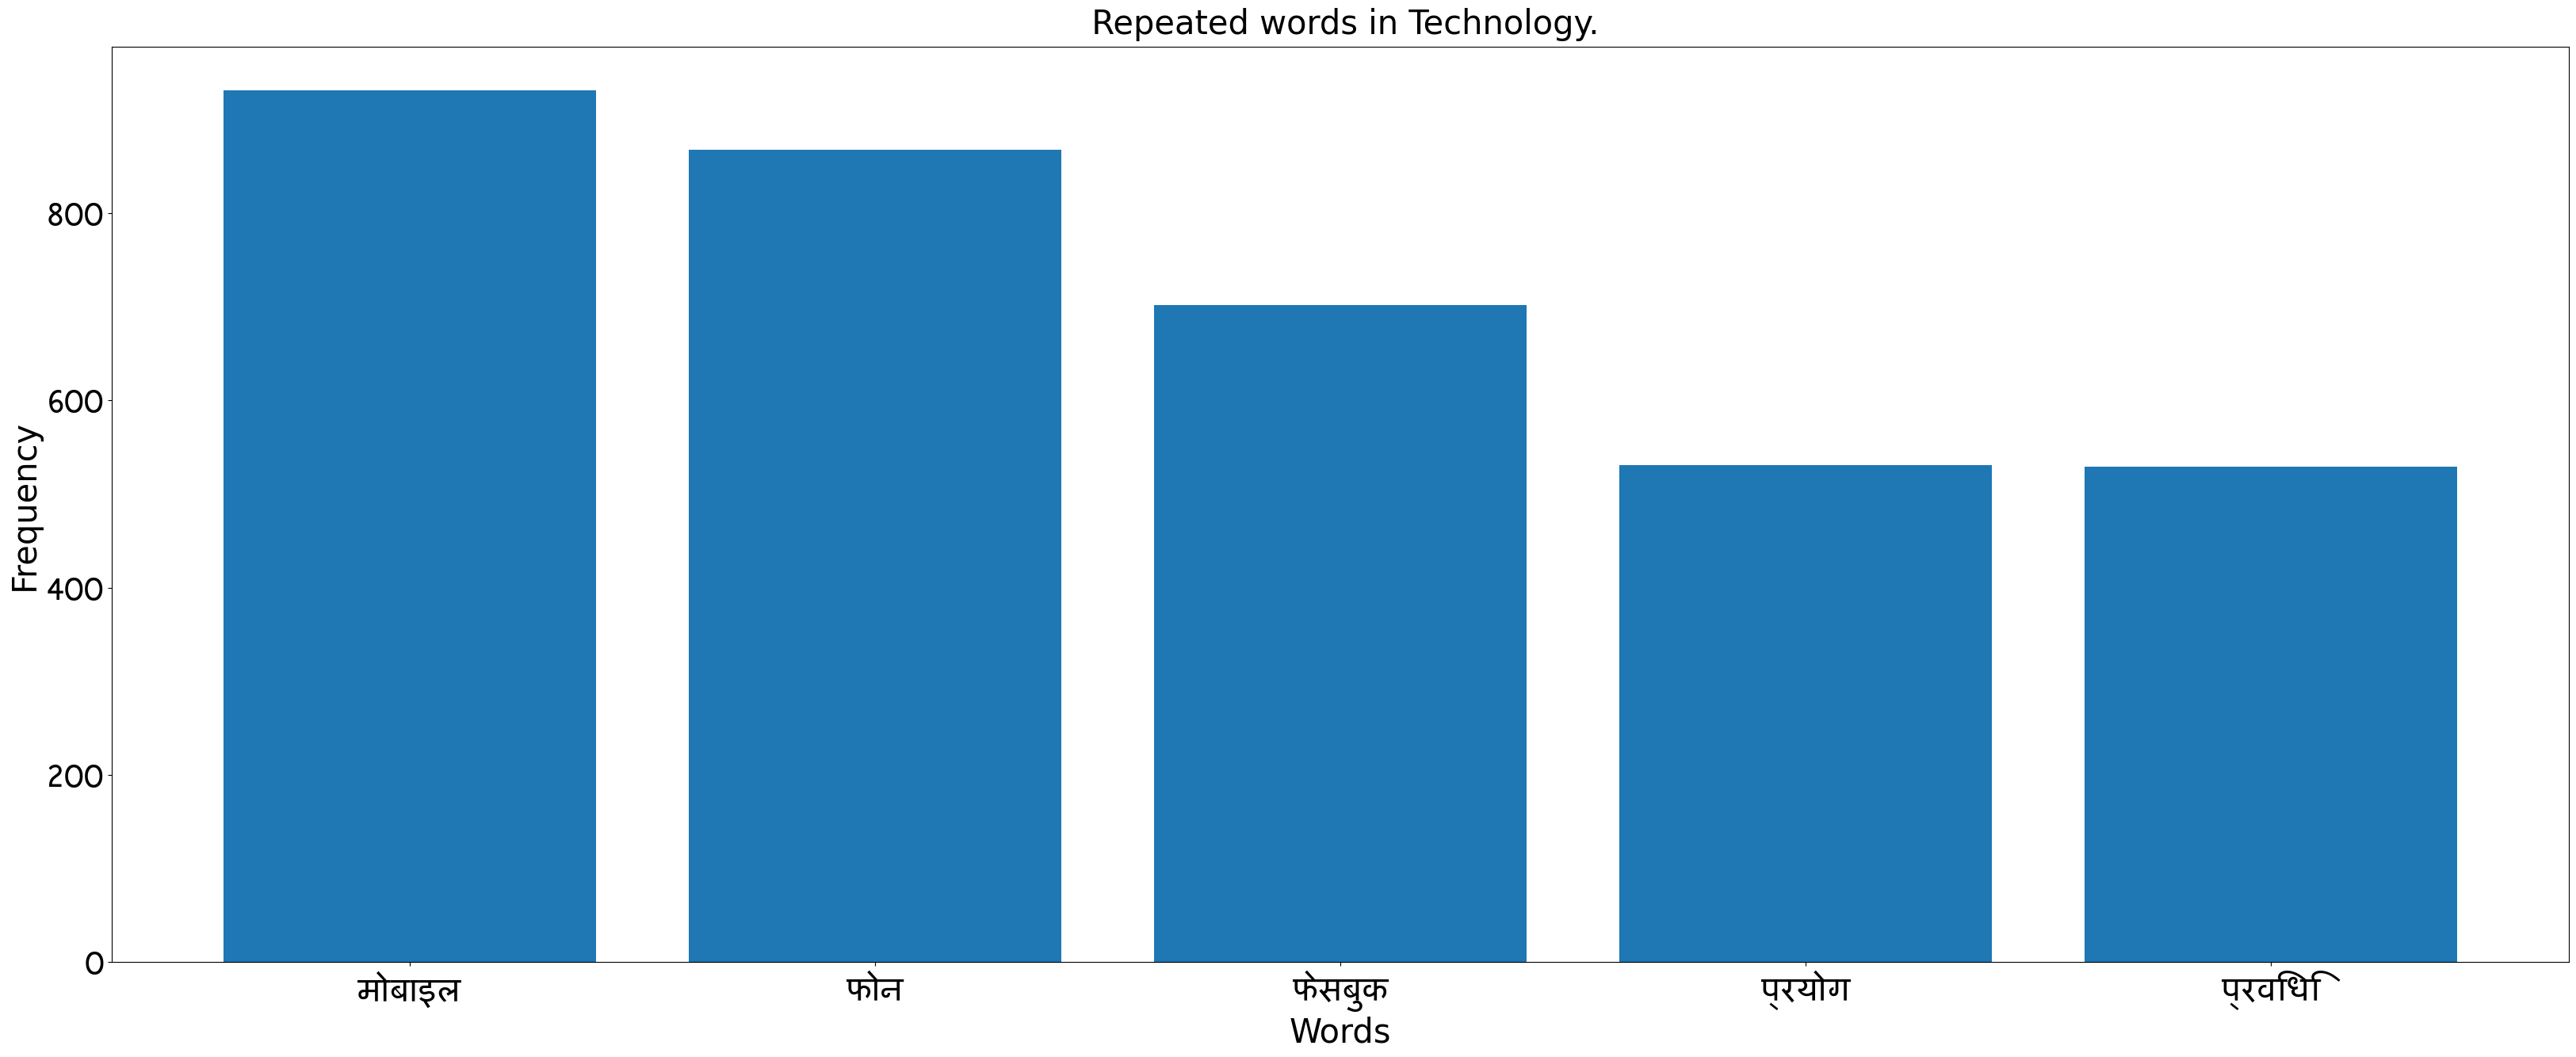

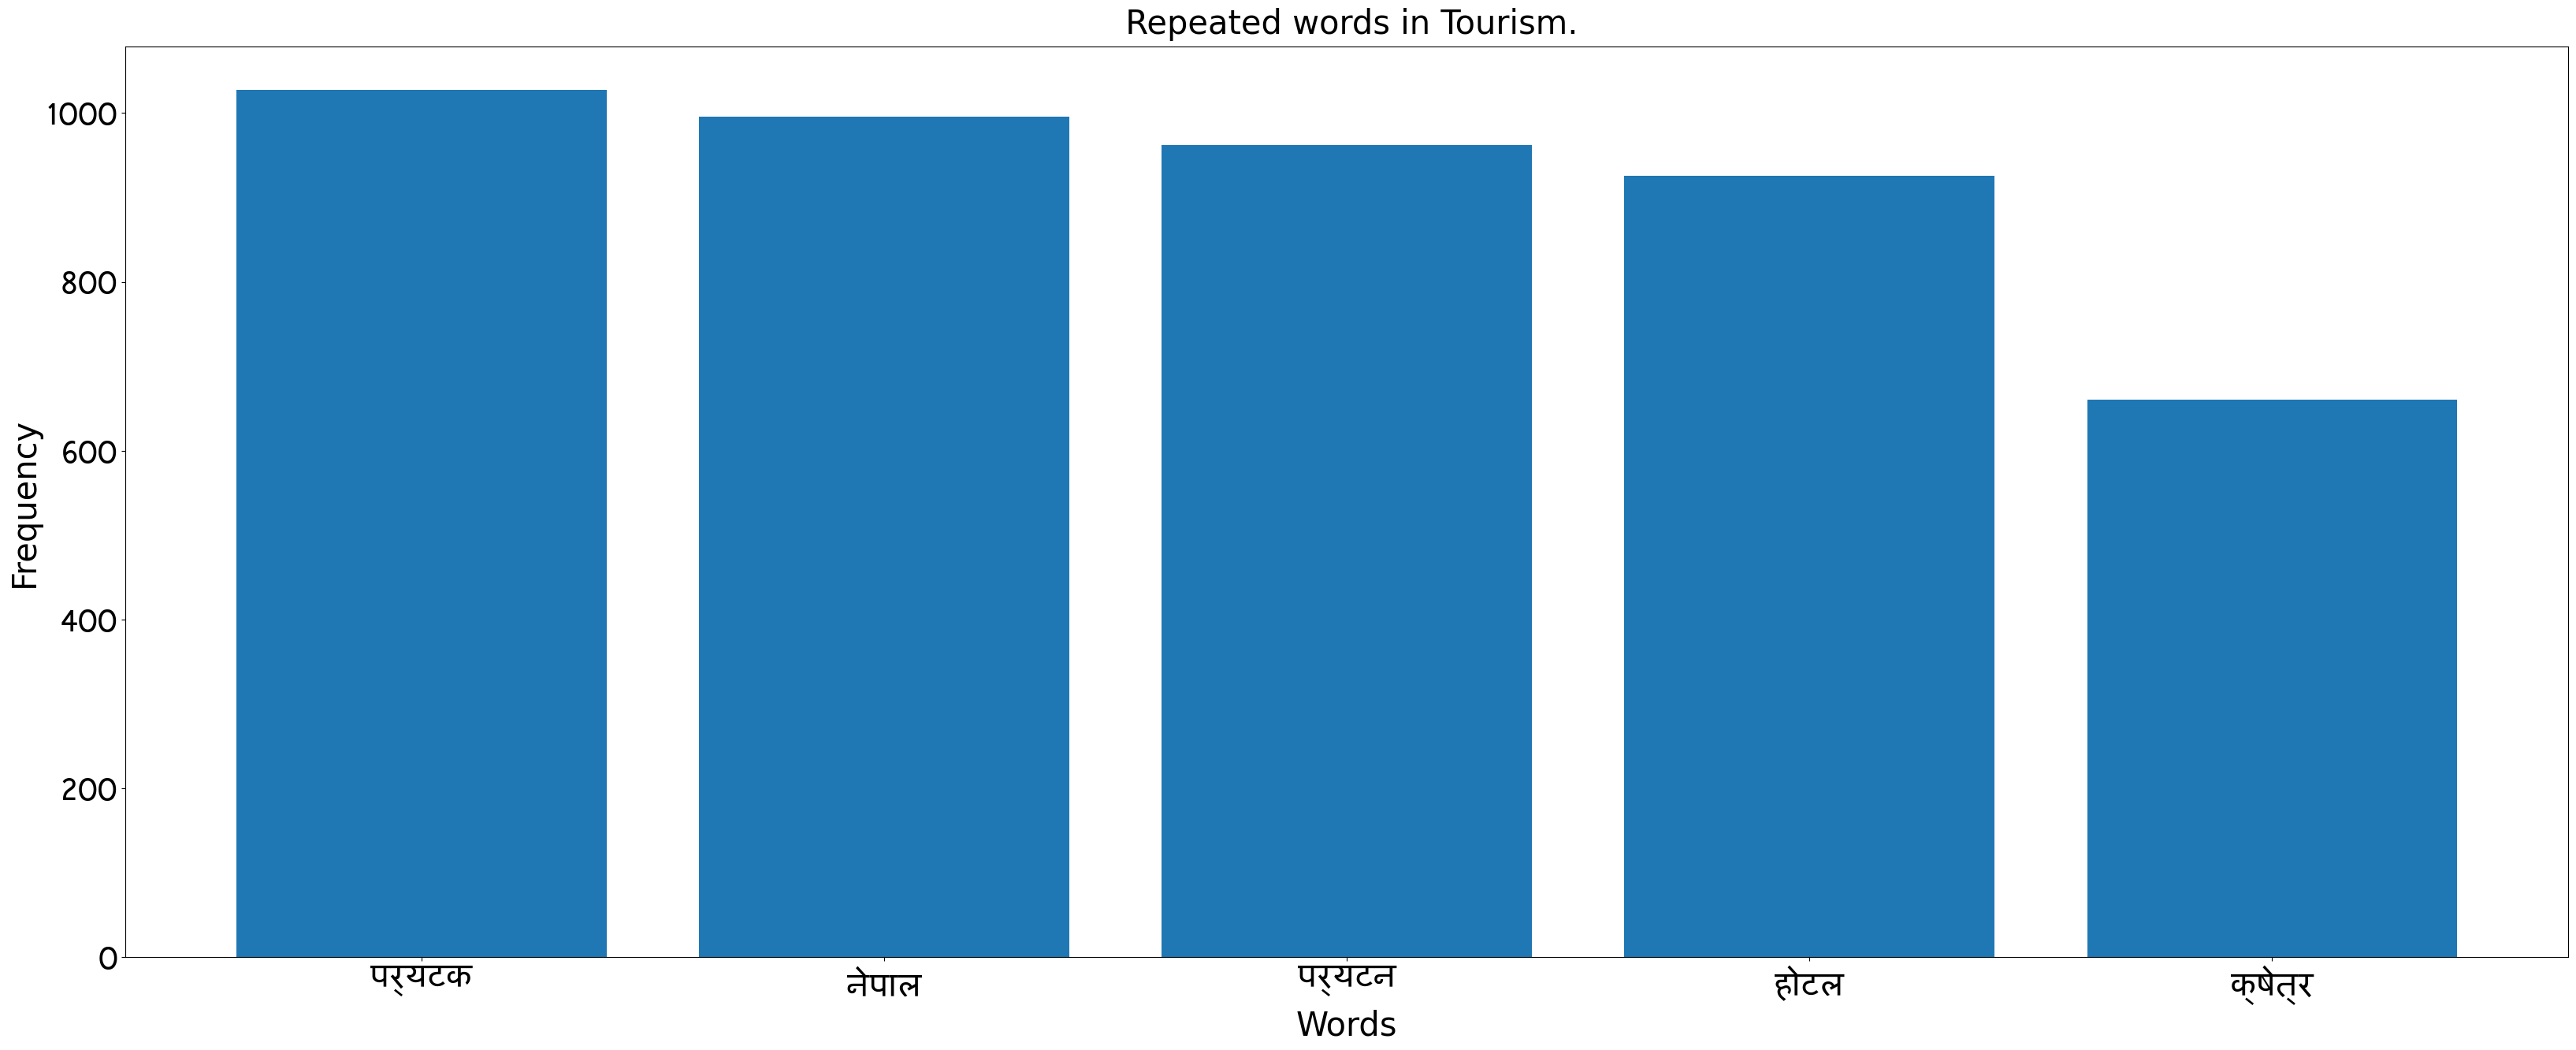

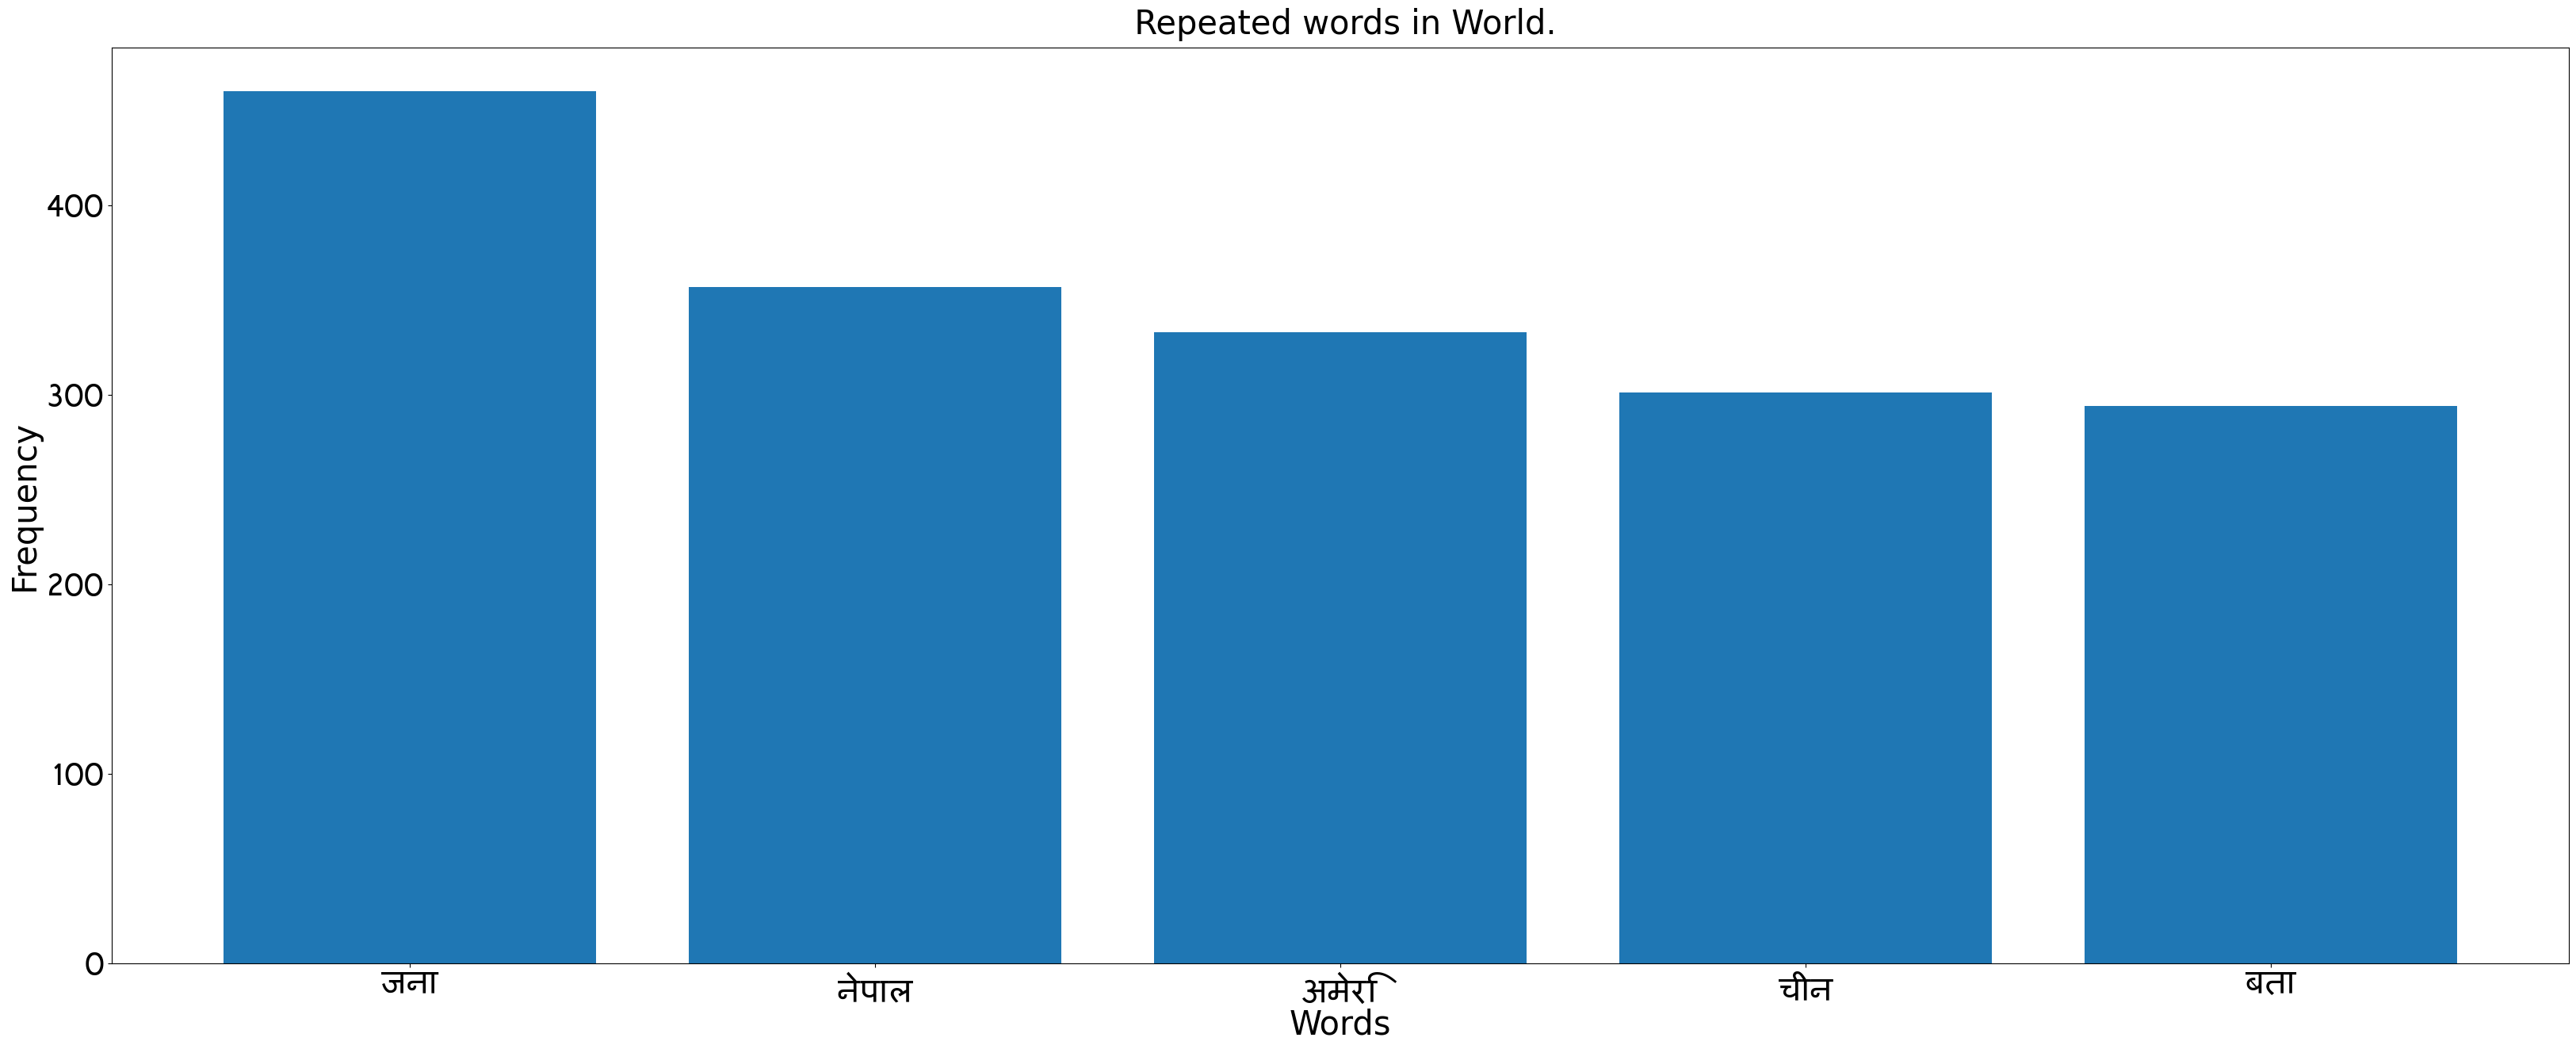

In [67]:
#updated code
from collections import Counter
categories = data.label.unique()
for cat in categories:
  #print(cat)
  tdf = data[data.label==cat]
  cat_content = " ".join(tdf["text"])
  words = cat_content.split()
  #print(words)
  noise = "?,—,।,।,४,३,७,१७,३१,१८,:,२,६६,५०,२०७८/७९,२४,(,७२,(१०,२१,।’,७२,३७२६,२२,(४,९१९,९.३६,(४,९००,०.५,छ,२५,४०,३०,छन्,६५,२७,४९,गर्\u200dयौ,४३७,१३९,प्रथम,८८०,६९६,२०७१,२०७१,२०१५)"
  nwords = []
  for word in words:
    if word not in noise:
      nwords.append(word)
  #print(nwords)
  word_count = [txt.strip() for txt in cat_content.split(" ")]
  word_count = dict(Counter(nwords))
  plot_nepali(word_count,top = 5, fontsize=30, title= f" Repeated words in {cat}.",xlabel="Words",ylabel= "Frequency")

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(data["text"],data["target"],test_size=0.2, random_state=1)



In [52]:
#Using Count Vectorizer

vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=5000).fit(X_train)

X_train_vectorized = vectorizer.transform(X_train)
X_test_vectorized=vectorizer.transform(X_test)

In [53]:
y_train_array=np.array(Y_train)
y_test_array=np.array(Y_test)

In [54]:
X_train_vectorized.shape[0]

8457

In [55]:
len(y_train_array)

8457

In [56]:
X_train_dense = X_train_vectorized.toarray()
X_test_dense = X_test_vectorized.toarray()


In [74]:
#create list of model and accuracy dicts
perform_list_params = [ ]

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



def run_model(model_name, est_c, est_pnlty):

    mdl=''

    if model_name == 'Logistic Regression':

        mdl = LogisticRegression(max_iter=1000)

    elif model_name == 'Random Forest':

        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)

    elif model_name == 'Multinomial Naive Bayes':

        mdl = MultinomialNB(alpha=1.0,fit_prior=True)

    elif model_name == 'Support Vector Classifer':

        mdl = SVC()

    elif model_name == 'Decision Tree Classifier':

        mdl = DecisionTreeClassifier()

    elif model_name == 'K Nearest Neighbour':

        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'cosine' , p = 4)

    elif model_name == 'Gaussian Naive Bayes':

        mdl = GaussianNB()
        
    elif model_name == 'Multinomial Naive Bayes':
        
        mdl = MultinomialNB()

    oneVsRest = OneVsRestClassifier(mdl)

    oneVsRest.fit(X_train_dense
             , y_train_array)

    y_pred = oneVsRest.predict(X_test_dense)

# Performance metrics

    accuracy = round(accuracy_score(y_test_array, y_pred) * 100, 2)

# Get precision, recall, f1 scores

    precision, recall, f1score, support = precision_recall_fscore_support(y_test_array, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')

    print(f'Precision : {precision}')

    print(f'Recall : {recall}')

    print(f'F1-score : {f1score}')
    

 # Print confusion matrix
    cm = confusion_matrix(y_test_array, y_pred) 
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name} using CountVectorizer')
    plt.show()

 



    
# Add performance parameters to list

    perform_list_params.append(dict([

    ('Model', model_name),

    ('Test Accuracy', round(accuracy, 2)),

    ('Precision', round(precision, 2)),

    ('Recall', round(recall, 2)),

    ('F1', round(f1score, 2))

]))

Test Accuracy Score of Basic Support Vector Classifer: % 75.74
Precision : 0.7574468085106383
Recall : 0.7574468085106383
F1-score : 0.7574468085106383


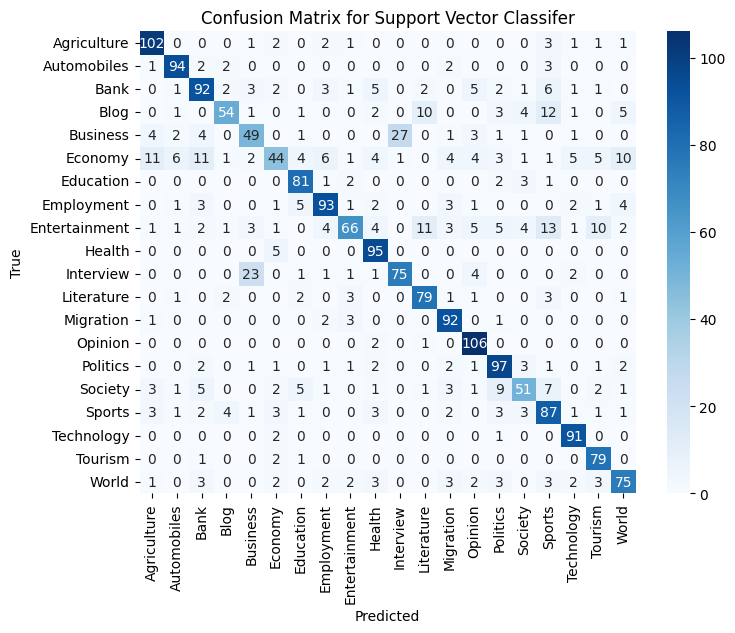

In [28]:
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 70.97
Precision : 0.7096926713947991
Recall : 0.7096926713947991
F1-score : 0.7096926713947991


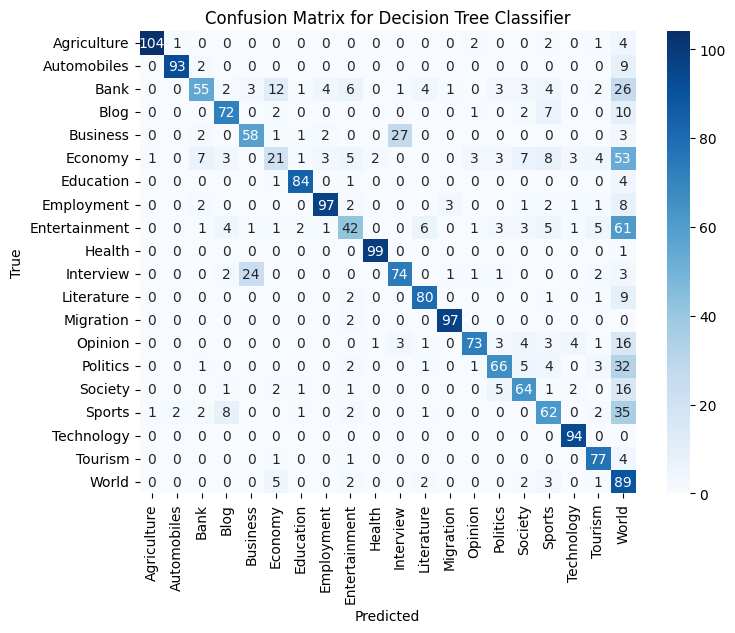

In [29]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic K Nearest Neighbour: % 55.18
Precision : 0.5517730496453901
Recall : 0.5517730496453901
F1-score : 0.5517730496453901


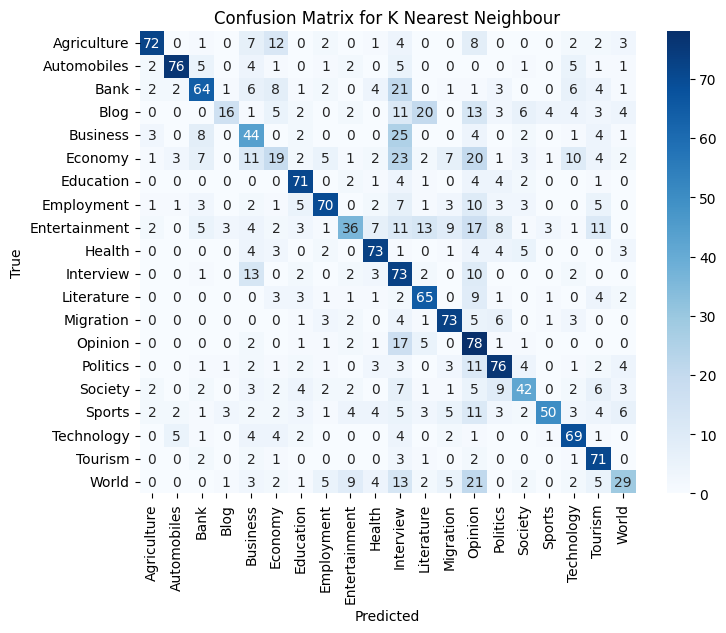

In [30]:
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Gaussian Naive Bayes: % 47.33
Precision : 0.4732860520094563
Recall : 0.4732860520094563
F1-score : 0.4732860520094563


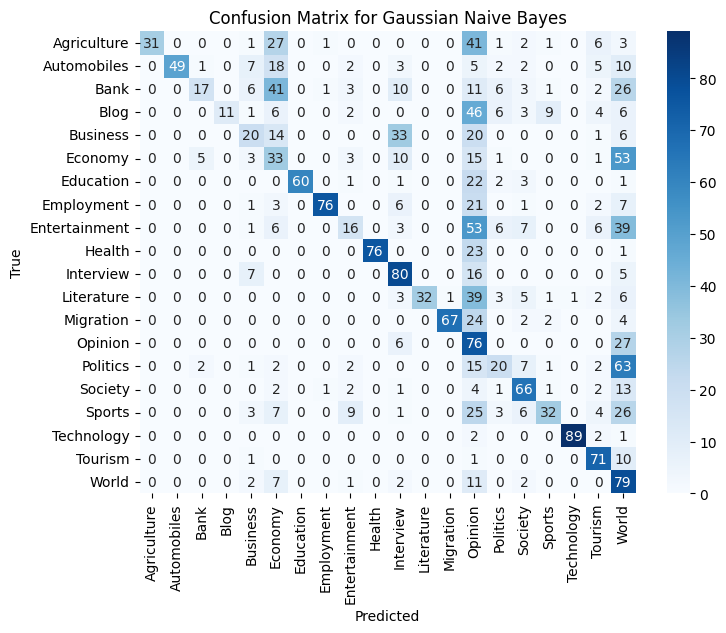

In [31]:
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

C:\Users\koshi\anaconda3\envs\tf-w-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy Score of Basic Logistic Regression: % 81.47
Precision : 0.8146572104018912
Recall : 0.8146572104018912
F1-score : 0.8146572104018912


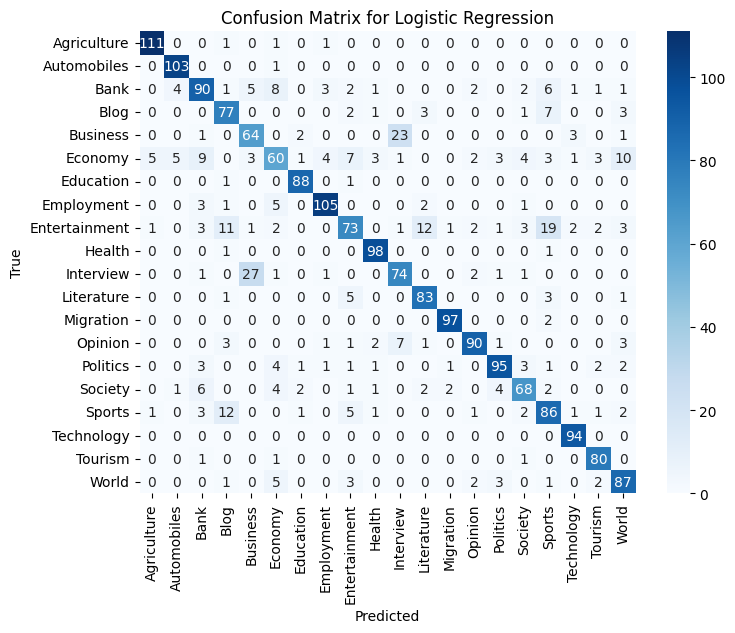

In [32]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest: % 83.22
Precision : 0.8321513002364066
Recall : 0.8321513002364066
F1-score : 0.8321513002364066


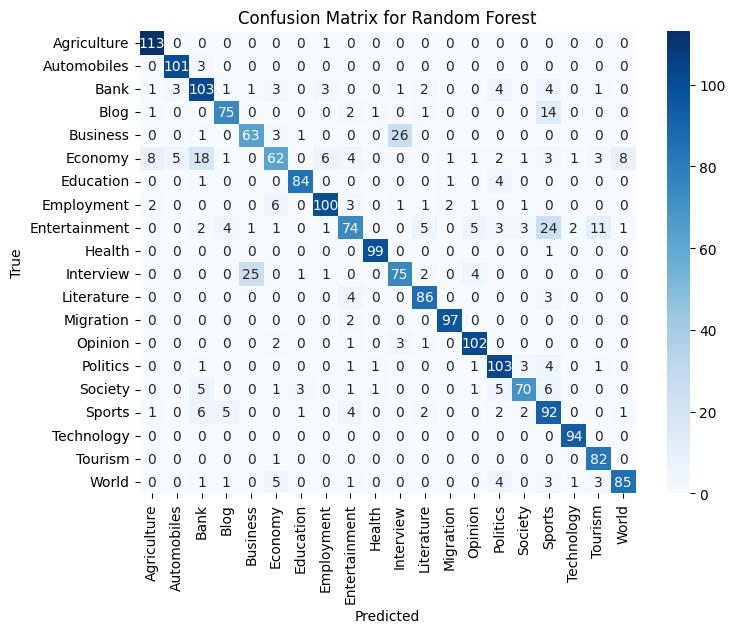

In [33]:
run_model('Random Forest', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multinomial Naive Bayes: % 67.38
Precision : 0.6737588652482269
Recall : 0.6737588652482269
F1-score : 0.6737588652482269


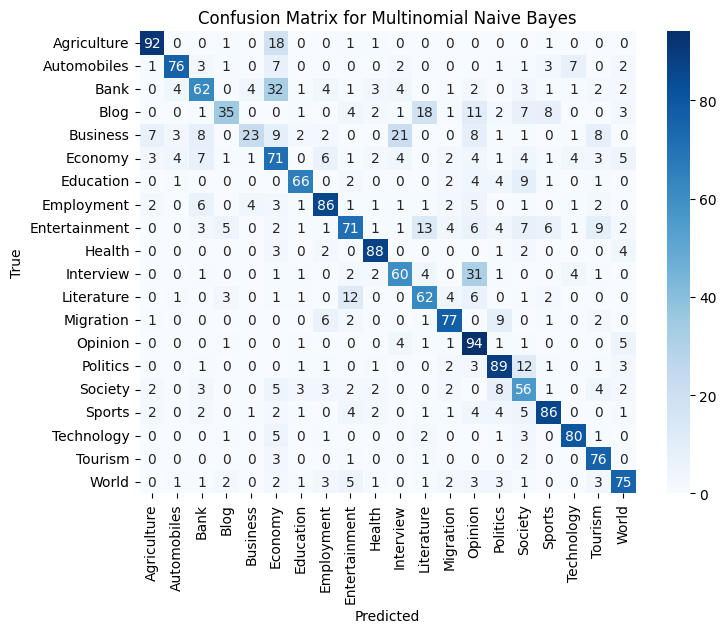

NameError: name 'perform_list_params' is not defined

In [26]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

In [34]:
model_performance_params = pd.DataFrame(data=perform_list_params)
model_performance_params = model_performance_params[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance_params

Model  Test Accuracy  Precision  Recall    F1
0  Support Vector Classifer          75.74       0.76    0.76  0.76
1  Decision Tree Classifier          70.97       0.71    0.71  0.71
2       K Nearest Neighbour          55.18       0.55    0.55  0.55
3      Gaussian Naive Bayes          47.33       0.47    0.47  0.47
4       Logistic Regression          81.47       0.81    0.81  0.81
5             Random Forest          83.22       0.83    0.83  0.83

In [35]:
#Displaying the bargraph for the different models accuracy 

C:\Users\koshi\AppData\Local\Temp\ipykernel_9308\2185284017.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Test Accuracy', data=model_performance_params, palette="viridis",legend=False)


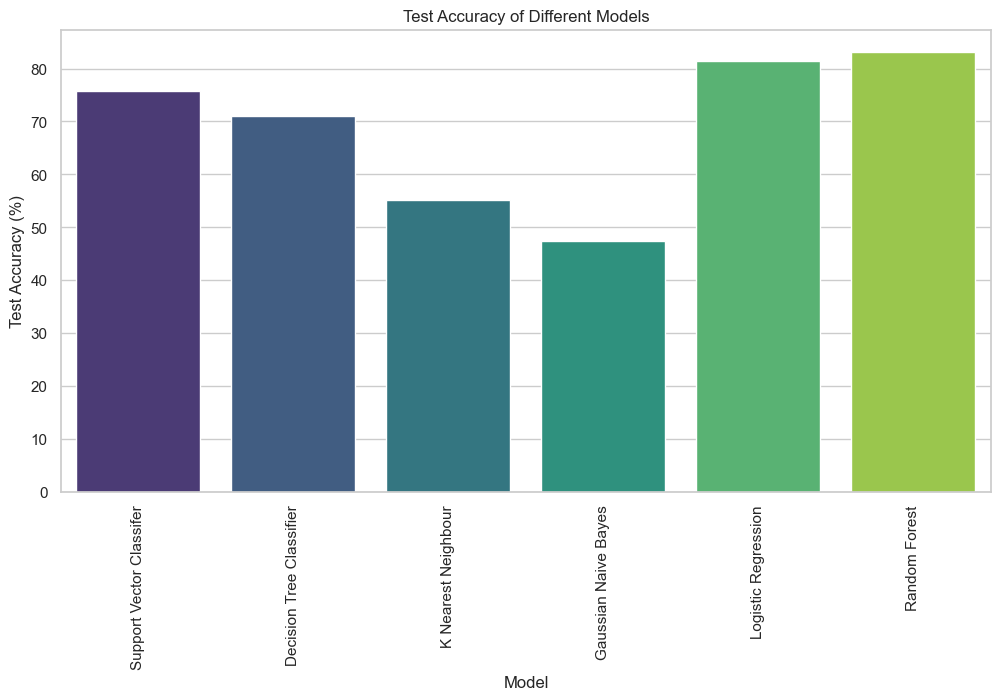

In [36]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Model', y='Test Accuracy', data=model_performance_params, palette="viridis",legend=False)
ax.set_title('Test Accuracy of Different Models')
ax.set_xlabel('Model')
ax.set_ylabel('Test Accuracy (%)')

plt.xticks(rotation=90, ha='center')
# Display the bar graph
plt.show()

In [34]:
#Using TF-IDF Vectorizer on ML algorithms

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

y_train_array=np.array(Y_train)
y_test_array=np.array(Y_test)

X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


performance_list_params_tfidf=[]

def run_model_tfidf(model_name, est_c, est_pnlty):

    mdl=''

    if model_name == 'Logistic Regression':

        mdl = LogisticRegression(max_iter=1000)

    elif model_name == 'Random Forest':

        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)

    elif model_name == 'Multinomial Naive Bayes':

        mdl = MultinomialNB(alpha=1.0,fit_prior=True)

    elif model_name == 'Support Vector Classifier':

        mdl = SVC()

    elif model_name == 'Decision Tree Classifier':

        mdl = DecisionTreeClassifier()

    elif model_name == 'K Nearest Neighbour':

        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'cosine' , p = 4)

    elif model_name == 'Gaussian Naive Bayes':

        mdl = GaussianNB()
        
    elif model_name == 'Multinominal Naive Bayes':
        
        mdl=MultinomialNB()

    oneVsRest = OneVsRestClassifier(mdl)

    oneVsRest.fit(X_train_tfidf_dense
             , y_train_array)

    y_pred = oneVsRest.predict(X_test_tfidf_dense)

# Performance metrics

    accuracy = round(accuracy_score(y_test_array, y_pred) * 100, 2)

# Get precision, recall, f1 scores

    precision, recall, f1score, support = precision_recall_fscore_support(y_test_array, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name} using TFIDF Vectorizer: % {accuracy}')

    print(f'Precision : {precision}')

    print(f'Recall : {recall}')

    print(f'F1-score : {f1score}')
    

 # Print confusion matrix
    cm = confusion_matrix(y_test_array, y_pred) 
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name} using TFIDF Vectorizer')
    plt.show()

 



    
# Add performance parameters to list

    performance_list_params_tfidf.append(dict([

    ('Model', model_name),

    ('Test Accuracy', round(accuracy, 2)),

    ('Precision', round(precision, 2)),

    ('Recall', round(recall, 2)),

    ('F1', round(f1score, 2))

]))

Test Accuracy Score of Basic Support Vector Classifier using TFIDF Vectorizer: % 83.83
Precision : 0.8382978723404255
Recall : 0.8382978723404255
F1-score : 0.8382978723404255


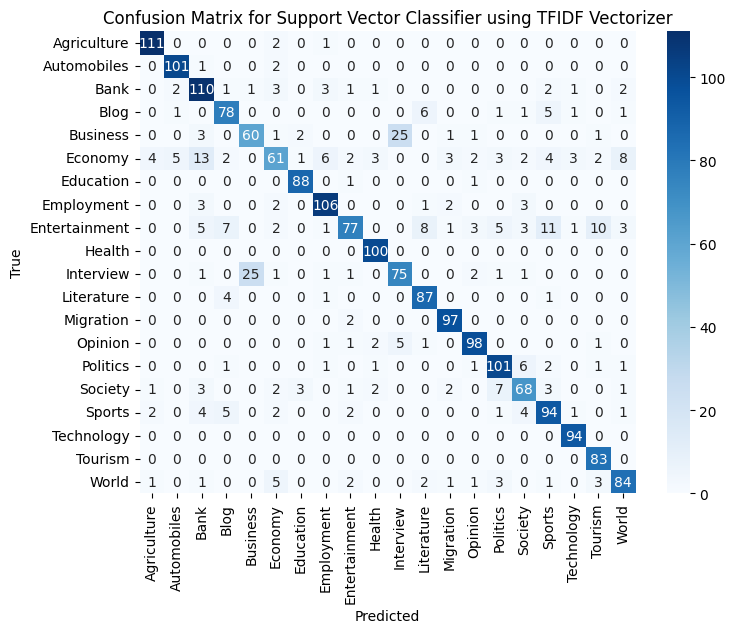

In [39]:
run_model_tfidf('Support Vector Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier using TFIDF Vectorizer: % 72.25
Precision : 0.7224586288416076
Recall : 0.7224586288416076
F1-score : 0.7224586288416076


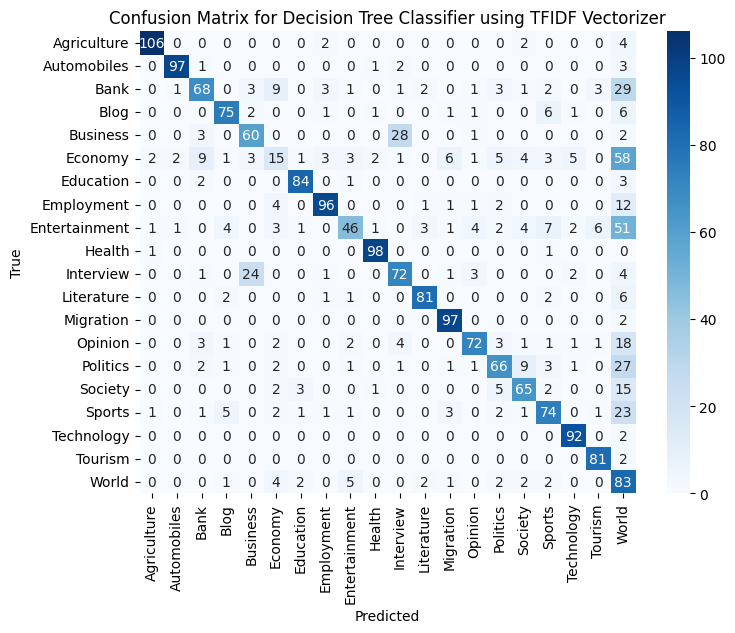

In [40]:
run_model_tfidf('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic K Nearest Neighbour using TFIDF Vectorizer: % 59.01
Precision : 0.5900709219858156
Recall : 0.5900709219858156
F1-score : 0.5900709219858156


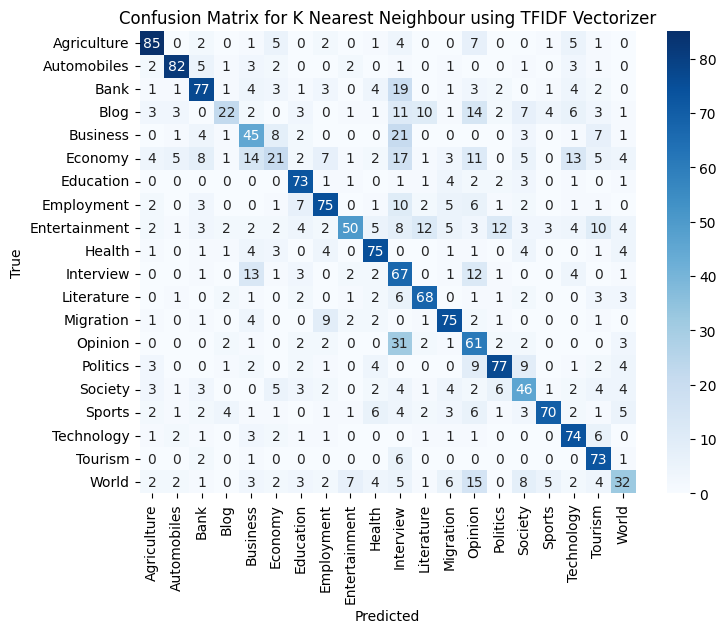

In [41]:
run_model_tfidf('K Nearest Neighbour', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Gaussian Naive Bayes using TFIDF Vectorizer: % 47.19
Precision : 0.4718676122931442
Recall : 0.4718676122931442
F1-score : 0.4718676122931443


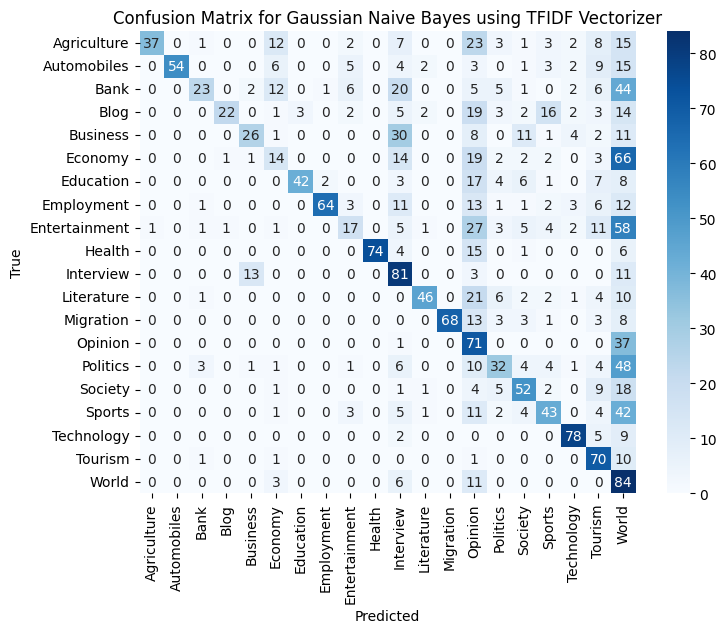

In [42]:
run_model_tfidf('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Logistic Regression using TFIDF Vectorizer: % 74.75
Precision : 0.7475177304964539
Recall : 0.7475177304964539
F1-score : 0.7475177304964539


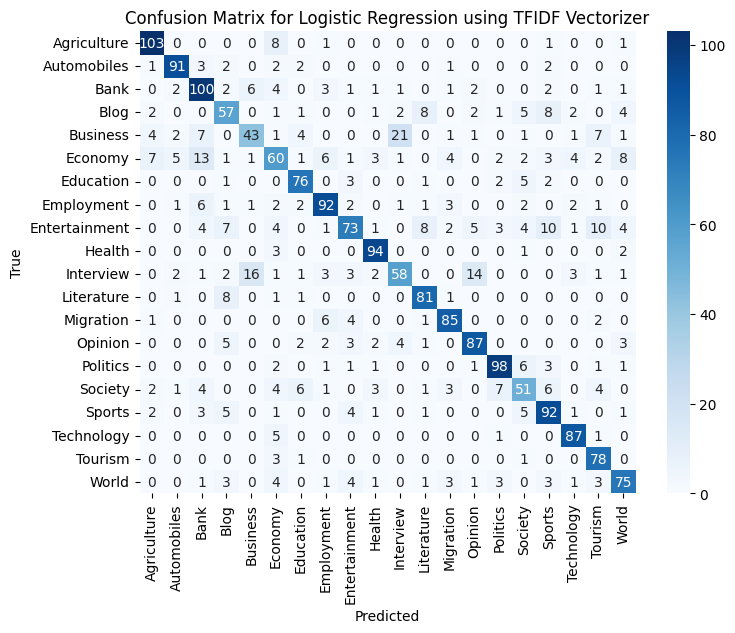

In [43]:
run_model_tfidf('Logistic Regression', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest using TFIDF Vectorizer: % 83.59
Precision : 0.8359338061465721
Recall : 0.8359338061465721
F1-score : 0.8359338061465721


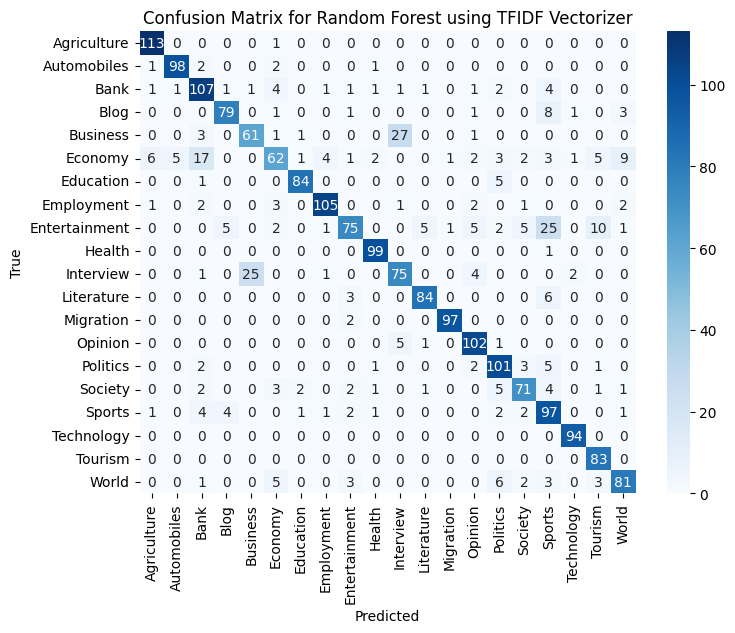

In [44]:
run_model_tfidf('Random Forest', est_c=None, est_pnlty=None)

In [45]:
model_performance_params_tfidf = pd.DataFrame(data=performance_list_params_tfidf)
model_performance_params_tfidf = model_performance_params_tfidf[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance_params_tfidf

Model  Test Accuracy  Precision  Recall    F1
0  Support Vector Classifier          83.83       0.84    0.84  0.84
1   Decision Tree Classifier          72.25       0.72    0.72  0.72
2        K Nearest Neighbour          59.01       0.59    0.59  0.59
3       Gaussian Naive Bayes          47.19       0.47    0.47  0.47
4        Logistic Regression          74.75       0.75    0.75  0.75
5              Random Forest          83.59       0.84    0.84  0.84

C:\Users\koshi\AppData\Local\Temp\ipykernel_21328\1881227385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Test Accuracy', data=model_performance_params_tfidf, palette="viridis",legend=False)


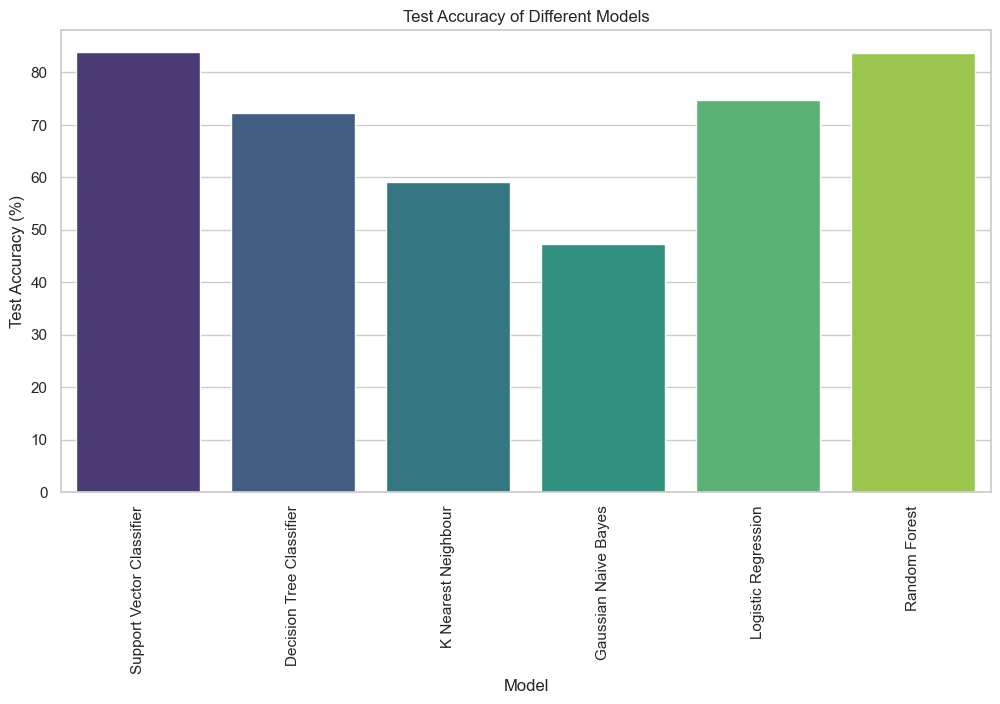

In [46]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Model', y='Test Accuracy', data=model_performance_params_tfidf, palette="viridis",legend=False)
ax.set_title('Test Accuracy of Different Models')
ax.set_xlabel('Model')
ax.set_ylabel('Test Accuracy (%)')

plt.xticks(rotation=90, ha='center')
# Display the bar graph
plt.show()

In [47]:
#Defining the neural network

In [33]:
import torch
import torch.nn as nn

# Define a simple neural network model (feed forward neural network model)
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu1 = nn.ReLU()
        self.dropout = nn.Dropout(0.5)  # Adjust dropout rate as needed
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.Softmax(dim=1)  # Softmax added here

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu1(x)  # Applying ReLU after the second hidden layer
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x


In [49]:
#USING COUNTVECTORIZER AND NEURAL NETWORK

In [57]:
import torch
# Convert countvectorizer matrices to PyTorch tensors
X_train_tensor_countv = torch.FloatTensor(X_train_dense)
X_test_tensor_countv = torch.FloatTensor(X_test_dense)

y_train_tensor = torch.LongTensor(y_train_array)
y_test_tensor = torch.LongTensor(y_test_array)

In [58]:
# Define hyperparameters
input_dim = X_train_tensor_countv.size(1)
hidden_dim = 128
output_dim = 20  # Number of classes

In [34]:
nnmodel = NeuralNetwork(input_dim, hidden_dim, output_dim)

In [60]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(nnmodel.parameters(), lr=0.001)

In [62]:
# Training loop
from sklearn.metrics import accuracy_score
epochs = 1000
for epoch in range(epochs):
    nnmodel.train()
    optimizer.zero_grad()
    outputs = nnmodel(X_train_tensor_countv)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if epoch%50==0:
        with torch.no_grad():
            train_ac = accuracy_score(torch.argmax(outputs, dim=1).numpy(),y_train_tensor)
            outputss = nnmodel(X_test_tensor_countv)
            predicted_labels = torch.argmax(outputss, dim=1).numpy() 
            test_ac = accuracy_score(y_test_tensor, predicted_labels)
            print(loss, f"Train Accuracy: {train_ac:.2f}, Test Accuracy: {test_ac:.2f}")
        

tensor(2.1070, grad_fn=<NllLossBackward0>) Train Accuracy: 0.97, Test Accuracy: 0.81
tensor(2.1064, grad_fn=<NllLossBackward0>) Train Accuracy: 0.97, Test Accuracy: 0.80
tensor(2.1073, grad_fn=<NllLossBackward0>) Train Accuracy: 0.97, Test Accuracy: 0.81
tensor(2.1061, grad_fn=<NllLossBackward0>) Train Accuracy: 0.97, Test Accuracy: 0.80
tensor(2.1059, grad_fn=<NllLossBackward0>) Train Accuracy: 0.97, Test Accuracy: 0.80
tensor(2.1057, grad_fn=<NllLossBackward0>) Train Accuracy: 0.97, Test Accuracy: 0.80
tensor(2.1055, grad_fn=<NllLossBackward0>) Train Accuracy: 0.97, Test Accuracy: 0.81
tensor(2.1049, grad_fn=<NllLossBackward0>) Train Accuracy: 0.97, Test Accuracy: 0.80
tensor(2.1041, grad_fn=<NllLossBackward0>) Train Accuracy: 0.97, Test Accuracy: 0.80
tensor(2.1049, grad_fn=<NllLossBackward0>) Train Accuracy: 0.97, Test Accuracy: 0.81
tensor(2.1046, grad_fn=<NllLossBackward0>) Train Accuracy: 0.97, Test Accuracy: 0.80
tensor(2.1041, grad_fn=<NllLossBackward0>) Train Accuracy: 0.97, 

In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
PRECISION_SCORE = precision_score(Y_test, predicted_labels, average='weighted')
RECALL_SCORE = recall_score(Y_test, predicted_labels, average='weighted')
F1_SCORE = f1_score(Y_test, predicted_labels, average='weighted')
print("Evaluation metrics for Neural Network using CountVectorizer")
print("Accuracy :",test_ac)
print("Precision_score :" ,PRECISION_SCORE)
print("Recall_score :" ,RECALL_SCORE)
print("F1_score :" ,F1_SCORE)

Evaluation metrics for Neural Network using CountVectorizer
Accuracy : 0.8023640661938535
Precision_score : 0.7974450326455572
Recall_score : 0.8023640661938535
F1_score : 0.796610779909513


In [69]:
cmnncountvectorizer=confusion_matrix(Y_test, predicted_labels)


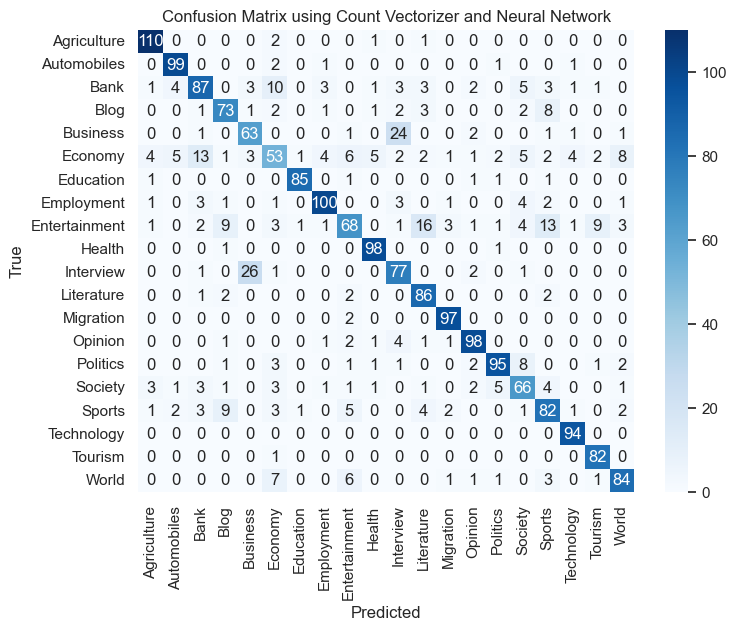

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.heatmap(cmnncountvectorizer, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix using Count Vectorizer and Neural Network')
plt.show()


In [71]:
#Defining LSTM Model

In [97]:
import torch
import torch.nn as nn

# Define a LSTM 
class LSTMNeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LSTMNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu1 = nn.ReLU()
        self.dropout = nn.Dropout(0.5)  # Adjust dropout rate as needed
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu1(x)  
        x = self.fc3(x)
        return x


In [98]:
LSTMnnmodel = LSTMNeuralNetwork(input_dim, hidden_dim, output_dim)

In [99]:
#using LSTM NN MODEL and countvectorizer

In [100]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(LSTMnnmodel.parameters(), lr=0.001)

In [101]:
# Training loop for LSTM using countvectorizer
from sklearn.metrics import accuracy_score
epochs = 1000
for epoch in range(epochs):
    LSTMnnmodel.train()
    optimizer.zero_grad()
    outputs = LSTMnnmodel(X_train_tensor_countv)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if epoch%50==0:
        with torch.no_grad():
            train_ac = accuracy_score(torch.argmax(outputs, dim=1).numpy(),y_train_tensor)
            outputss = LSTMnnmodel(X_test_tensor_countv)
            predicted_labels = torch.argmax(outputss, dim=1).numpy() 
            test_ac = accuracy_score(y_test_tensor, predicted_labels)
            print(loss, f"Train Accuracy: {train_ac:.2f}, Test Accuracy: {test_ac:.2f}")
        

tensor(2.9918, grad_fn=<NllLossBackward0>) Train Accuracy: 0.05, Test Accuracy: 0.08
tensor(0.6963, grad_fn=<NllLossBackward0>) Train Accuracy: 0.85, Test Accuracy: 0.74
tensor(0.1831, grad_fn=<NllLossBackward0>) Train Accuracy: 0.96, Test Accuracy: 0.81
tensor(0.0888, grad_fn=<NllLossBackward0>) Train Accuracy: 0.98, Test Accuracy: 0.81
tensor(0.0645, grad_fn=<NllLossBackward0>) Train Accuracy: 0.98, Test Accuracy: 0.82
tensor(0.0539, grad_fn=<NllLossBackward0>) Train Accuracy: 0.98, Test Accuracy: 0.81
tensor(0.0486, grad_fn=<NllLossBackward0>) Train Accuracy: 0.98, Test Accuracy: 0.82
tensor(0.0451, grad_fn=<NllLossBackward0>) Train Accuracy: 0.98, Test Accuracy: 0.82
tensor(0.0429, grad_fn=<NllLossBackward0>) Train Accuracy: 0.98, Test Accuracy: 0.81
tensor(0.0400, grad_fn=<NllLossBackward0>) Train Accuracy: 0.98, Test Accuracy: 0.81
tensor(0.0397, grad_fn=<NllLossBackward0>) Train Accuracy: 0.98, Test Accuracy: 0.82
tensor(0.0390, grad_fn=<NllLossBackward0>) Train Accuracy: 0.98, 

In [ ]:
#USING TFIDF AND NEURAL NETWORK

In [72]:
# Convert TF-IDF matrices to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_tfidf.toarray())
X_test_tensor = torch.FloatTensor(X_test_tfidf.toarray())

y_train_tensor = torch.LongTensor(y_train_array)
y_test_tensor = torch.LongTensor(y_test_array)

In [73]:
# Define hyperparameters
input_dim = X_train_tensor.size(1)
hidden_dim = 256
output_dim = 20  # Number of classes

In [74]:
# Training loop
from sklearn.metrics import accuracy_score
epochs = 1000
for epoch in range(epochs):
    nnmodel.train()
    optimizer.zero_grad()
    outputs = nnmodel(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if epoch%50==0:
        with torch.no_grad():
            train_acc = accuracy_score(torch.argmax(outputs, dim=1).numpy(),y_train_tensor)
            outputss = nnmodel(X_test_tensor)
            predicted_labels_tfidf = torch.argmax(outputss, dim=1).numpy() 
            test_acc = accuracy_score(y_test_tensor, predicted_labels)
            print(loss, f"Train Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")
        

tensor(3.0245, grad_fn=<NllLossBackward0>) Train Accuracy: 0.05, Test Accuracy: 0.80
tensor(2.4726, grad_fn=<NllLossBackward0>) Train Accuracy: 0.64, Test Accuracy: 0.80
tensor(2.2850, grad_fn=<NllLossBackward0>) Train Accuracy: 0.81, Test Accuracy: 0.80
tensor(2.2252, grad_fn=<NllLossBackward0>) Train Accuracy: 0.87, Test Accuracy: 0.80
tensor(2.1967, grad_fn=<NllLossBackward0>) Train Accuracy: 0.89, Test Accuracy: 0.80
tensor(2.1815, grad_fn=<NllLossBackward0>) Train Accuracy: 0.91, Test Accuracy: 0.80
tensor(2.1692, grad_fn=<NllLossBackward0>) Train Accuracy: 0.92, Test Accuracy: 0.80
tensor(2.1611, grad_fn=<NllLossBackward0>) Train Accuracy: 0.92, Test Accuracy: 0.80
tensor(2.1533, grad_fn=<NllLossBackward0>) Train Accuracy: 0.93, Test Accuracy: 0.80
tensor(2.1503, grad_fn=<NllLossBackward0>) Train Accuracy: 0.93, Test Accuracy: 0.80
tensor(2.1454, grad_fn=<NllLossBackward0>) Train Accuracy: 0.94, Test Accuracy: 0.80
tensor(2.1431, grad_fn=<NllLossBackward0>) Train Accuracy: 0.94, 

In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
PRECISION_SCORE = precision_score(Y_test, predicted_labels_tfidf, average='weighted')
RECALL_SCORE = recall_score(Y_test, predicted_labels_tfidf, average='weighted')
F1_SCORE = f1_score(Y_test, predicted_labels_tfidf, average='weighted')
print("Evaluation metrics for Neural Network using TF-IDF")
print("Accuracy :",test_acc)
print("Precision_score :" ,PRECISION_SCORE)
print("Recall_score :" ,RECALL_SCORE)
print("F1_score :" ,F1_SCORE)

Evaluation metrics for Neural Network using TF-IDF
Accuracy : 0.8023640661938535
Precision_score : 0.7763405058068117
Recall_score : 0.7815602836879433
F1_score : 0.7751549724504179


In [76]:
cmnntfidf=confusion_matrix(Y_test, predicted_labels_tfidf)


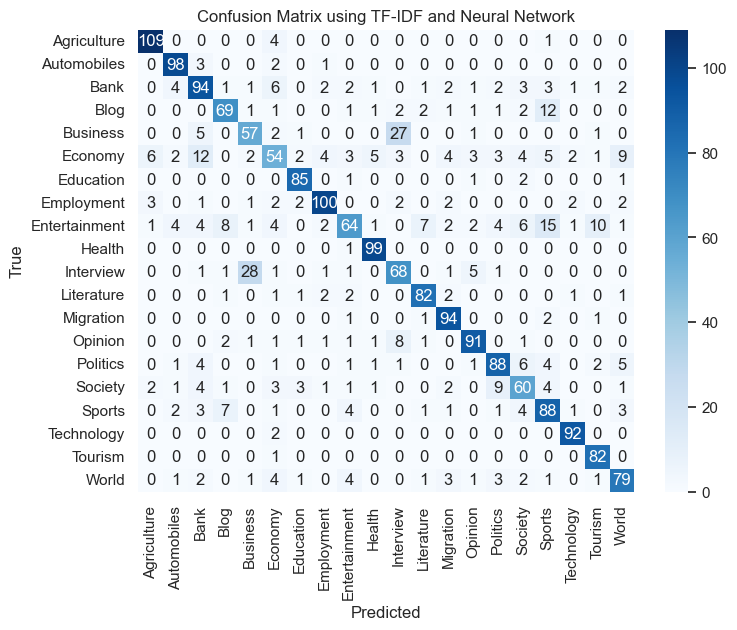

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.heatmap(cmnntfidf, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix using TF-IDF and Neural Network')
plt.show()


In [1]:
#USING SENTENCE TRANSFORMER AND NEURAL NETWORK

In [27]:
from sentence_transformers import SentenceTransformer
sentence_model = SentenceTransformer('syubraj/sentence_similarity_nepali')

In [28]:
#encoding the models
train_embeddings = sentence_model.encode(X_train.to_list())
test_embeddings=sentence_model.encode(X_test.to_list())

In [29]:
# Define hyperparameters
input_dim = len(train_embeddings[0])
hidden_dim = 256
output_dim = 20  # Number of classes

In [35]:
import torch
import torch.nn as nn
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(nnmodel.parameters(), lr=0.001)

In [39]:
# Training loop
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score
epochs = 1000
for epoch in range(epochs):
    nnmodel.train()
    optimizer.zero_grad()
    outputs = nnmodel(torch.tensor(train_embeddings))
    loss = criterion(outputs, torch.tensor(Y_train.to_list()))
    loss.backward()
    optimizer.step()
    
    if epoch%50==0:
        with torch.no_grad():
            train_ac = accuracy_score(torch.argmax(outputs, dim=1).numpy(),torch.tensor(Y_train.to_list()))
            outputss = nnmodel(torch.tensor(test_embeddings))
            predicted_labels = torch.argmax(outputss, dim=1).numpy() 
            test_ac = accuracy_score(Y_test.to_list(), predicted_labels)
            print(loss, f"Train Accuracy: {train_ac:.2f}, Test Accuracy: {test_ac:.2f}")
        

tensor(2.1912, grad_fn=<NllLossBackward0>) Train Accuracy: 0.89, Test Accuracy: 0.74
tensor(2.1897, grad_fn=<NllLossBackward0>) Train Accuracy: 0.89, Test Accuracy: 0.74
tensor(2.1900, grad_fn=<NllLossBackward0>) Train Accuracy: 0.89, Test Accuracy: 0.74
tensor(2.1889, grad_fn=<NllLossBackward0>) Train Accuracy: 0.89, Test Accuracy: 0.74
tensor(2.1890, grad_fn=<NllLossBackward0>) Train Accuracy: 0.89, Test Accuracy: 0.75
tensor(2.1879, grad_fn=<NllLossBackward0>) Train Accuracy: 0.89, Test Accuracy: 0.75
tensor(2.1897, grad_fn=<NllLossBackward0>) Train Accuracy: 0.89, Test Accuracy: 0.74
tensor(2.1893, grad_fn=<NllLossBackward0>) Train Accuracy: 0.89, Test Accuracy: 0.75
tensor(2.1862, grad_fn=<NllLossBackward0>) Train Accuracy: 0.89, Test Accuracy: 0.75
tensor(2.1876, grad_fn=<NllLossBackward0>) Train Accuracy: 0.89, Test Accuracy: 0.74
tensor(2.1875, grad_fn=<NllLossBackward0>) Train Accuracy: 0.89, Test Accuracy: 0.74
tensor(2.1842, grad_fn=<NllLossBackward0>) Train Accuracy: 0.90, 

In [46]:

# Evaluation
nnmodel.eval()
with torch.no_grad():
    outputs = nnmodel(torch.tensor(test_embeddings))
    predicted_labels = torch.argmax(outputs, dim=1).numpy()

In [47]:
from sklearn.metrics import accuracy_score
nnaccuracy = accuracy_score(Y_test.to_list(), predicted_labels)
print(f"Accuracy: {nnaccuracy:.2f}")

Accuracy: 0.81


In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
PRECISION_SCORE = precision_score(Y_test, predicted_labels, average='weighted')
RECALL_SCORE = recall_score(Y_test, predicted_labels, average='weighted')
F1_SCORE = f1_score(Y_test, predicted_labels, average='weighted')
print("PRECISION_SCORE :" ,PRECISION_SCORE)
print("RECALL_SCORE :" ,RECALL_SCORE)
print("F1_SCORE :" ,F1_SCORE)

PRECISION_SCORE : 0.8063065608445851
RECALL_SCORE : 0.8108747044917257
F1_SCORE : 0.8058861455813182


In [49]:
cmnn=confusion_matrix(Y_test, predicted_labels)


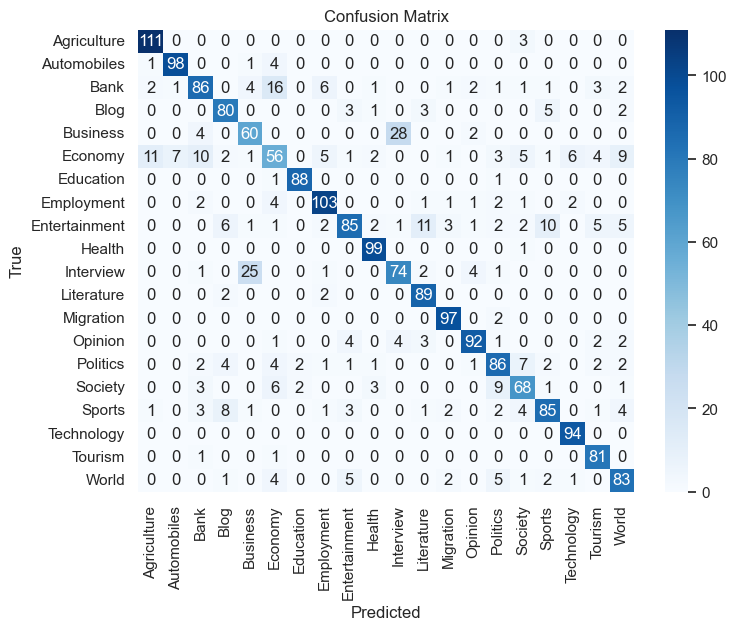

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.heatmap(cmnn, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix using Sentence Transformer and Neural Network')
plt.show()


In [54]:
 perform_list_params.append(dict([

    ('Model', 'Neural Network'),

    ('Test Accuracy', round(nnaccuracy*100, 2)),

    ('Precision', round(PRECISION_SCORE, 2)),

    ('Recall', round(RECALL_SCORE, 2)),

    ('F1', round(F1_SCORE, 2))

]))

In [71]:
model_performance_params = pd.DataFrame(data=perform_list_params)
model_performance_params = model_performance_params[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance_params

Model  Test Accuracy  Precision  Recall    F1
0  Support Vector Classifer          75.74       0.76    0.76  0.76
1  Decision Tree Classifier          70.97       0.71    0.71  0.71
2       K Nearest Neighbour          55.18       0.55    0.55  0.55
3      Gaussian Naive Bayes          47.33       0.47    0.47  0.47
4       Logistic Regression          81.47       0.81    0.81  0.81
5             Random Forest          83.22       0.83    0.83  0.83
6            Neural Network          81.09       0.81    0.81  0.81

C:\Users\koshi\AppData\Local\Temp\ipykernel_9308\2185284017.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Test Accuracy', data=model_performance_params, palette="viridis",legend=False)


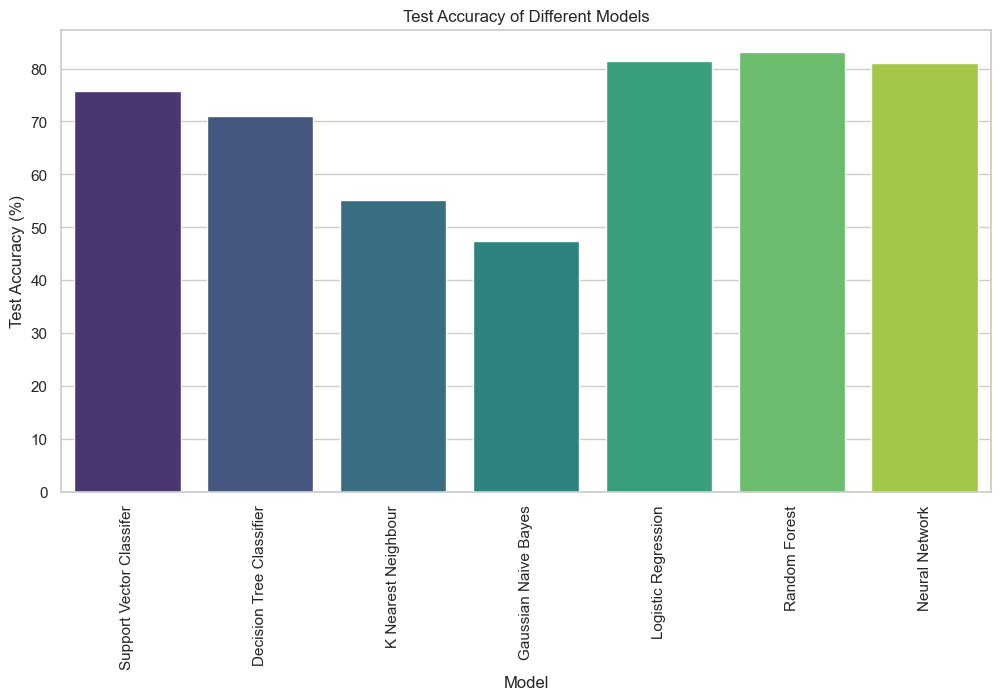

In [72]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Model', y='Test Accuracy', data=model_performance_params, palette="viridis",legend=False)
ax.set_title('Test Accuracy of Different Models')
ax.set_xlabel('Model')
ax.set_ylabel('Test Accuracy (%)')

plt.xticks(rotation=90, ha='center')
# Display the bar graph
plt.show()